# **Report Structure**
1. Introduction
2. Import Libraries & Dataset
3. Data Profilling
4. Data Cleaning
5. EDA
6. Model Preparation
7. Modelling
8. Conclusion
9. References

# **1. Introduction**

### **About CNC Machines**

CNC stands for Computer Numerical Control, which simply means that this is a computerised method of manufacturing, whereby the operator uses the machine with pre-programmed software and codes (Univeristy, 2024). This means that the operator simply programmes a job into the machine and it will do the rest, producing high quality products with very little errors.

Figure 1 (below) gives a overview of the key components of a CNC machine that will aid the reader to understand the data better as to which column references which component on the machine.

*The following three subsections have been copied from from the source of the dataset, Kaggle*

### **Context:**

A series of machining experiments were run on 2" x 2" x 1.5" wax blocks in a CNC milling machine in the System-level Manufacturing and Automation Research Testbed (SMART) at the University of Michigan. Machining data was collected from a CNC machine for variations of tool condition, feed rate, and clamping pressure. Each experiment produced a finished wax part with an "S" shape - S for smart manufacturing - carved into the top face (Kaggle, 2017).

### **Content:**

General data from each of the 18 different experiments are given in train.csv and includes the experiment number, material (wax), feed rate, and clamp pressure. Outputs per experiment include tool condition (unworn and worn tools) and whether or not the tool passed visual inspection (Kaggle, 2017).

Time series data was collected from the 18 experiments with a sampling rate of 100 ms and are separately reported in files experiment_01.csv to experiment_18.csv. Each file has measurements from the 4 motors in the CNC (X, Y, Z axes and spindle) (Kaggle, 2017).


### **The data:**


The features available in the machining datasets are (Kaggle, 2017):

#### **X-axis**:
1. X1_ActualPosition: actual x position of part (mm)
2. X1_ActualVelocity: actual x velocity of part (mm/s)
3. X1_ActualAcceleration: actual x acceleration of part (mm/s/s)
4. X1_CommandPosition: reference x position of part (mm)
5. X1_CommandVelocity: reference x velocity of part (mm/s)
6. X1_CommandAcceleration: reference x acceleration of part (mm/s/s)
7. X1_CurrentFeedback: current (A)
8. X1_DCBusVoltage: voltage (V)
9. X1_OutputCurrent: current (A)
10. X1_OutputVoltage: voltage (V)
11. X1_OutputPower: power (kW)

#### **Y-axis**:
1. Y1_ActualPosition: actual y position of part (mm)
2. Y1_ActualVelocity: actual y velocity of part (mm/s)
3.Y1_ActualAcceleration: actual y acceleration of part (mm/s/s)
4. Y1_CommandPosition: reference y position of part (mm)
5. Y1_CommandVelocity: reference y velocity of part (mm/s)
6. Y1_CommandAcceleration: reference y acceleration of part (mm/s/s)
7. Y1_CurrentFeedback: current (A)
8. Y1_DCBusVoltage: voltage (V)
9. Y1_OutputCurrent: current (A)
10. Y1_OutputVoltage: voltage (V)
11. Y1_OutputPower: power (kW)

#### **Z-axis**:
1. Z1_ActualPosition: actual z position of part (mm)
2. Z1_ActualVelocity: actual z velocity of part (mm/s)
3. Z1_ActualAcceleration: actual z acceleration of part (mm/s/s)
4. Z1_CommandPosition: reference z position of part (mm)
5. Z1_CommandVelocity: reference z velocity of part (mm/s)
6. Z1_CommandAcceleration: reference z acceleration of part (mm/s/s)
7. Z1_CurrentFeedback: current (A)
8. Z1_DCBusVoltage: voltage (V)
9. Z1_OutputCurrent: current (A)
10. Z1_OutputVoltage: voltage (V)

#### **Spindle**:
1. S1_ActualPosition: actual position of spindle (mm)
2. S1_ActualVelocity: actual velocity of spindle (mm/s)
3. S1_ActualAcceleration: actual acceleration of spindle (mm/s/s)
4. S1_CommandPosition: reference position of spindle (mm)
5. S1_CommandVelocity: reference velocity of spindle (mm/s)
6. S1_CommandAcceleration: reference acceleration of spindle (mm/s/s)
7. S1_CurrentFeedback: current (A)
8. S1_DCBusVoltage: voltage (V)
9. S1_OutputCurrent: current (A)
10. S1_OutputVoltage: voltage (V)
11. S1_OutputPower: current (A)
12. S1_SystemInertia: torque inertia (kg*m^2)

#### **M-code (Operator settings/code input)**:
1. M1_CURRENT_PROGRAM_NUMBER: number the program is listed under on the CNC
2. M1_sequence_number: line of G-code being executed
3. M1_CURRENT_FEEDRATE: instantaneous feed rate of spindle






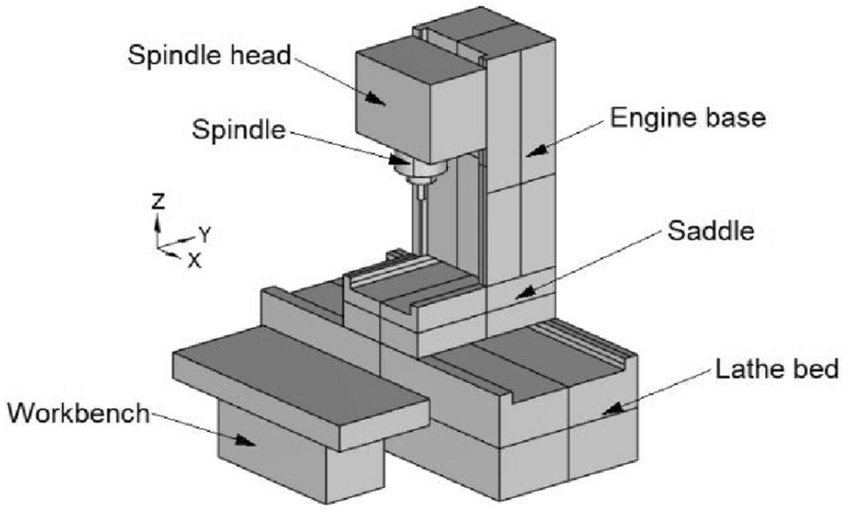

**Figure 1:** An diagram depicting a CNC machine and its axis. Source: (Zhang, et al., 2023)

#  **2. Import Libraries & Dataset**

---





## Obectives
1. Import the dataset using google.colab files function
2. Merge the datasets into one dataframe, keeping data integrity.



In [2]:
# Import required libraries

#Obtain files
from google.colab import files

#visualise the model
from sklearn.tree import plot_tree

#Visuals and visual controls
import ipywidgets as widgets
from ipywidgets import interact


# Data Analysis and cleaning
import pandas as pd
import numpy as np

#data vis & EDA
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
import bokeh.io # Interactive visualisation
from bokeh.layouts import row,column, gridplot #to format how to visuals are plotted
from bokeh.models import Select, Span, HoverTool, ColumnDataSource, Label #Add interactive tools
import plotly.express as px # create quick and easy interactive visuals.
import ipywidgets as widgets
import scipy.stats as st # Used for statistical analysis such as hypothesis and chi-square testing

# Enable viewing Bokeh plots in the notebook
bokeh.io.output_notebook()

#Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC

#Feature Engineering and selection
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE

# Model Pre-processing
from sklearn.preprocessing import OneHotEncoder, QuantileTransformer # To normalise the data
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV # Allow for splitting the data into training and test sets

#Cross validation
from sklearn.model_selection import cross_val_score, KFold

#fine-tuning the models
from sklearn.model_selection import RandomizedSearchCV

# Model performance metrics
from sklearn.metrics import confusion_matrix, f1_score, classification_report

In [3]:
# There are a total of 18 documents that need to be uploaded in one called 'Experiment_no.csv'
# files.upload() allows to upload multiple datasets into one variable, where they are saved as a dictionary (Kumar, 2019)
excel_uploaded = files.upload()

# shows that the variable is a dictionary.
print(f"The file type is  {type(excel_uploaded)}")

Saving experiment_01.csv to experiment_01.csv
Saving experiment_02.csv to experiment_02.csv
Saving experiment_03.csv to experiment_03.csv
Saving experiment_04.csv to experiment_04.csv
Saving experiment_05.csv to experiment_05.csv
Saving experiment_06.csv to experiment_06.csv
Saving experiment_07.csv to experiment_07.csv
Saving experiment_08.csv to experiment_08.csv
Saving experiment_09.csv to experiment_09.csv
Saving experiment_10.csv to experiment_10.csv
Saving experiment_11.csv to experiment_11.csv
Saving experiment_12.csv to experiment_12.csv
Saving experiment_13.csv to experiment_13.csv
Saving experiment_14.csv to experiment_14.csv
Saving experiment_15.csv to experiment_15.csv
Saving experiment_16.csv to experiment_16.csv
Saving experiment_17.csv to experiment_17.csv
Saving experiment_18.csv to experiment_18.csv
The file type is  <class 'dict'>


In [4]:
#Review a dataset
ex01_df = pd.read_csv('experiment_01.csv')
ex01_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          1055 non-null   float64
 1   X1_ActualVelocity          1055 non-null   float64
 2   X1_ActualAcceleration      1055 non-null   float64
 3   X1_CommandPosition         1055 non-null   float64
 4   X1_CommandVelocity         1055 non-null   float64
 5   X1_CommandAcceleration     1055 non-null   float64
 6   X1_CurrentFeedback         1055 non-null   float64
 7   X1_DCBusVoltage            1055 non-null   float64
 8   X1_OutputCurrent           1055 non-null   float64
 9   X1_OutputVoltage           1055 non-null   float64
 10  X1_OutputPower             1055 non-null   float64
 11  Y1_ActualPosition          1055 non-null   float64
 12  Y1_ActualVelocity          1055 non-null   float64
 13  Y1_ActualAcceleration      1055 non-null   float

In [5]:
# upload train.csv which is the label data.
label_uploaded = files.upload()

Saving train.csv to train.csv


In [6]:
# review data label dataframe.
label_df = pd.read_csv('train.csv')
label_df

No material  feedrate  clamp_pressure tool_condition machining_finalized  \
0    1      wax         6             4.0         unworn                 yes   
1    2      wax        20             4.0         unworn                 yes   
2    3      wax         6             3.0         unworn                 yes   
3    4      wax         6             2.5         unworn                  no   
4    5      wax        20             3.0         unworn                  no   
5    6      wax         6             4.0           worn                 yes   
6    7      wax        20             4.0           worn                  no   
7    8      wax        20             4.0           worn                 yes   
8    9      wax        15             4.0           worn                 yes   
9   10      wax        12             4.0           worn                 yes   
10  11      wax         3             4.0         unworn                 yes   
11  12      wax         3             3.0         unworn                 yes   
12  13      wax         3             4.0           worn                 yes   
13  14      wax         3             3.0           worn                 yes   
14  15      wax         6             3.0           worn                 yes   
15  16      wax        20             3.0           worn                  no   
16  17      wax         3             2.5         unworn                 yes   
17  18      wax         3             2.5           worn                 yes   

   passed_visual_inspection  
0                       yes  
1                       yes  
2                       yes  
3                       NaN  
4                       NaN  
5                        no  
6                       NaN  
7                        no  
8                        no  
9                        no  
10                      yes  
11                      yes  
12                      yes  
13                      yes  
14                      yes  
15                      NaN  
16                      yes  
17                      yes

**Observations**


---

1. There are a total of 19 CSV files that need to be imported and joined together, while maintaining data integrity. However, in the dataset there are no keys to join the label data to the feature dataset which poses major problems. To solve this, each experiment dataset will be assigned a key integer value of it's experiment number, located on the name of the document, then joined to the label dataset based of a one-to-many relationship to the label data.

---
**Next Step**
1. Add a experiment number into the feature dataset whereby the experiment number is the number given by the document name.
2. Merge the feature datasets as one dataframe.
3. Join the label dataset based off the experiment number given in both the feature and label dataset.

In [7]:
# Merge all datasets into one while maintaining data integrity
# by ensuring all columns are the same.

for i in range(1,19):
  exp_num = '0' + str(i) if i < 10 else str(i) # this allows the changing of the string value to filter through each dataframe.
  counter = 0 # This will be the column counter to ensure we have the right amount of columns as we loop through them.
  if i == 1:
    cnc_df = pd.read_csv(f'experiment_{exp_num}.csv') # acts as master dataframe to join rest onto
    # create experiment number key
    cnc_df['Experiment_Num'] = i
    #get column count and names
    col_names = list(cnc_df.columns)
    col_count = len(col_names)
    row_count = cnc_df.shape[0]
  else:
    cnc01_df = pd.read_csv(f'experiment_{exp_num}.csv') #acts as the dataframe proceeding the previous one
    cnc01_df['Experiment_Num'] = i
    new_df_cols = list(cnc01_df.columns)
    # loop through new df and get columns and match to existing dataframe
    for j in col_names:
      for k in new_df_cols:
        if j == k:
          counter+=1 # counter should equate to 48 which is when we concat the dfs

    # any counters less than 56 means a column is missing
    if counter == col_count:
      cnc_df = pd.concat([cnc_df,cnc01_df]) # merge all dafaframes
    else:
      print(f'Dataframe {i} is missing a column')

# join the label data 'train.csv' on to the joined dataframe

cnc_df = cnc_df.merge(label_df,left_on='Experiment_Num',right_on='No')

cnc_df.head(5)

X1_ActualPosition  X1_ActualVelocity  X1_ActualAcceleration  \
0              198.0                0.0                   0.00   
1              198.0              -10.8                -350.00   
2              196.0              -17.8                  -6.25   
3              194.0              -18.0                   0.00   
4              193.0              -17.9                 -18.80   

   X1_CommandPosition  X1_CommandVelocity  X1_CommandAcceleration  \
0               198.0                 0.0                0.000000   
1               198.0               -13.6             -358.000000   
2               196.0               -17.9               -0.000095   
3               194.0               -17.9               -0.000095   
4               192.0               -17.9                0.000095   

   X1_CurrentFeedback  X1_DCBusVoltage  X1_OutputCurrent  X1_OutputVoltage  \
0                0.18           0.0207             329.0              2.77   
1              -10.90           0.1860             328.0             23.30   
2               -8.59           0.1400             328.0             30.60   
3               -6.11           0.1300             327.0             30.30   
4               -5.70           0.1140             328.0             30.50   

   ...  M1_CURRENT_FEEDRATE  Machining_Process  Experiment_Num  No  material  \
0  ...                 50.0           Starting               1   1       wax   
1  ...                 50.0               Prep               1   1       wax   
2  ...                 50.0               Prep               1   1       wax   
3  ...                 50.0               Prep               1   1       wax   
4  ...                 50.0               Prep               1   1       wax   

   feedrate  clamp_pressure  tool_condition  machining_finalized  \
0         6             4.0          unworn                  yes   
1         6             4.0          unworn                  yes   
2         6             4.0          unworn                  yes   
3         6             4.0          unworn                  yes   
4         6             4.0          unworn                  yes   

   passed_visual_inspection  
0                       yes  
1                       yes  
2                       yes  
3                       yes  
4                       yes  

[5 rows x 56 columns]

In [8]:
# Review Data set
cnc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25286 entries, 0 to 25285
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          25286 non-null  float64
 1   X1_ActualVelocity          25286 non-null  float64
 2   X1_ActualAcceleration      25286 non-null  float64
 3   X1_CommandPosition         25286 non-null  float64
 4   X1_CommandVelocity         25286 non-null  float64
 5   X1_CommandAcceleration     25286 non-null  float64
 6   X1_CurrentFeedback         25286 non-null  float64
 7   X1_DCBusVoltage            25286 non-null  float64
 8   X1_OutputCurrent           25286 non-null  float64
 9   X1_OutputVoltage           25286 non-null  float64
 10  X1_OutputPower             25286 non-null  float64
 11  Y1_ActualPosition          25286 non-null  float64
 12  Y1_ActualVelocity          25286 non-null  float64
 13  Y1_ActualAcceleration      25286 non-null  flo

In [9]:
# Having 'command' features are redundant as the focus is on the output of the machine,
# but they do provide an opprtunity to engineer a new feature for each axis.
# These new features will show the lost output from the machine as it is the difference between Actual and Command features.

# lost velocity
cnc_df['X1_LostVelocity'] = cnc_df['X1_CommandVelocity']-cnc_df['X1_ActualVelocity']
cnc_df['Y1_LostVelocity'] = cnc_df['Y1_CommandVelocity']-cnc_df['Y1_ActualVelocity']
cnc_df['Z1_LostVelocity'] = cnc_df['Z1_CommandVelocity']-cnc_df['Z1_ActualVelocity']
cnc_df['S1_LostVelocity'] = cnc_df['S1_CommandVelocity']-cnc_df['S1_ActualVelocity']

# lost acceloration
cnc_df['X1_LostAcceleration'] = cnc_df['X1_CommandAcceleration']-cnc_df['X1_ActualAcceleration']
cnc_df['Y1_LostAcceleration'] = cnc_df['Y1_CommandAcceleration']-cnc_df['Y1_ActualAcceleration']
cnc_df['Z1_LostAcceleration'] = cnc_df['Z1_CommandAcceleration']-cnc_df['Z1_ActualAcceleration']
cnc_df['S1_LostAcceleration'] = cnc_df['S1_CommandVelocity']-cnc_df['S1_ActualVelocity']


In [10]:
# drop redundant No col and Command Columns as the focus needs to be on out machines output.

# Loop thorugh the columns and filter out only the command columns with if function
drop_columns = [i for i in cnc_df.columns if i[3:10]=='Command' or i == 'No']

#Drop the columns
cnc_df = cnc_df.drop(columns=drop_columns)

#verify results
cnc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25286 entries, 0 to 25285
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          25286 non-null  float64
 1   X1_ActualVelocity          25286 non-null  float64
 2   X1_ActualAcceleration      25286 non-null  float64
 3   X1_CurrentFeedback         25286 non-null  float64
 4   X1_DCBusVoltage            25286 non-null  float64
 5   X1_OutputCurrent           25286 non-null  float64
 6   X1_OutputVoltage           25286 non-null  float64
 7   X1_OutputPower             25286 non-null  float64
 8   Y1_ActualPosition          25286 non-null  float64
 9   Y1_ActualVelocity          25286 non-null  float64
 10  Y1_ActualAcceleration      25286 non-null  float64
 11  Y1_CurrentFeedback         25286 non-null  float64
 12  Y1_DCBusVoltage            25286 non-null  float64
 13  Y1_OutputCurrent           25286 non-null  flo

**Observation**


---


1. With the data join as one Dataframe, there are a total of 51 columns, which will prove difficult to profile due to the quantity. However, most features starts with either X, Y, Z and M which will allow the breaking down of the visualisations into manageable chunks through filtering the Dataframe based off the starting string value.

**Next steps**

---

1. Profile the data.


# **3. Data Profilling**

---



**Obectives:**
1. Create two functions that filters the Dataframe based off their starting value, allowing for manageable, bitesized results to be returned based off the given value (X, Y, Z, S or M).
1. Understand the distributions of the data.
2. Identify any outliers and inconsistencies in the data ready for Data Cleaning phase.


In [11]:
# review distributions the columns their axis (x,y,z)

# create a function reuse for each column
def select_col(axis, df):
  # get column names
  df_cols = df.columns
  selected_cols = [] # store the columns names

  #loop through columns in df and grab the selected cols
  for col in df_cols:
     # col[0] is the first string character of the column name so X, Y, Z, S or M.
    if col[0] == axis:
      selected_cols.append(col)

  # create a new df with the selected columns
  new_df = df.filter(selected_cols)

  #visualise the results
  new_df.hist(figsize=(10,10))
  plt.tight_layout()


In [12]:
# create a function similar to the above, but for descriptive statistics

def describe_col(axis, df):
  # get column names
  df_cols = df.columns
  selected_cols = [] # store the columns names

  #loop through columns in df and grab the selected cols
  for col in df_cols:
    if col[0] == axis:
      selected_cols.append(col)

  # create a new df with the selected columns
  new_df = df.filter(selected_cols)

  #print the descriptive statistics
  return new_df.describe()


Figure 1


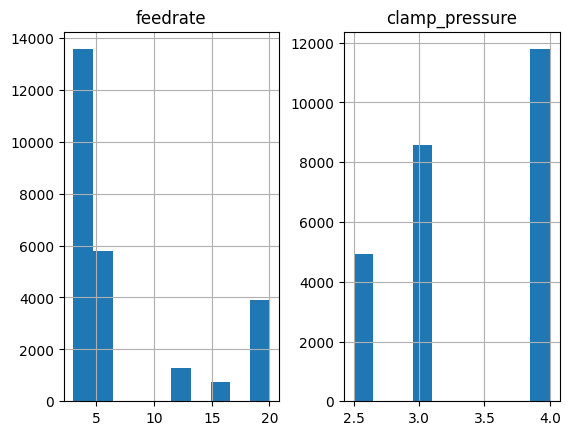

In [13]:
# Use pandas .hist() function to visualise the distributions
# the label_df will be used as we want to see the distributions by unique experiment number.
print("Figure 1")
cnc_df[['feedrate','clamp_pressure']].hist();

Figure 2


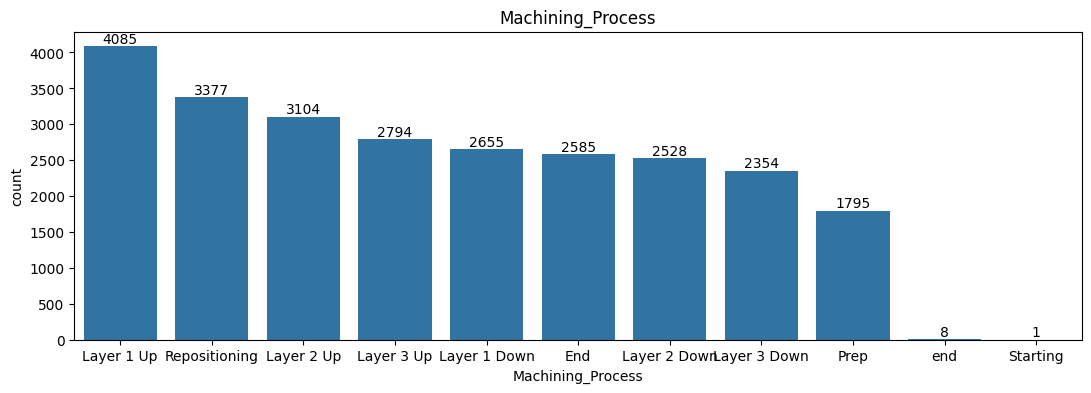

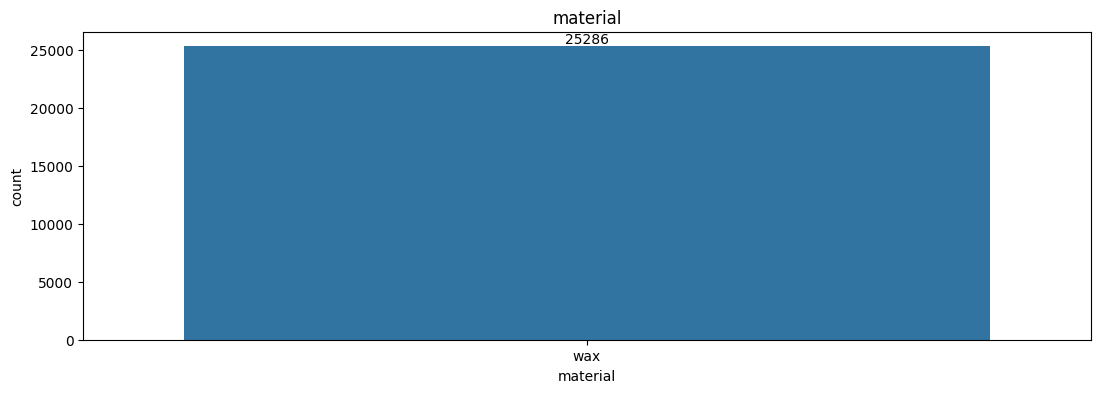

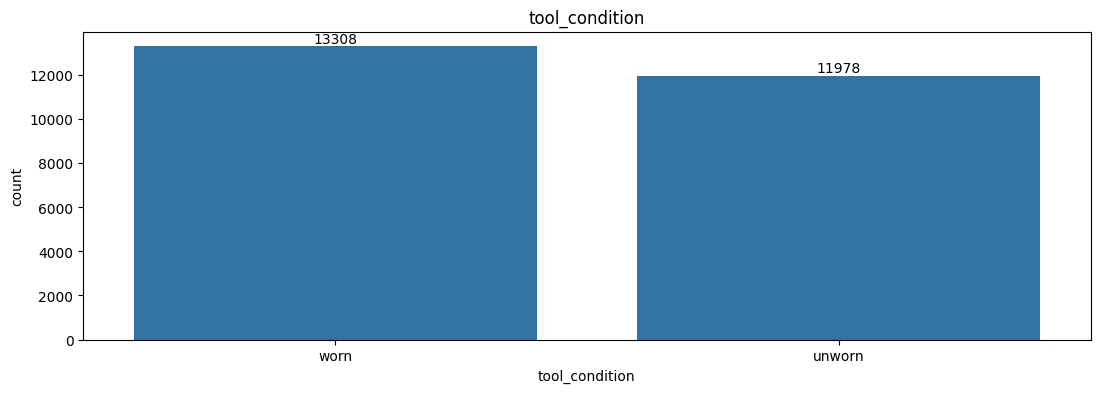

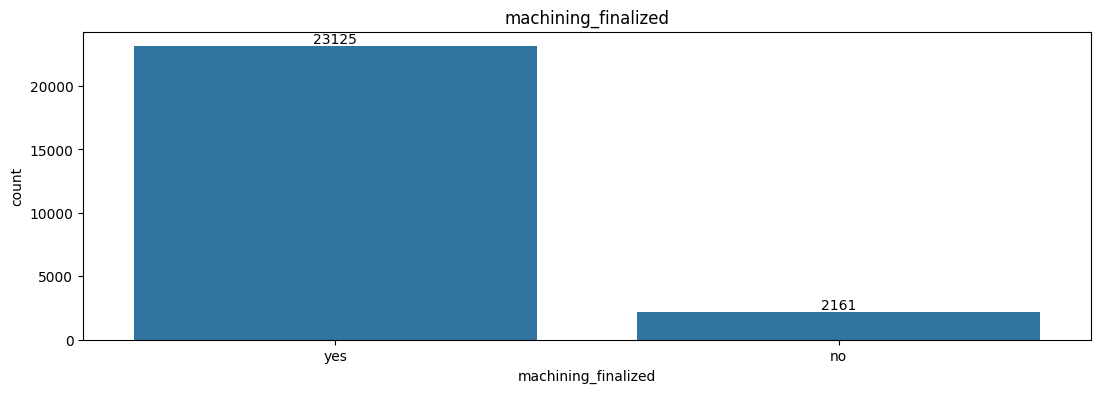

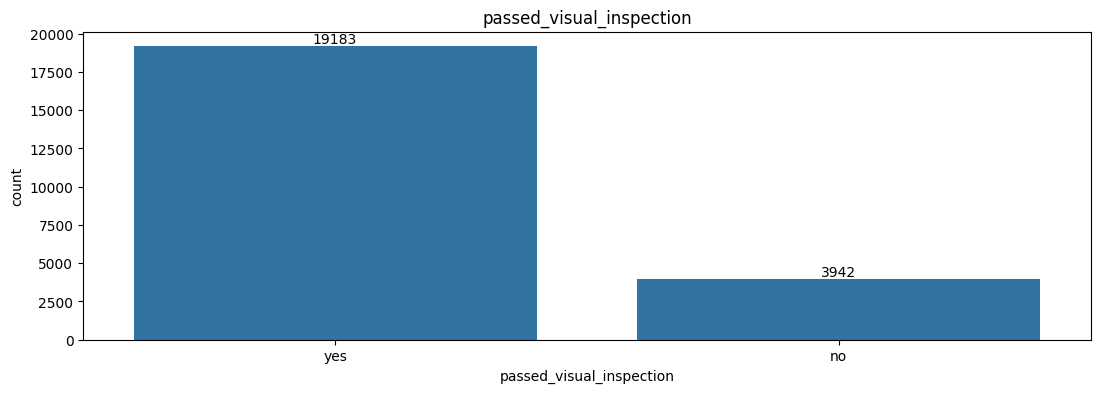

In [14]:
# Loop through object type columns in the dataframe
# This is done by combining a for loop and .select_dtypes() to control which
# columns to loop through as it simply retreives the columns that meet this criteria
# as each column contains information on it's data type - this can be seen using .info().
print("Figure 2")

cnc_df['tool_condition'].value_counts()

for col in cnc_df.select_dtypes("object").columns:
  # create new df containing value counts
  label_df = cnc_df[col].value_counts()
  plt.figure(figsize=(13,4)) #create new figure each iteration
  ax = sns.barplot(label_df, errorbar=None) #chart the data and remove error line
  # add data labels on to graph
  ax.bar_label(ax.containers[0], fontsize=10);
  # add title
  plt.title(f"{col}")
  #show chart
  plt.show()

 #

**Observation**

---


1. The 'label' document conatins the column 'Tool condition' which will be our label that we are trying to predict.

2. Figure 2 shows a nice split between 'Worn' and 'Unworn', which prevents our data from experiencing imabalancing problems - This is when the dataset's target value proportion, in this case it is 'Worn', is considerably less than it's opposing value - 'Unwarn' - (Kumar, et al., 2023). The problem that one would encounter is biased results towards the majority class, while the model will perform poorly in predicting the other (Rasheed, et al., 2022).

3. The distribution of feedrate (see Figure 1) is quite interesting in that the values vary from 4 - 19, where most of the values sit between 4 to 5 and 18 - 19, but inbetween these values there were very few observations.

4. Figure 1 shows the clamp pressure was mainly set at 4 or 5, this could be due to the material type.

**Next steps**

---


Review main dataset

### 3.1.1 CNC Spindle X-axis

Figure 3


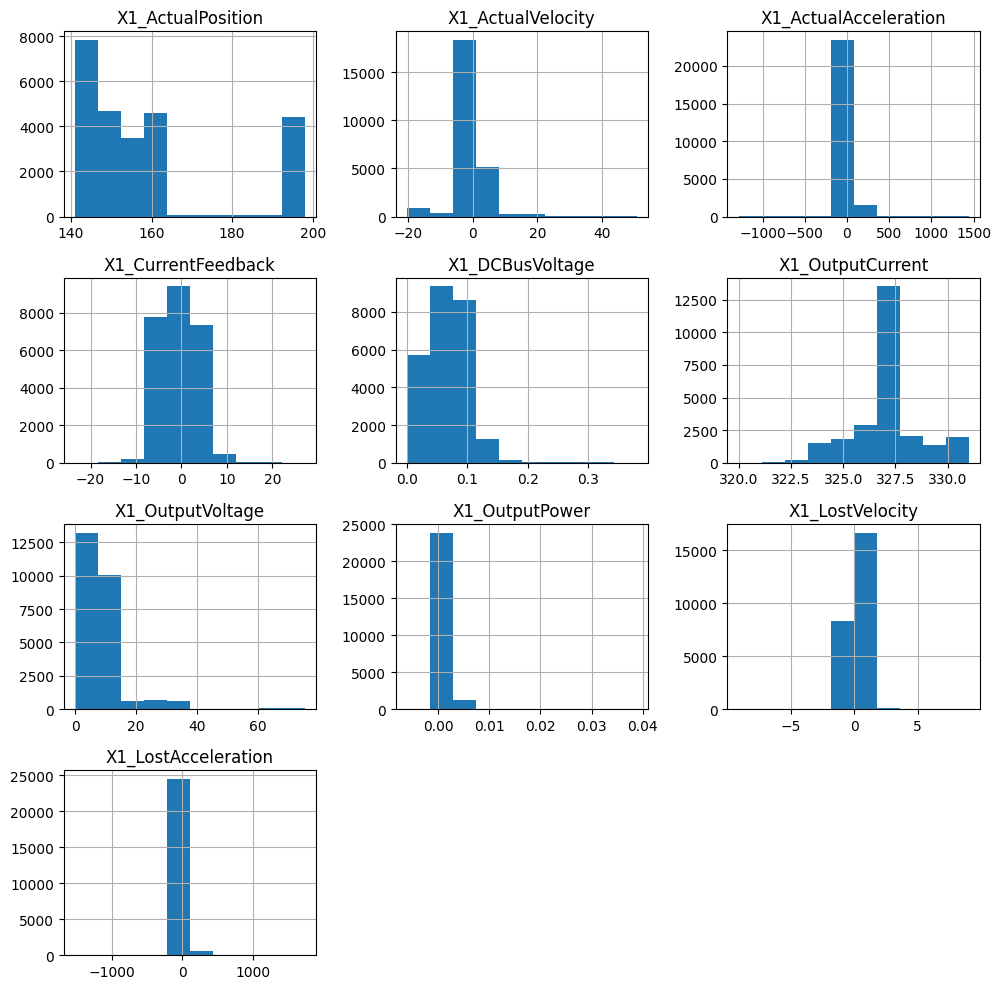

In [15]:
# visualise the results
print("Figure 3")
select_col("X",cnc_df)

In [16]:
describe_col("X",cnc_df)

X1_ActualPosition  X1_ActualVelocity  X1_ActualAcceleration  \
count       25286.000000       25286.000000           25286.000000   
mean          159.052045          -0.288657               0.094264   
std            19.330873           5.658260              93.877623   
min           141.000000         -20.400000           -1280.000000   
25%           145.000000          -2.050000             -31.300000   
50%           153.000000           0.000000               0.000000   
75%           162.000000           0.200000              25.000000   
max           198.000000          50.700000            1440.000000   

       X1_CurrentFeedback  X1_DCBusVoltage  X1_OutputCurrent  \
count        25286.000000     2.528600e+04      25286.000000   
mean            -0.469714     6.603073e-02        326.945859   
std              4.220750     3.700384e-02          1.459937   
min            -23.400000     2.780000e-19        320.000000   
25%             -3.930000     4.150000e-02        326.000000   
50%             -0.666000     6.680000e-02        327.000000   
75%              3.140000     9.130000e-02        327.000000   
max             27.100000     3.800000e-01        331.000000   

       X1_OutputVoltage  X1_OutputPower  X1_LostVelocity  X1_LostAcceleration  
count      25286.000000    25286.000000     25286.000000         25286.000000  
mean           7.986942        0.000610         0.005581             0.158951  
std            7.710379        0.001565         0.580926            93.641828  
min            0.000000       -0.006060        -9.075000         -1519.000000  
25%            2.590000        0.000000        -0.080000           -26.187500  
50%            7.140000        0.000174         0.000000             0.000000  
75%           10.200000        0.000585         0.080000            31.300000  
max           75.400000        0.038800         9.000000          1731.000000

**Observation**

---


1. There are a few columns that appear to contain outliers that need to be explored - X1_ActualVelocity, X1_CommandVelocity, X1_CommandAcceloration and X1_ActualAcceloration (See Figure 3).

2. X1_CommandPosition and X1_ActualPosition has some interesting observed data in that there is a huge spike at the ~190 mark (See Figure 3).


**Next steps**

---


Do the same for remaining axis

### 3.1.2 CNC Spindle Y-axis

Figure 4


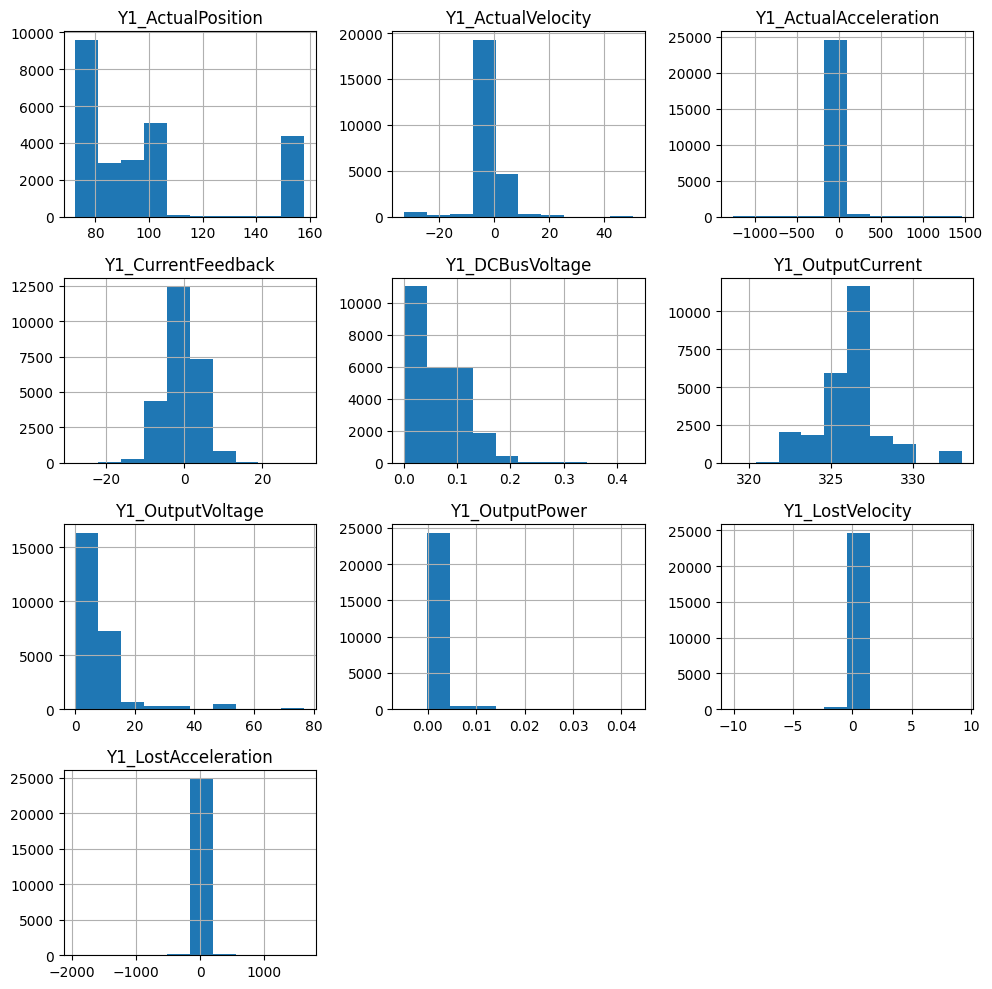

In [17]:
print("Figure 4")
select_col("Y",cnc_df)

In [18]:
describe_col("Y",cnc_df)

Y1_ActualPosition  Y1_ActualVelocity  Y1_ActualAcceleration  \
count       25286.000000       25286.000000           25286.000000   
mean           99.230064          -0.422932               0.928832   
std            29.244880           6.006439              85.074580   
min            72.400000         -32.800000           -1260.000000   
25%            77.500000          -0.075000             -18.800000   
50%            90.000000           0.000000               0.000000   
75%           105.000000           0.100000              18.800000   
max           158.000000          50.400000            1460.000000   

       Y1_CurrentFeedback  Y1_DCBusVoltage  Y1_OutputCurrent  \
count        25286.000000     2.528600e+04      25286.000000   
mean            -0.061681     6.398315e-02        325.862058   
std              4.469548     4.777806e-02          1.804164   
min            -27.800000     2.680000e-19        319.000000   
25%             -3.090000     2.190000e-02        325.000000   
50%              0.146000     5.780000e-02        326.000000   
75%              2.900000     9.557500e-02        326.000000   
max             30.700000     4.300000e-01        333.000000   

       Y1_OutputVoltage  Y1_OutputPower  Y1_LostVelocity  Y1_LostAcceleration  
count      25286.000000    25286.000000     25286.000000         25286.000000  
mean           7.068352        0.000637         0.010857             0.555326  
std            8.601484        0.002098         0.614109            92.895385  
min            0.000000       -0.004920       -10.080000         -1956.000000  
25%            1.810000        0.000000        -0.050000           -16.970000  
50%            4.930000        0.000004         0.000000             0.000000  
75%            9.610000        0.000506         0.050000            17.437500  
max           76.800000        0.042400         9.250000          1631.000000

**Observation**

---


1. The distributions of the columns (Figure 4) for the Y-axis is very similar to X, which makes sense as these axis are all related to one another when the machine is in use. Therefore, there is an expectation that the Z-axis will also be simialar to the other two, even displaying the potential outliers highlighted earlier.

2. There are potential outliers in the following columns - Y1_OutputVoltage, Y1_OutputCurrent,  Y1_ActualVelocity and Y1_ActualPosition.

**Next steps**

---


Visualise the distributions for Z-axis columns and compare to other axis.

### 3.1.3 CNC Spindle Z-axis

Figure 5


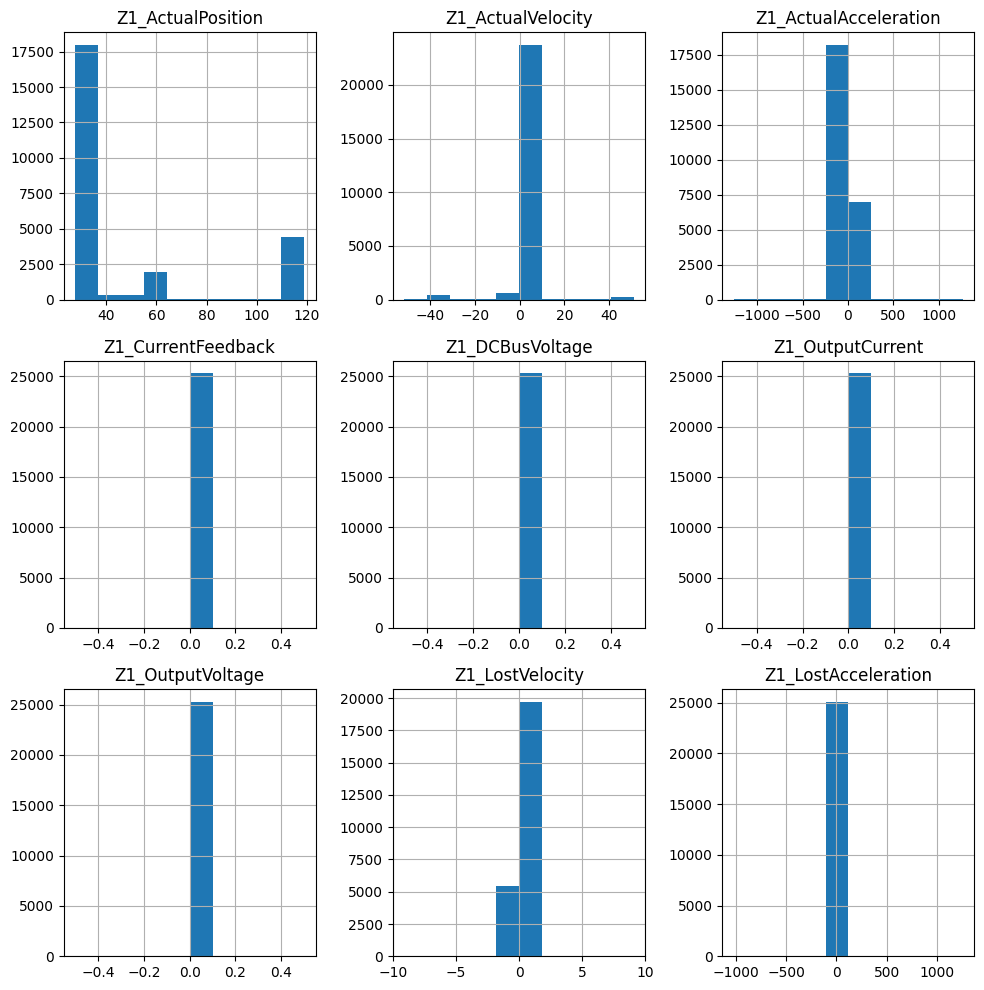

In [19]:
print("Figure 5")
select_col("Z",cnc_df)

In [20]:
describe_col("Z",cnc_df)

Z1_ActualPosition  Z1_ActualVelocity  Z1_ActualAcceleration  \
count       25286.000000       25286.000000           25286.000000   
mean           47.780638          -0.328759              -0.103658   
std            34.255650           7.635223              66.442671   
min            27.500000         -51.500000           -1260.000000   
25%            28.500000           0.000000              -6.250000   
50%            29.500000           0.000000               0.000000   
75%            55.500000           0.000000               6.250000   
max           119.000000          50.900000            1270.000000   

       Z1_CurrentFeedback  Z1_DCBusVoltage  Z1_OutputCurrent  \
count             25286.0          25286.0           25286.0   
mean                  0.0              0.0               0.0   
std                   0.0              0.0               0.0   
min                   0.0              0.0               0.0   
25%                   0.0              0.0               0.0   
50%                   0.0              0.0               0.0   
75%                   0.0              0.0               0.0   
max                   0.0              0.0               0.0   

       Z1_OutputVoltage  Z1_LostVelocity  Z1_LostAcceleration  
count           25286.0     25286.000000         25286.000000  
mean                0.0         0.000295             0.237776  
std                 0.0         0.503754            37.716170  
min                 0.0        -9.100000         -1019.000000  
25%                 0.0         0.000000            -6.250000  
50%                 0.0         0.000000             0.000000  
75%                 0.0         0.000000             6.250000  
max                 0.0         9.100000          1260.000000

**Observation**

---


Figure 5 shows the distributions of the columns for the Z-axis is, as predicted, very similar to the other two but there are some slight differences:

1. Output Voltage, DC Bus Volatge, Current Feedback and Output Current columns observed data resides between 0 and 0.1, where the other two axis had right-skewed and normal distributions. This will be explored in the EDA phase to understand why this is the case.

2. The z-axis does not contain output power colmns.

3. Potential outliers are seen in the following columns - Z1_ActualPosition, Z1_ActualVelocity and Z1_Actual Acceloration.

**Next Step**

---


Review S-Axis column in dataset

### 3.1.4 CNC Spindle

Figure 6


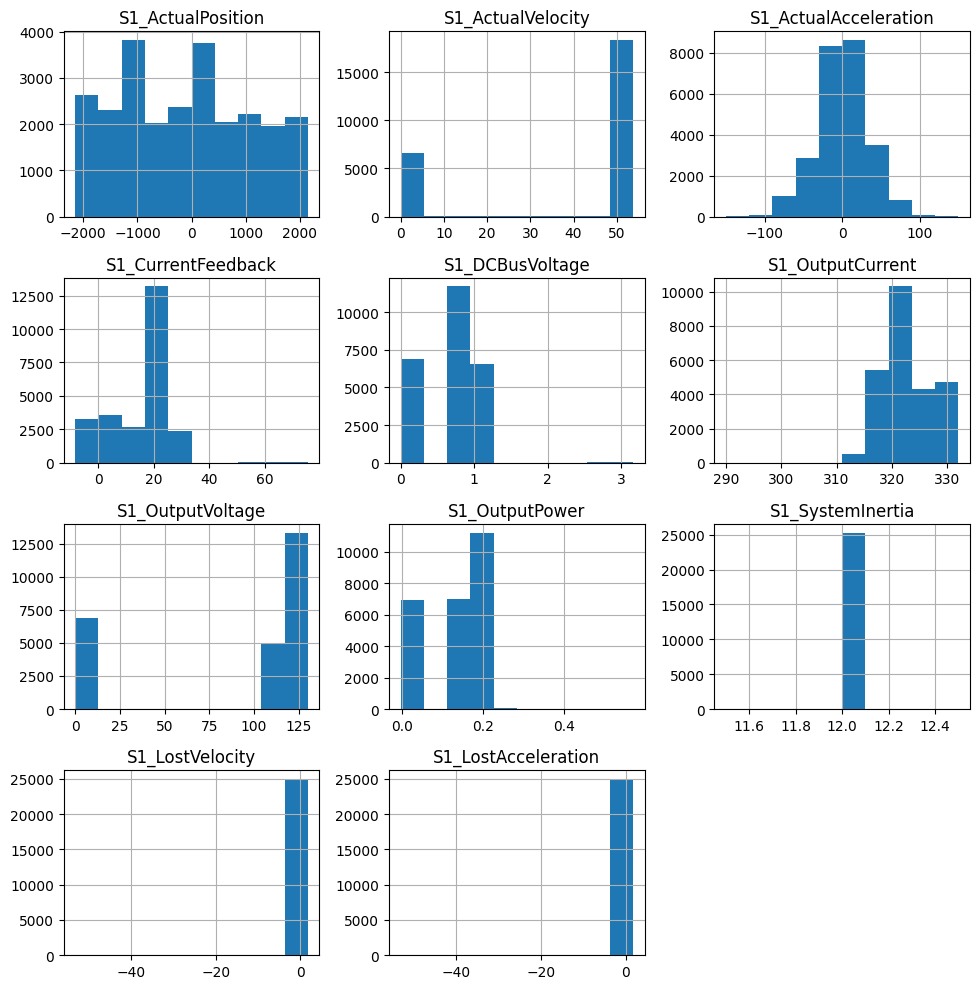

In [21]:
print("Figure 6")
select_col("S",cnc_df)

In [22]:
describe_col("S",cnc_df)

S1_ActualPosition  S1_ActualVelocity  S1_ActualAcceleration  \
count       25286.000000       25286.000000           25286.000000   
mean         -115.373082          38.986424               0.248602   
std          1212.730873          23.491267              32.204079   
min         -2150.000000          -0.069000            -150.000000   
25%         -1160.000000           0.002000             -15.900000   
50%          -112.500000          53.300000               0.000000   
75%           860.750000          53.400000              17.500000   
max          2150.000000          53.800000             150.000000   

       S1_CurrentFeedback  S1_DCBusVoltage  S1_OutputCurrent  \
count        25286.000000     2.528600e+04      25286.000000   
mean            15.243948     6.692938e-01        322.784505   
std             10.222419     4.332413e-01          4.293571   
min             -8.280000     0.000000e+00        290.000000   
25%              0.821000     2.790000e-19        320.000000   
50%             18.800000     8.580000e-01        322.000000   
75%             22.300000     9.520000e-01        327.000000   
max             75.400000     3.160000e+00        332.000000   

       S1_OutputVoltage  S1_OutputPower  S1_SystemInertia  S1_LostVelocity  \
count      25286.000000    25286.000000           25286.0     25286.000000   
mean          85.479195        0.127405              12.0        -0.336412   
std           52.531863        0.080753               0.0         3.294128   
min            0.000000       -0.002960              12.0       -53.200000   
25%            0.000000        0.000005              12.0        -0.100000   
50%          117.000000        0.164000              12.0         0.000000   
75%          119.000000        0.183000              12.0         0.000000   
max          130.000000        0.569000              12.0         1.732000   

       S1_LostAcceleration  
count         25286.000000  
mean             -0.336412  
std               3.294128  
min             -53.200000  
25%              -0.100000  
50%               0.000000  
75%               0.000000  
max               1.732000

**Observation**

---
The S in the dataset represents the spindle on the CNC machine, which holds and rotates the tool it holds such as a drill. This means that the distribution of columns will be different to the X, Y and Z axis as these represent the movement of the tool.

Figure 6 shows:

1. The Spindle looks to require produce more output power than the other 3 axis.

2. The Spindle also produces a larger amount of output voltage and within this data there appears to be a spike in observations as there are two distinct groups between 0 and ~15 and ~110 and ~130 volts.

3. The Actual and Command Velocity distributions also have two distinct groups in it's distribution, which must be when the spindle rotates at the given angle from the operator.

4. Current Feedback column looks to have an outlier in it's distribution which should be explored further in the Data Cleaning phase of this project.

### 3.1.5 CNC Operator inputs

Figure 7


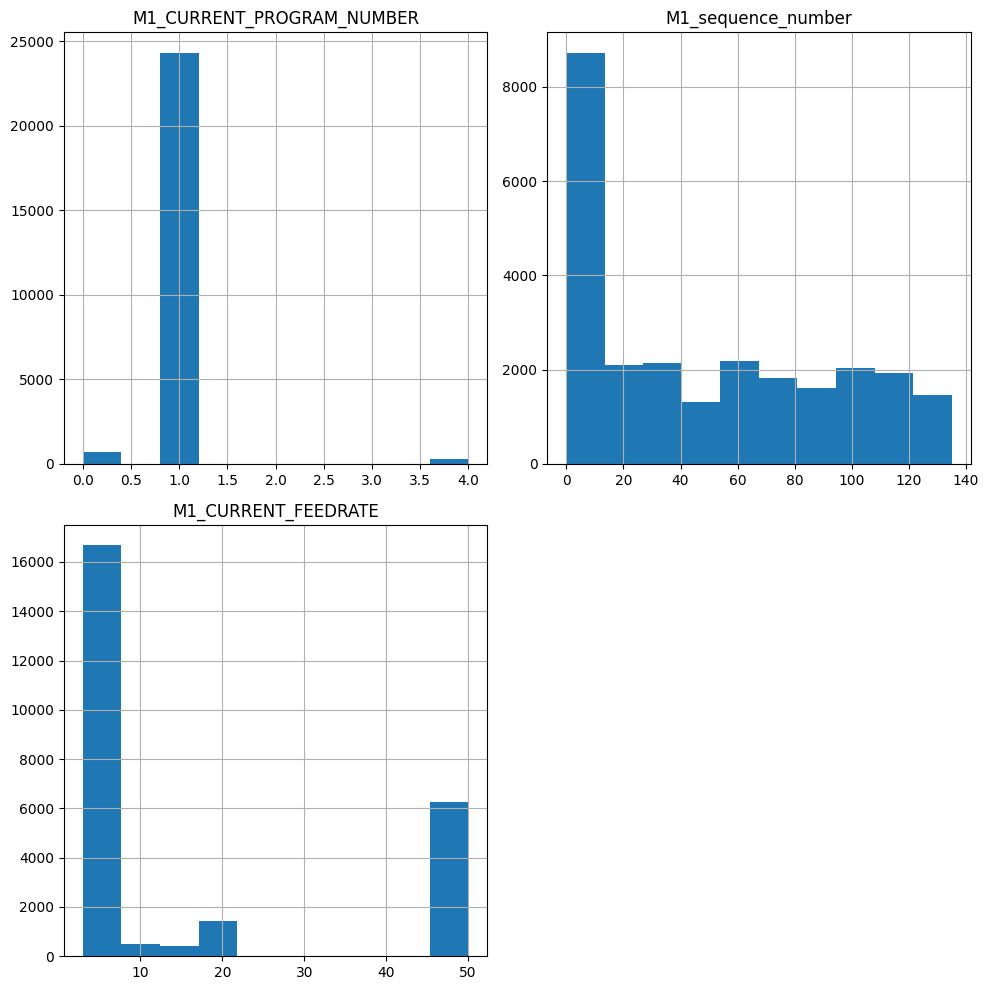

In [23]:
print("Figure 7")
select_col("M", cnc_df)

In [24]:
describe_col("M",cnc_df)

M1_CURRENT_PROGRAM_NUMBER  M1_sequence_number  M1_CURRENT_FEEDRATE
count               25286.000000        25286.000000         25286.000000
mean                    1.003441           47.345013            16.542039
std                     0.349055           43.826214            19.620219
min                     0.000000            0.000000             3.000000
25%                     1.000000            2.000000             3.000000
50%                     1.000000           39.000000             6.000000
75%                     1.000000           85.000000            20.000000
max                     4.000000          135.000000            50.000000

**Observation**

---



1.   Throughout the experiments, program number 1 was the most commonly used.
2.   The feedrate distribution has two large groups at both extremes, suggesting that the feedrate was dramatically changed quite often.


**Next Step**

---



Review the distribution of the final column - Machining Process

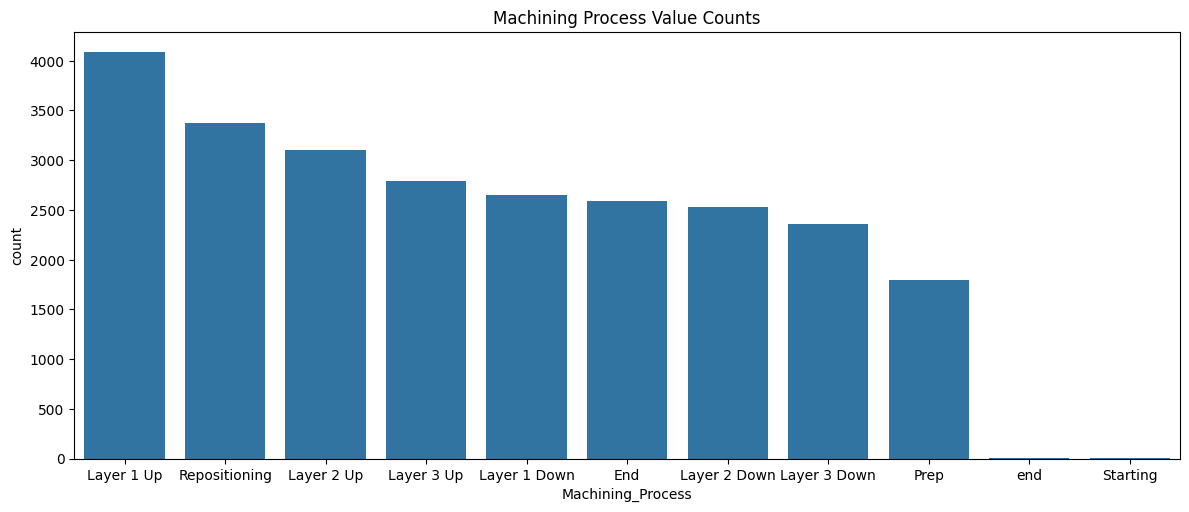

In [25]:
# Create new df by aggregating the string values using .value_counts()

machine_process = cnc_df['Machining_Process'].value_counts().reset_index()

fig = plt.figure(figsize=(12,5));

# Visualise the results
ax = sns.barplot(machine_process, x='Machining_Process', y='count', errorbar=None);

#adjust the visual's x and y label's positioning
plt.tight_layout();

#set title
plt.title("Machining Process Value Counts");

**Observation**

---

1. This column appears to represent the action that the tool undertakes when in the experiment.
2. There are small inconsistencies in the labelling which need to be rectified in the Data Cleaning phase.

The data has been successfully profiled in terms of their distribution's, which has identified some potential outliers and inconsistencies that need to be handled in the Data Cleaning phase.

**Next Step**

---

Clean the data to ensure that it is fit for modelling as any anomaly in the data can cause overfitting (Géron, 2023) - this is where the model does well on the training dataset, but performs poorly on the test dataset (IBM[a], 2024).


# **4. Data Cleaning**

---



**Objectives:**
1. Verify the Datasets Data Types and change where needed.
2. Check for NaN and action accordingly.
3. Identify and rectify any inconsistencies wihtin the dataset.
4. Check for duplicates and action appropriately.
5. Check and action any outliers in the data accordingly.

## 4.1 Dataframe Size Reduction

In [26]:
# Review Data Types to see if they have been assigned correctly and check for NaN values
cnc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25286 entries, 0 to 25285
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          25286 non-null  float64
 1   X1_ActualVelocity          25286 non-null  float64
 2   X1_ActualAcceleration      25286 non-null  float64
 3   X1_CurrentFeedback         25286 non-null  float64
 4   X1_DCBusVoltage            25286 non-null  float64
 5   X1_OutputCurrent           25286 non-null  float64
 6   X1_OutputVoltage           25286 non-null  float64
 7   X1_OutputPower             25286 non-null  float64
 8   Y1_ActualPosition          25286 non-null  float64
 9   Y1_ActualVelocity          25286 non-null  float64
 10  Y1_ActualAcceleration      25286 non-null  float64
 11  Y1_CurrentFeedback         25286 non-null  float64
 12  Y1_DCBusVoltage            25286 non-null  float64
 13  Y1_OutputCurrent           25286 non-null  flo

In [27]:
# As we are dealing with a large dataframe (9.8mb) I need to find a way to reduce it's size
cnc_df.describe().loc['max']

X1_ActualPosition             198.0000
X1_ActualVelocity              50.7000
X1_ActualAcceleration        1440.0000
X1_CurrentFeedback             27.1000
X1_DCBusVoltage                 0.3800
X1_OutputCurrent              331.0000
X1_OutputVoltage               75.4000
X1_OutputPower                  0.0388
Y1_ActualPosition             158.0000
Y1_ActualVelocity              50.4000
Y1_ActualAcceleration        1460.0000
Y1_CurrentFeedback             30.7000
Y1_DCBusVoltage                 0.4300
Y1_OutputCurrent              333.0000
Y1_OutputVoltage               76.8000
Y1_OutputPower                  0.0424
Z1_ActualPosition             119.0000
Z1_ActualVelocity              50.9000
Z1_ActualAcceleration        1270.0000
Z1_CurrentFeedback              0.0000
Z1_DCBusVoltage                 0.0000
Z1_OutputCurrent                0.0000
Z1_OutputVoltage                0.0000
S1_ActualPosition            2150.0000
S1_ActualVelocity              53.8000
S1_ActualAcceleration         150.0000
S1_CurrentFeedback             75.4000
S1_DCBusVoltage                 3.1600
S1_OutputCurrent              332.0000
S1_OutputVoltage              130.0000
S1_OutputPower                  0.5690
S1_SystemInertia               12.0000
M1_CURRENT_PROGRAM_NUMBER       4.0000
M1_sequence_number            135.0000
M1_CURRENT_FEEDRATE            50.0000
Experiment_Num                 18.0000
feedrate                       20.0000
clamp_pressure                  4.0000
X1_LostVelocity                 9.0000
Y1_LostVelocity                 9.2500
Z1_LostVelocity                 9.1000
S1_LostVelocity                 1.7320
X1_LostAcceleration          1731.0000
Y1_LostAcceleration          1631.0000
Z1_LostAcceleration          1260.0000
S1_LostAcceleration             1.7320
Name: max, dtype: float64

In [28]:
# Loop through the columns as change the data type to Float32
# ignore object column
cols = list(cnc_df.columns)
obj_cols = ['Machining_Process','material','tool_condition','machining_finalized','passed_visual_inspection']

# loop through columns
for i in cols:
  # add if statement to filter to object columns
  if i not in obj_cols:
      max_val = cnc_df[i].max()
      if max_val < 1: # assign a data type based off it's value.
        cnc_df = cnc_df.astype({f'{i}':'Float64'}) # change data type
      else:
        cnc_df = cnc_df.astype({f'{i}':'Float32'})

cnc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25286 entries, 0 to 25285
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          25286 non-null  Float32
 1   X1_ActualVelocity          25286 non-null  Float32
 2   X1_ActualAcceleration      25286 non-null  Float32
 3   X1_CurrentFeedback         25286 non-null  Float32
 4   X1_DCBusVoltage            25286 non-null  Float64
 5   X1_OutputCurrent           25286 non-null  Float32
 6   X1_OutputVoltage           25286 non-null  Float32
 7   X1_OutputPower             25286 non-null  Float64
 8   Y1_ActualPosition          25286 non-null  Float32
 9   Y1_ActualVelocity          25286 non-null  Float32
 10  Y1_ActualAcceleration      25286 non-null  Float32
 11  Y1_CurrentFeedback         25286 non-null  Float32
 12  Y1_DCBusVoltage            25286 non-null  Float64
 13  Y1_OutputCurrent           25286 non-null  Flo

**Observation**

---

1. the Dataframe memory size has been reduced from 9.8mb to 7.4mb, which should help in improving the performance of analysing the data at later points on this project (Gugten, 2019).

## 4.2 NaN Values

In [29]:
# Use isnull().sum() to verify if there are null values in the dataset
# and only return values that contain NaN values as there are a lot of columns
# to review.

# create NaN df
NaN_df = cnc_df.isnull().sum().reset_index()

# create filter for readability
nan = NaN_df.iloc[:,1]>0

#filter out the 0 values
NaN_df.loc[nan]

index     0
42  passed_visual_inspection  2161

In [30]:
# filter out the NaN values
# create NaN filter
null_filter = cnc_df['passed_visual_inspection'].isna()

#create experiment filter
exp_filter = list(cnc_df['Experiment_Num'].loc[null_filter].unique())

#filter df
filtered_df = cnc_df.query("Experiment_Num in @exp_filter") # the "@" enables the query function to read the variable

#aggregate the data
filtered_df['Experiment_Num'].value_counts()

<ipython-input-30-ff4204a138a2>:9: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  filtered_df = cnc_df.query("Experiment_Num in @exp_filter") # the "@" enables the query function to read the variable


Experiment_Num
16.0    602
7.0     565
4.0     532
5.0     462
Name: count, dtype: Int64

**Observation**

---


It looks like no data was recorded for these experiments whether the tool had passed visual inspection, therefore these values need to be handled. There are three options to explore:

1. Replace the NaN values with "No Visual Inspection Conducted" as it is impossible to know whether they did or didn't pass visual inspection.

2. Leave these values a NaN,  however it is il-advised due to the impacts NaN values have on Machine Learning models as they often lead to inaccurate assessments due to a biased Machine Learning model (Emmanuel, et al., 2021).

As we do not know the outcome of these experiments, the NaN values will be replaced with "No Visual Inspection Conducted" as it represents a somewhat true observation from the perspective of anyone who wasn't involved in data collection.

In [31]:
# Use fillna() function to replace the NaN values
cnc_df['passed_visual_inspection'] = cnc_df['passed_visual_inspection'].fillna("No Visual Inspection Conducted")

## 4.3 Data Inconsistencies

In [32]:
# Review object type and ensure there are no inconsistencies
cnc_df['Machining_Process'].value_counts()

Machining_Process
Layer 1 Up       4085
Repositioning    3377
Layer 2 Up       3104
Layer 3 Up       2794
Layer 1 Down     2655
End              2585
Layer 2 Down     2528
Layer 3 Down     2354
Prep             1795
end                 8
Starting            1
Name: count, dtype: int64

In [33]:
# Only one inconsistency and will be rectified
cnc_df = cnc_df.replace({'Machining_Process':{'Starting':'Prep','end':'End'}})

#Verify results
cnc_df['Machining_Process'].value_counts()

Machining_Process
Layer 1 Up       4085
Repositioning    3377
Layer 2 Up       3104
Layer 3 Up       2794
Layer 1 Down     2655
End              2593
Layer 2 Down     2528
Layer 3 Down     2354
Prep             1796
Name: count, dtype: int64

In [34]:
# check for inconsistencies in the remoaining string columns
for i in cnc_df.select_dtypes('object'): # filters to only object type columns in the dataframe
  if i != "Machining_Process": # filtered this column out as we have already completed this in previous step.
    v_count = pd.DataFrame(cnc_df[i].value_counts())
    print(v_count) # show the results

          count
material       
wax       25286
                count
tool_condition       
worn            13308
unworn          11978
                     count
machining_finalized       
yes                  23125
no                    2161
                                count
passed_visual_inspection             
yes                             19183
no                               3942
No Visual Inspection Conducted   2161


**Observation**

---

All inconsistencies have been rectified.

**Next Step**


---

Identify any outliers if the remainng numerical columns and rectify where possible.



## 4.4 Outliers

In the Data Profiling section of this project, potential outliers were highlighted in the following collumns and will be explored in this section:

1. Actual Velocity
2. Actual Acceloration
3. Output Voltage
4. Output Current
5. Actual Position


In [35]:
# create a function that identifies outliers using Zscores

def outlier_identification(col, threshold):

  #calculate the zscores
  Zscore_df = st.zscore(cnc_df[col])

  # get experiment number so we know which experiment has the outliers
  exp_number = cnc_df['Experiment_Num']

  # join the dataframes
  outliers = pd.concat([exp_number,Zscore_df],axis=1)

  # get absolute values as zscore conatin both positive and negative values
  abs_col =  abs(outliers[col])

  # count the outliers
  output = outliers['Experiment_Num'].loc[abs_col>threshold].value_counts()

  return output

In [36]:
# For ease and not having to repeat code, a function will be created to visualise selected columns
# This function, like the one prior, can be reused throughout this phase of the project.
def bokeh_split_line_plot(col, fig_num):

  # set a blank list for plots to be appended in
  plots = []


  # loop throughthe experiment numbers to visualise them all
  for i in range(1,19):
    df_filter = cnc_df['Experiment_Num']==i
    exp_str = "Experiment " + str(i)
    df = cnc_df.loc[df_filter]
    p = figure(width=600, height=200, title = exp_str, tools="pan, wheel_zoom, box_zoom, reset, zoom_in, hover")

    # remove gridlines in graph
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None

    # Change colour of line based of condition of tool
    tool_condition = df['tool_condition'].unique()
    color_select = "red" if tool_condition == "worn" else "grey"

    # add a figure value to reference in the observations
    citation = Label(x=0,
                     y=170,
                     x_units='screen',
                     y_units='screen',
                     text=f"Figure {fig_num}",
                     border_line_color='black',
                     background_fill_color='white')

      # add to object
    p.add_layout(citation)

    # Add a legend for each experiment
    legend_label = f"{'Worn' if tool_condition == 'worn' else 'Unworn'}"

    #input data into visual
    p.line(df.index, df[col], color = color_select, legend_label=legend_label);
    p.add_tools()



    #append the plots to format the layout, which is dropped into the grid function

    plots.append(p)

    fig_num += 0.10
    fig_num = round(fig_num,3)



  # make a grid to plot the graphs. This function is the equivalent to matploitlib's
  # subplot function as it allows the alteration of how you visualise your graphs.
  grid = gridplot(plots, ncols=3, width=350, height=250)

  return show(grid)

In [37]:
# Create a function that imputes the selected outlier with the median value
def handle_outlier(feature, selected_handle):
  # calculate the quartiles
  q25, q50, q75 = np.percentile(cnc_df[feature], [25, 50, 75])
  iqr = q75 - q25

  # calculate the min and max
  min_val = q25 - 1.5*iqr
  max_val = q75 + 1.5*iqr

  # repalce the outliers with the median values using np.where()
  # np.where() allows you to replace a given value(s) in a column and leave the rest that don't
  # meet your given criteria.
  # In the below, the argument is if a value in the feature column is greater than
  # the max_val variable, replace it with the columns median value, otherwise keep
  # the existing values in that column.
  if selected_handle == 'upper':
    cnc_df[feature] = np.where(cnc_df[feature] > max_val, q50, cnc_df[feature])
  else:
    cnc_df[feature] = np.where(cnc_df[feature] < min_val, q50, cnc_df[feature])
  return cnc_df

In [38]:
# create 3D visuals of the spindles axis

def location_3d(df):

  # create the figure object
  fig = px.scatter_3d(df,  x='X1_ActualPosition', y='Y1_ActualPosition', z='Z1_ActualPosition', color='tool_condition')

  # Create a tight layout
  fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

  #show visual
  fig.show()


### 4.4.1 Actual Velocity

In [39]:
bokeh_split_line_plot('X1_ActualVelocity',8)

In [40]:
# review which experiments contain outliers
outlier_identification('X1_ActualVelocity',3)

Experiment_Num
8.0     174
2.0     171
7.0     158
16.0     87
5.0      56
4.0      36
3.0      32
10.0     31
12.0     31
13.0     30
15.0     30
14.0     30
1.0      30
11.0     30
9.0      30
18.0     30
6.0      29
17.0      9
Name: count, dtype: Int64

In [41]:
cnc_df['X1_ActualVelocity'].describe()

count      25286.0
mean     -0.288657
std        5.65826
min          -20.4
25%          -2.05
50%            0.0
75%            0.2
max      50.700001
Name: X1_ActualVelocity, dtype: Float64

In [42]:
def quartile_filter(column_name):
  # get outlier values into a variable to use a filter
  q1 = np.quantile(cnc_df[column_name], 0.25)
  q3 = np.quantile(cnc_df[column_name], 0.75)
  iqr = q3-q1
  outlier_value = iqr * 1.5
  upper_bound = q3 + outlier_value
  lower_bound = q3 - outlier_value

  # filter the dataframes
  upper_filter = cnc_df[column_name] >= upper_bound
  lower_filter = cnc_df[column_name]<= lower_bound

  # filter the data to show the remaining points
  remaining_data = (cnc_df[column_name] > lower_bound)&(cnc_df[column_name] < upper_bound)

  # create and return the dataframes for visualsing
  upper_outliers = cnc_df.loc[upper_filter]
  lower_outliers = cnc_df.loc[lower_filter]
  remaining_df = cnc_df.loc[remaining_data]

  return upper_outliers,lower_outliers,remaining_df

Figure 10


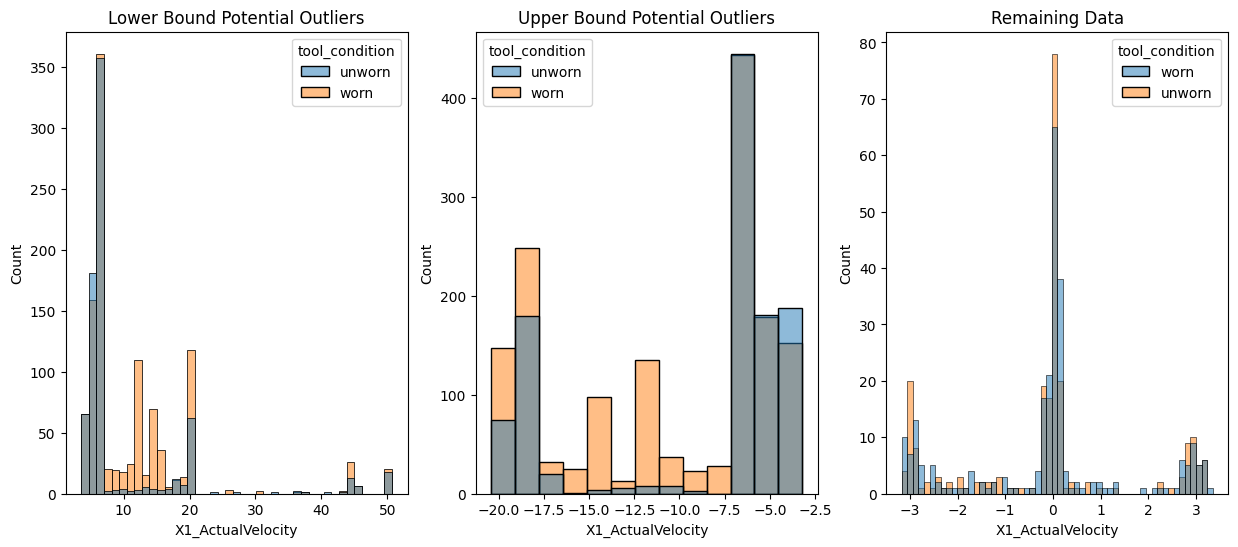

In [43]:
# Filter the data to show only the outliers to see if these values are related to "Worn" tool condition
print("Figure 10")
# create the dfs to drop into
xupper_bound_df, xlower_bound_df, x_remaining_df = quartile_filter("X1_ActualVelocity")


#set the figure from matplotlib to enable the visuals to be shown side-by-side
fig, (ax1,ax2, ax3) = plt.subplots(1,3,figsize=(15,6))

#drop into visuals
sns.histplot(data=xupper_bound_df,x="X1_ActualVelocity",hue="tool_condition", ax=ax1);
sns.histplot(data=xlower_bound_df,x="X1_ActualVelocity",hue="tool_condition", ax=ax2);
sns.histplot(data=x_remaining_df.sample(500,random_state=42),x="X1_ActualVelocity",hue="tool_condition",ax=ax3);

#set the titles
ax1.set_title("Lower Bound Potential Outliers")
ax2.set_title("Upper Bound Potential Outliers")
ax3.set_title("Remaining Data")

plt.show()


**Observation**

1. Figures 8 to 9.7 show that the potential outliers highlighted in the Data Profiling section are not outliers due as the fluctuations in the actual Velocity fluctuates constantly and considerably different in each experiment.
2. The dataset is heavily skewed around the 0 value due to it's median of 0 and mean value of ~-0.29, causing the outlier function to pick out a large number of outliers in the dataset.
3. Figure 10 shows that when splitting out the outliers from the main dataset, the values contain large proportions of "Worn" tool class suggesting that this is the reason for why these values are as extreme as they are.

Therefore, based on this analysis these data points will remain as they are due to their validity in the dataset.

Based on the relationship between X, Y and Z axis, it is logical to think that the same evidence would be seen in Y and Z axis.

---

**Next Step**

Verify that it is the same case for Y and Z axis.

In [44]:
cnc_df[['X1_ActualVelocity','Y1_ActualVelocity','Z1_ActualVelocity','S1_ActualVelocity']].describe()

X1_ActualVelocity  Y1_ActualVelocity  Z1_ActualVelocity  \
count            25286.0            25286.0            25286.0   
mean           -0.288657          -0.422932          -0.328759   
std              5.65826           6.006439           7.635223   
min                -20.4         -32.799999              -51.5   
25%                -2.05             -0.075                0.0   
50%                  0.0                0.0                0.0   
75%                  0.2                0.1                0.0   
max            50.700001          50.400002          50.900002   

       S1_ActualVelocity  
count            25286.0  
mean           38.986423  
std            23.491266  
min               -0.069  
25%                0.002  
50%            53.299999  
75%            53.400002  
max            53.799999

In [45]:
fig = px.scatter_matrix(cnc_df, dimensions=['X1_ActualVelocity','Y1_ActualVelocity','Z1_ActualVelocity','S1_ActualVelocity'])
print("Figure 11")
fig.show()


Figure 11


**Observation**

1. All three axis have very similar max values ~50mm/s, suggesting that these observations are quite common and therefore should be left as it appears that these extreme values reflect the impact of using a "Worn" tool.



---

**Next Step**

Verify the potential outliers in Actual Acceloration

### 4.4.2 Actual Acceleration

In [46]:
# Do same as above to see if there are consistent spikes in the visuals.
bokeh_split_line_plot('Y1_ActualAcceleration',11)

In [47]:
cnc_df[['X1_ActualAcceleration','Y1_ActualAcceleration','Z1_ActualAcceleration','S1_ActualAcceleration']].describe()

X1_ActualAcceleration  Y1_ActualAcceleration  Z1_ActualAcceleration  \
count                25286.0                25286.0                25286.0   
mean                0.094264               0.928832              -0.103658   
std                93.877625              85.074577              66.442673   
min                  -1280.0                -1260.0                -1260.0   
25%               -31.299999             -18.799999                  -6.25   
50%                      0.0                    0.0                    0.0   
75%                     25.0              18.799999                   6.25   
max                   1440.0                 1460.0                 1270.0   

       S1_ActualAcceleration  
count                25286.0  
mean                0.248602  
std                32.204079  
min                   -150.0  
25%                    -15.9  
50%                      0.0  
75%                     17.5  
max                    150.0

**Observation**

1. Figure 11- 12.1 show all three axis look very similar to that of the visualisations of Velocity which frequent spikes in acceloration. The spikes could be caused by the movement of the spindle where there is little resistance - for example where the tool is moving to it's next cut when it has finished a job.

2. The descriptive statistics also show that each axis show similar results where they have similar min and max values indicating that these extreme values are common on all three axis.

Therefore, these values will be left as they are due to evidence of legitimancy within the dataset.



---

**Next Step**

Review Actual Position Outliers

### 4.4.3 Actual Position

In [48]:
# create 3D visual of the position to gauge what the positonal data and what these outliers are
# Create filter for df using .isin()
print("figure 13")
macchine_process_filter = (cnc_df['Machining_Process'].isin(['Prep','End','Repositioning']))
position_df = cnc_df.loc[macchine_process_filter]

#Visualise
fig = px.scatter_3d(cnc_df.loc[cnc_df['Experiment_Num']==1],
                    x='X1_ActualPosition',
                    y='Y1_ActualPosition',
                    z='Z1_ActualPosition',
                    color='Machining_Process')

# Create a tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

#display figure
fig.show()


figure 13


Figure 14


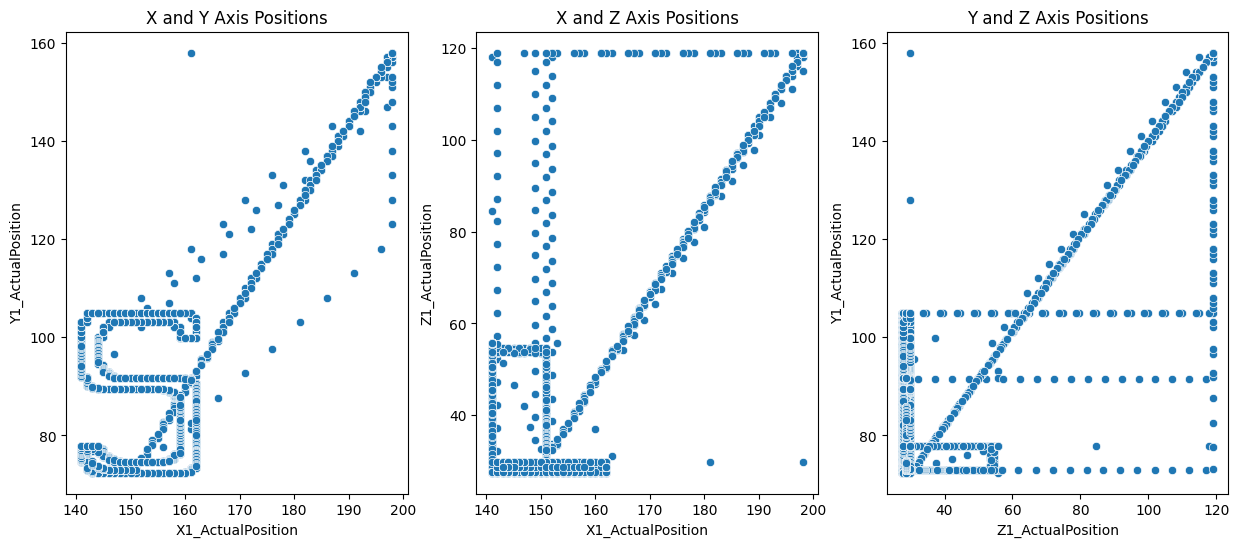

In [49]:
# As it is positional data, we should see a S-shape on a scatter graph for x and y axis.

#set the figure from matplotlib to enable the visuals to be shown side-by-side
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,6))
print("Figure 14")
#drop into visuals
sns.scatterplot(data=cnc_df, x='X1_ActualPosition', y='Y1_ActualPosition', ax=ax1);
sns.scatterplot(data=cnc_df, x='X1_ActualPosition', y='Z1_ActualPosition', ax=ax2);
sns.scatterplot(data=cnc_df, x='Z1_ActualPosition', y='Y1_ActualPosition', ax=ax3);

#set the titles
ax1.set_title("X and Y Axis Positions")
ax2.set_title("X and Z Axis Positions")
ax3.set_title("Y and Z Axis Positions")

plt.show()


In [50]:
# Verify that the data. Why is the point so far away from the rest?
filter_input = (cnc_df['X1_ActualPosition'] > 160) & (cnc_df['X1_ActualPosition'] < 162) & (cnc_df['Y1_ActualPosition'] > 157)
cnc_df[['X1_ActualAcceleration','Y1_ActualAcceleration','Z1_ActualAcceleration']].loc[filter_input]

X1_ActualAcceleration  Y1_ActualAcceleration  Z1_ActualAcceleration
2011                   6.25                  -25.0                    0.0

In [51]:
# Get the positions
filter_input = (cnc_df['X1_ActualPosition'] > 160) & (cnc_df['X1_ActualPosition'] < 162) & (cnc_df['Y1_ActualPosition'] > 157)
cnc_df[['X1_ActualPosition','Y1_ActualPosition','Z1_ActualPosition']].loc[filter_input]

X1_ActualPosition  Y1_ActualPosition  Z1_ActualPosition
2011              161.0              158.0              119.0

**Observation**

1. When visualising the position of the three axis, the outliers highlighted in the Data Profiling section look to be correct as, when using "X and Y Axis Positions" scatter plot as a reference, all the points conform to the overall pattern of the dataset. For example, where the position of the spindle is at (X-Axis:161, Y-Axis:158), you can see the same point when on the "Y and Z Axis Position" as (Y-Axis:158, Z-Axis:119) which is centered around a lot of the data points in the graph.



Therefore, no further action will be taken on these points.



---

**Next Step**

Review Actual Voltage Outliers

### 4.4.4 Machine power output - Voltage, Current, Current Feedback, Power, DCBusVoltage

figure 15


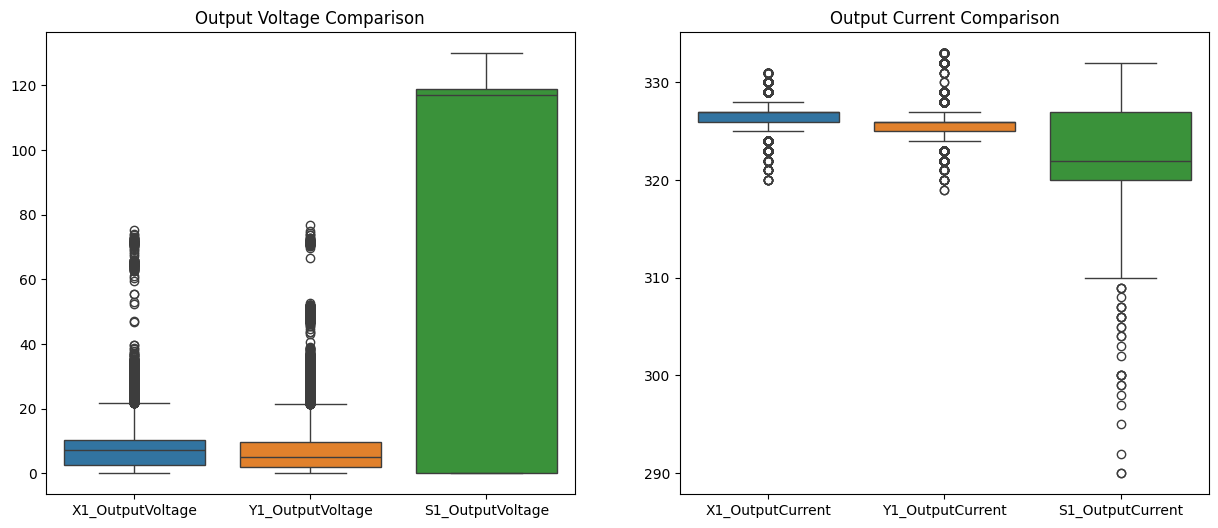

In [52]:
# We saw in the Data Profiling section that Z-axis has a 0 output volate and shall be excluded.
voltage_df = cnc_df[['X1_OutputVoltage',
                     'Y1_OutputVoltage',
                     'S1_OutputVoltage',
                     'tool_condition']]

current_df = cnc_df[['X1_OutputCurrent',
                     'Y1_OutputCurrent',
                     'S1_OutputCurrent',
                     'tool_condition']]
print("figure 15")


#set the figure from matplotlib to enable the visuals to be shown side-by-side
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

#drop into visuals
sns.boxplot(data=voltage_df, ax=ax1);
sns.boxplot(data=current_df, ax=ax2);


#set the titles
ax1.set_title("Output Voltage Comparison")
ax2.set_title("Output Current Comparison")


plt.show()

In [53]:
# Review the descriptive statistics.
cnc_df[['X1_OutputVoltage','Y1_OutputVoltage','S1_OutputVoltage','X1_OutputCurrent','Y1_OutputCurrent','S1_OutputCurrent']].describe()


X1_OutputVoltage  Y1_OutputVoltage  S1_OutputVoltage  X1_OutputCurrent  \
count           25286.0           25286.0           25286.0           25286.0   
mean           7.986942          7.068352         85.479187        326.945862   
std            7.710379          8.601483         52.531864          1.459937   
min                 0.0               0.0               0.0             320.0   
25%                2.59              1.81               0.0             326.0   
50%                7.14              4.93             117.0             327.0   
75%                10.2              9.61             119.0             327.0   
max           75.400002         76.800003             130.0             331.0   

       Y1_OutputCurrent  S1_OutputCurrent  
count           25286.0           25286.0  
mean         325.862061        322.784515  
std            1.804164          4.293571  
min               319.0             290.0  
25%               325.0             320.0  
50%               326.0             322.0  
75%               326.0             327.0  
max               333.0             332.0

In [54]:
# create 3D visual of the position to gauge what the positonal data and what these outliers are
# What is causing the drops in volatge and current?
# Is it when the machine is not operating, as in when the spindle is not cutting?
print("figure 16")


pos_df = cnc_df.loc[cnc_df['S1_OutputCurrent']<320]

#visualise the results
location_3d(pos_df)



figure 16


figure 17


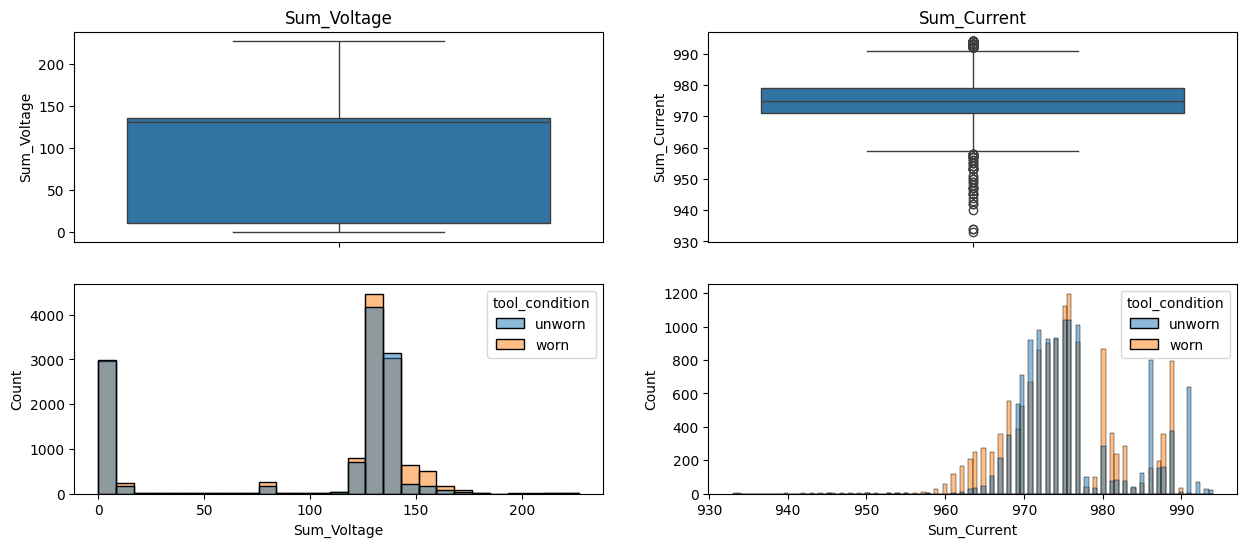

In [55]:
# Engineer a new feature that captures the total output of the machine rather than focussing on each axis.
print("figure 17")

#create new features
cnc_df['Sum_Voltage'] = cnc_df['X1_OutputVoltage'] + cnc_df['Y1_OutputVoltage'] + cnc_df['S1_OutputVoltage']  + cnc_df['Z1_OutputVoltage']
cnc_df['Sum_Current'] = cnc_df['X1_OutputCurrent'] + cnc_df['Y1_OutputCurrent'] + cnc_df['S1_OutputCurrent']  + cnc_df['Z1_OutputVoltage']

fig, ax1 = plt.subplots(2,2,figsize=(15,6));

# create the visuals
sns.boxplot(cnc_df['Sum_Voltage'],ax=ax1[0,0]);
sns.boxplot(cnc_df['Sum_Current'],ax=ax1[0,1]);
sns.histplot(cnc_df, x='Sum_Voltage',ax=ax1[1,0],hue='tool_condition');
sns.histplot(cnc_df, x='Sum_Current',ax=ax1[1,1],hue='tool_condition');

# set the titles
ax1[0,0].set_title('Sum_Voltage');
ax1[0,1].set_title('Sum_Current');

Figure 18
tool_condition
unworn    758
worn        1
Name: count, dtype: int64


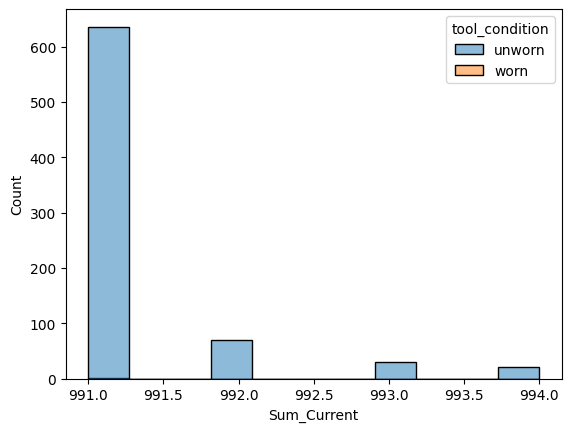

In [56]:
# review outliers in Sum_Current
# focus on Sum_CurrentFeedback lower bound outliers
print("Figure 18")
outliers = (cnc_df['Sum_Current']> 990)

outlier_df = cnc_df.loc[outliers]

sns.histplot(outlier_df,x='Sum_Current',hue='tool_condition')

print(cnc_df['tool_condition'].loc[outliers].value_counts())

In [57]:
# It doesn't look like the tool condition impacted the Current Output
# Review the position of the spindle to see where these spikes happened
print("Figure 19")

# create new df with the features needed.
pos_df = outlier_df[['Sum_Current',
                 'Machining_Process',
                 'X1_ActualPosition',
                 'Y1_ActualPosition',
                 'Z1_ActualPosition',
                 'S1_ActualPosition',
                 'tool_condition']]




print(f"Total zero values - {pos_df['Sum_Current'].count()}")
print(f"Total zero values - {pos_df['Sum_Current'].median()}")

# Visualise the 3d positioning of spindle
location_3d(pos_df)

Figure 19
Total zero values - 759
Total zero values - 991.0


Figure 20


Text(0.5, 1.0, 'New Sum_Current Distribution')

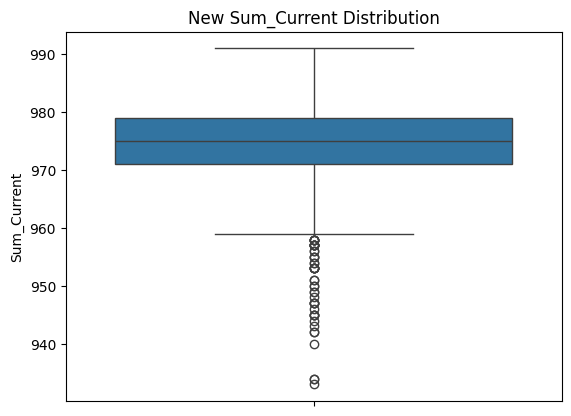

In [58]:
# Rectify the outliers by imputing them with the median.
# The psoition of the axis suggest the tool is no where near the product,
# which could mean either it experienced spikes when when it was not cutting
# or these are anomalies in the readings. In this situation,
# They shall be treated as data errors and will be rectified.
print("Figure 20")
handle_outlier('Sum_Current','upper')

# show results
sns.boxplot(cnc_df['Sum_Current']);

plt.title('New Sum_Current Distribution')

Figure 21
tool_condition
worn      19
unworn    13
Name: count, dtype: int64


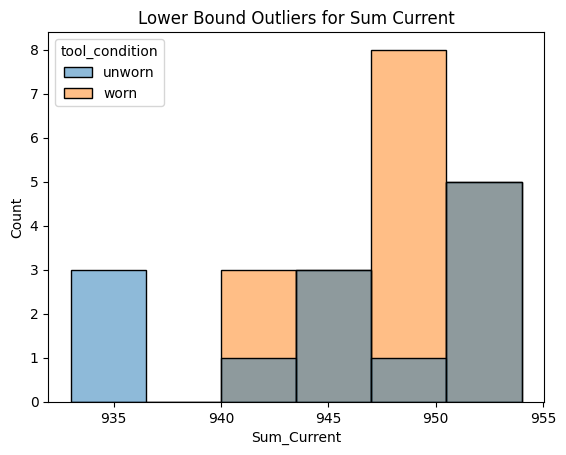

In [59]:
# review lower bound outliers in Sum_Current
print("Figure 21")
outliers = (cnc_df['Sum_Current'] < 955)

outlier_df = cnc_df.loc[outliers]

#create histogram
sns.histplot(outlier_df,x='Sum_Current',hue='tool_condition')

#set title
plt.title('Lower Bound Outliers for Sum Current')
print(cnc_df['tool_condition'].loc[outliers].value_counts())

In [60]:
# review the location of the axis for these drops in current
print("Figure 22")
location_3d(outlier_df)

Figure 22


In [61]:
# It looks like the drops happened when the axis were cutting the material
# due to the axis actual location values representing the location of the product.
# Review if acceloration or velocity was the cause.

#filter to same location
z = list(outlier_df['Z1_ActualPosition'].unique())
y = list(outlier_df['Y1_ActualPosition'].unique())
x = list(outlier_df['X1_ActualPosition'].unique())

# get the same location of the spindle as the outlier
location_filter = (cnc_df['Z1_ActualPosition'].isin(z) &
                   cnc_df['Y1_ActualPosition'].isin(y) &
                   cnc_df['X1_ActualPosition'].isin(x)
                   )

sample_size = outlier_df['S1_ActualVelocity'].count()

print(f"Mean cnc_df S1_ActualVelocity: {cnc_df['S1_ActualVelocity'].loc[location_filter].mean()}")
print(f"Mean outlier_df S1_ActualVelocity: {outlier_df['S1_ActualVelocity'].mean()}")
print(f"Mean cnc_df S1_ActualAcceleration: {cnc_df['S1_ActualAcceleration'].loc[location_filter].mean()}")
print(f"Mean outlier_df S1_ActualAcceleration: {outlier_df['S1_ActualAcceleration'].mean()}")
print(f"Mean cnc_df Sum_Current: {cnc_df['Sum_Current'].loc[location_filter].mean()}")
print(f"Mean outlier_df Sum_Current: {outlier_df['Sum_Current'].mean()}")

Mean cnc_df S1_ActualVelocity: 49.60040283203125
Mean outlier_df S1_ActualVelocity: 43.60625076293945
Mean cnc_df S1_ActualAcceleration: 20.83454132080078
Mean outlier_df S1_ActualAcceleration: 104.296875
Mean cnc_df Sum_Current: 968.289156626506
Mean outlier_df Sum_Current: 946.875


In [62]:
# Review the relationship between the features
cnc_df[['Sum_Current','S1_ActualAcceleration','S1_ActualVelocity']].corr()

Sum_Current  S1_ActualAcceleration  S1_ActualVelocity
Sum_Current               1.000000              -0.077862          -0.780695
S1_ActualAcceleration    -0.077862               1.000000           0.007063
S1_ActualVelocity        -0.780695               0.007063           1.000000

In [63]:
# impute the outliers
handle_outlier('Sum_Current','lower')


X1_ActualPosition  X1_ActualVelocity  X1_ActualAcceleration  \
0                  198.0                0.0                    0.0   
1                  198.0              -10.8                 -350.0   
2                  196.0         -17.799999                  -6.25   
3                  194.0              -18.0                    0.0   
4                  193.0              -17.9             -18.799999   
...                  ...                ...                    ...   
25281              144.0               -2.3                  100.0   
25282              144.0              -2.47                   25.0   
25283              143.0               -2.2              81.199997   
25284              143.0              -2.05              68.699997   
25285              143.0              -2.15             -68.699997   

       X1_CurrentFeedback  X1_DCBusVoltage  X1_OutputCurrent  \
0                    0.18           0.0207             329.0   
1                   -10.9            0.186             328.0   
2                   -8.59             0.14             328.0   
3                   -6.11             0.13             327.0   
4                    -5.7            0.114             328.0   
...                   ...              ...               ...   
25281               -5.05           0.0732             327.0   
25282               -5.62           0.0996             327.0   
25283               -4.42           0.0539             327.0   
25284               -5.83           0.0809             327.0   
25285               -4.37           0.0857             327.0   

       X1_OutputVoltage  X1_OutputPower  Y1_ActualPosition  Y1_ActualVelocity  \
0                  2.77       -0.000001              158.0             -0.025   
1             23.299999         0.00448              158.0         -19.799999   
2                  30.6         0.00533              154.0              -32.5   
3             30.299999         0.00489              151.0         -32.599998   
4                  30.5         0.00425              148.0              -32.0   
...                 ...             ...                ...                ...   
25281              9.56        0.000366          73.699997               1.45   
25282              10.3        0.000506          73.800003                1.7   
25283              7.79        0.000215               74.0               1.77   
25284              8.32         0.00033          74.199997               1.98   
25285              8.01        0.000407          74.400002               2.03   

       ...  X1_LostVelocity  Y1_LostVelocity  Z1_LostVelocity  \
0      ...              0.0            0.025              0.0   
1      ...             -2.8             -4.8             -5.3   
2      ...             -0.1              0.2              0.0   
3      ...              0.1              0.3              0.0   
4      ...              0.0             -0.3             -0.1   
...    ...              ...              ...              ...   
25281  ...            -0.27              0.1              0.0   
25282  ...             0.01             0.01              0.0   
25283  ...            -0.15             0.09              0.0   
25284  ...            -0.18             0.03            0.025   
25285  ...             0.06             0.12              0.0   

       S1_LostVelocity  X1_LostAcceleration  Y1_LostAcceleration  \
0               -0.001                  0.0                 6.25   
1                  0.0                 -8.0                103.0   
2                  0.0             6.249905            -0.000095   
3                0.001            -0.000095            62.499905   
4                  0.0            18.800095          -137.999908   
...                ...                  ...                  ...   
25281              0.0           -99.023003            26.620001   
25282             -0.1               -23.92                14.05   
25283              0.0         

In [64]:
# As the focus will be on the machine's total output, a new feature must be created
# with the outher power related features

cnc_df['Sum_CurrentFeedback'] = cnc_df['X1_CurrentFeedback'] + cnc_df['Y1_CurrentFeedback'] + cnc_df['Z1_CurrentFeedback'] + cnc_df['S1_CurrentFeedback']
cnc_df['Sum_DCBusVoltage'] = cnc_df['X1_DCBusVoltage'] + cnc_df['Y1_DCBusVoltage'] + cnc_df['Z1_DCBusVoltage'] + cnc_df['S1_DCBusVoltage']
cnc_df['Sum_OutputPower'] = cnc_df['X1_OutputPower'] + cnc_df['Y1_OutputPower'] + cnc_df['S1_OutputPower']

Figure 23


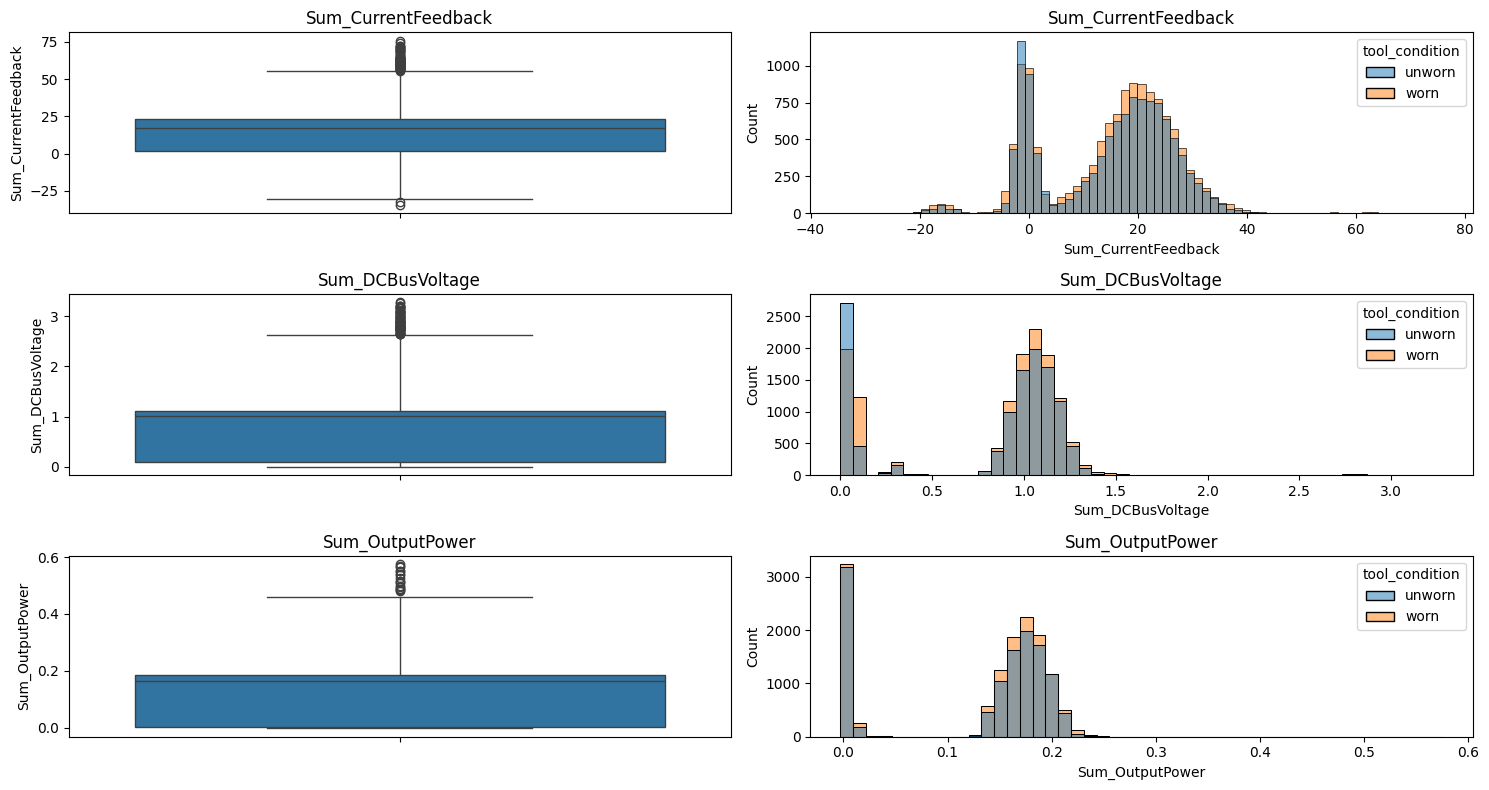

In [65]:
fig, ax1 = plt.subplots(3,2,figsize=(15,8))
print("Figure 23")
#visualise the data
sns.boxplot(cnc_df['Sum_CurrentFeedback'],ax=ax1[0,0]);
sns.boxplot(cnc_df['Sum_DCBusVoltage'],ax=ax1[1,0]);
sns.boxplot(cnc_df['Sum_OutputPower'],ax=ax1[2,0]);
sns.histplot(cnc_df,x='Sum_CurrentFeedback',ax=ax1[0,1],hue='tool_condition');
sns.histplot(cnc_df, x='Sum_DCBusVoltage',ax=ax1[1,1],hue='tool_condition');
sns.histplot(cnc_df, x='Sum_OutputPower',ax=ax1[2,1],hue='tool_condition');

#set titles
ax1[0,0].set_title('Sum_CurrentFeedback')
ax1[0,1].set_title('Sum_CurrentFeedback')
ax1[1,0].set_title('Sum_DCBusVoltage')
ax1[1,1].set_title('Sum_DCBusVoltage')
ax1[2,0].set_title('Sum_OutputPower')
ax1[2,1].set_title('Sum_OutputPower')

plt.tight_layout()

In [66]:
# drop the x, y, z and s Output Voltage and current as these are now redundant

remove_cols = ['OutputVoltage','OutputCurrent','CurrentFeedback','DCBusVoltage','OutputPower']

# create a list of columns to remove
# i[3:] is taking the third character to the end of the string.
list_to_remove = [i for i in cnc_df.columns if i[3:] in remove_cols]


#drop columns
cnc_df.drop(columns=list_to_remove,
            inplace=True)

# check all has worked

cnc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25286 entries, 0 to 25285
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          25286 non-null  Float32
 1   X1_ActualVelocity          25286 non-null  Float32
 2   X1_ActualAcceleration      25286 non-null  Float32
 3   Y1_ActualPosition          25286 non-null  Float32
 4   Y1_ActualVelocity          25286 non-null  Float32
 5   Y1_ActualAcceleration      25286 non-null  Float32
 6   Z1_ActualPosition          25286 non-null  Float32
 7   Z1_ActualVelocity          25286 non-null  Float32
 8   Z1_ActualAcceleration      25286 non-null  Float32
 9   S1_ActualPosition          25286 non-null  Float32
 10  S1_ActualVelocity          25286 non-null  Float32
 11  S1_ActualAcceleration      25286 non-null  Float32
 12  S1_SystemInertia           25286 non-null  Float32
 13  M1_CURRENT_PROGRAM_NUMBER  25286 non-null  Flo

In [67]:
# get summary statistics
cnc_df[['Sum_CurrentFeedback','Sum_DCBusVoltage','Sum_OutputPower']].describe()

Sum_CurrentFeedback  Sum_DCBusVoltage  Sum_OutputPower
count              25286.0           25286.0          25286.0
mean             14.712553          0.799308         0.128652
std              11.989572          0.475824          0.08079
min               -34.5266               0.0        -0.002958
25%                 1.6195          0.100725          0.00062
50%                  17.51           1.00775         0.165368
75%                  23.24            1.1121         0.184254
max                  75.87            3.2799           0.5755

Figure 24
tool_condition
worn      54
unworn    42
Name: count, dtype: int64


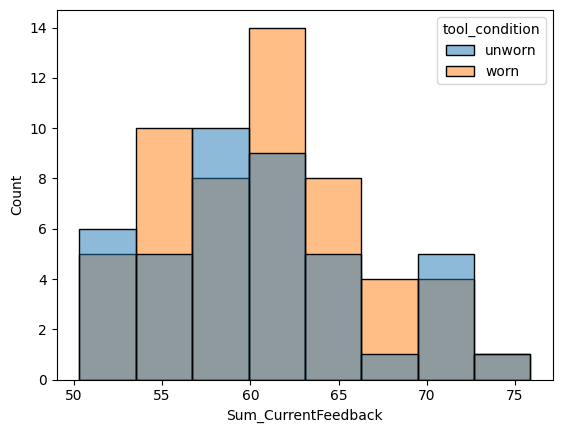

In [68]:
# focus of Sum_CurrentFeedback
print("Figure 24")
outliers = (cnc_df['Sum_CurrentFeedback']>50)

sns.histplot(cnc_df.loc[outliers],x='Sum_CurrentFeedback',hue='tool_condition')

print(cnc_df['tool_condition'].loc[outliers].value_counts())

In [69]:
# Handle the outliers
handle_outlier('Sum_CurrentFeedback','upper')

X1_ActualPosition  X1_ActualVelocity  X1_ActualAcceleration  \
0                  198.0                0.0                    0.0   
1                  198.0              -10.8                 -350.0   
2                  196.0         -17.799999                  -6.25   
3                  194.0              -18.0                    0.0   
4                  193.0              -17.9             -18.799999   
...                  ...                ...                    ...   
25281              144.0               -2.3                  100.0   
25282              144.0              -2.47                   25.0   
25283              143.0               -2.2              81.199997   
25284              143.0              -2.05              68.699997   
25285              143.0              -2.15             -68.699997   

       Y1_ActualPosition  Y1_ActualVelocity  Y1_ActualAcceleration  \
0                  158.0             -0.025                  -6.25   
1                  158.0         -19.799999                 -750.0   
2                  154.0              -32.5                    0.0   
3                  151.0         -32.599998                  -62.5   
4                  148.0              -32.0                  138.0   
...                  ...                ...                    ...   
25281          73.699997               1.45                  -25.0   
25282          73.800003                1.7                  -12.5   
25283               74.0               1.77                  -12.5   
25284          74.199997               1.98                    0.0   
25285          74.400002               2.03                   12.5   

       Z1_ActualPosition  Z1_ActualVelocity  Z1_ActualAcceleration  \
0                  119.0                0.0                    0.0   
1                  119.0         -20.299999                 -712.0   
2                  115.0         -33.700001                   37.5   
3                  112.0         -33.700001                  -6.25   
4                  109.0         -33.599998              18.799999   
...                  ...                ...                    ...   
25281          28.700001                0.0                  -6.25   
25282          28.700001                0.0                  -6.25   
25283          28.700001                0.0                    0.0   
25284          28.700001             -0.025                  -6.25   
25285          28.700001                0.0                   6.25   

       S1_ActualPosition  ...  S1_LostVelocity  X1_LostAcceleration  \
0                 -361.0  ...           -0.001                  0.0   
1                 -361.0  ...              0.0                 -8.0   
2                 -361.0  ...              0.0             6.249905   
3                 -361.0  ...            0.001            -0.000095   
4                 -361.0  ...              0.0            18.800095   
...                  ...  ...              ...                  ...   
25281         -72.400002  ...              0.0           -99.023003   
25282         -67.099998  ...             -0.1               -23.92   
25283         -61.700001  ...              0.0           -80.029999   
25284         -56.400002  ...              0.1           -67.440002   
25285         -50.900002  ...              0.0            70.050003   

       Y1_LostAcceleration  Z1_LostAcceleration  S1_LostAcceleration  \
0                     6.25                  0.0               -0.001   
1                    103.0                 38.0                  0.0   
2                -0.000095           -37.500095                  0.0   
3                62.499905                 6.25                0.001   
4              -137.999908           -18.799999                  0.0   
...                    ...                  ...                  ...   
25281            26.620001                 6.25                  0.0   
25282                14.05                 6.25        

tool_condition
worn      6
unworn    4
Name: count, dtype: int64


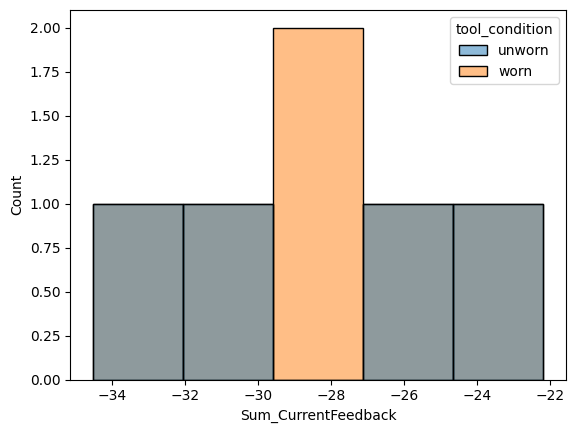

In [70]:
# focus on Sum_CurrentFeedback lower bound outliers
outliers = (cnc_df['Sum_CurrentFeedback']<-22)

sns.histplot(cnc_df.loc[outliers],x='Sum_CurrentFeedback',hue='tool_condition')

print(cnc_df['tool_condition'].loc[outliers].value_counts())

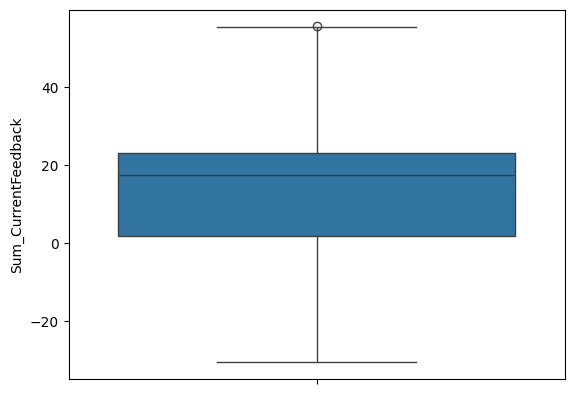

In [71]:
# impute the values with the min value to keep its negative value
# Therefore the function won't be used and will be manually written.
# Create a function that imputes the selected outlier with the median value

q25, q75 = np.percentile(cnc_df['Sum_CurrentFeedback'], [25, 75])
iqr = q75 - q25

# calculate the min and max
min_val = q25 - 1.5*iqr

# replace the values with the min_val variable using np.where()
cnc_df['Sum_CurrentFeedback'] = np.where(cnc_df['Sum_CurrentFeedback'] < min_val, min_val, cnc_df['Sum_CurrentFeedback'])

# show results
sns.boxplot(cnc_df['Sum_CurrentFeedback']);

In [72]:
# create 3D visual of the position of the spindle where the voltage is 0
print("Figure 25")


# filter data to show where the spindle is when sum_voltage is at 0
pos_df = cnc_df.loc[cnc_df['Sum_Voltage']==0]

print(f"Total zero values - {pos_df['Sum_Voltage'].count()}")


# show results
location_3d(pos_df)

Figure 25
Total zero values - 1480


In [73]:
# create 3D visual of the position of the spindle where the voltage is 0
print("figure 25")

# filter data to show where the spindle is when sum_voltage is at 0
OutputPower_df = cnc_df.loc[cnc_df['Sum_OutputPower']>=0.3]

print(f"Total zero values - {OutputPower_df['Sum_OutputPower'].count()}")
print(f"Total zero values - {OutputPower_df['Sum_OutputPower'].median()}")

#show results
location_3d(OutputPower_df)

figure 25
Total zero values - 46
Total zero values - 0.42008813749999996


In [74]:
# impute the upper outliers
handle_outlier('Sum_OutputPower','upper')

X1_ActualPosition  X1_ActualVelocity  X1_ActualAcceleration  \
0                  198.0                0.0                    0.0   
1                  198.0              -10.8                 -350.0   
2                  196.0         -17.799999                  -6.25   
3                  194.0              -18.0                    0.0   
4                  193.0              -17.9             -18.799999   
...                  ...                ...                    ...   
25281              144.0               -2.3                  100.0   
25282              144.0              -2.47                   25.0   
25283              143.0               -2.2              81.199997   
25284              143.0              -2.05              68.699997   
25285              143.0              -2.15             -68.699997   

       Y1_ActualPosition  Y1_ActualVelocity  Y1_ActualAcceleration  \
0                  158.0             -0.025                  -6.25   
1                  158.0         -19.799999                 -750.0   
2                  154.0              -32.5                    0.0   
3                  151.0         -32.599998                  -62.5   
4                  148.0              -32.0                  138.0   
...                  ...                ...                    ...   
25281          73.699997               1.45                  -25.0   
25282          73.800003                1.7                  -12.5   
25283               74.0               1.77                  -12.5   
25284          74.199997               1.98                    0.0   
25285          74.400002               2.03                   12.5   

       Z1_ActualPosition  Z1_ActualVelocity  Z1_ActualAcceleration  \
0                  119.0                0.0                    0.0   
1                  119.0         -20.299999                 -712.0   
2                  115.0         -33.700001                   37.5   
3                  112.0         -33.700001                  -6.25   
4                  109.0         -33.599998              18.799999   
...                  ...                ...                    ...   
25281          28.700001                0.0                  -6.25   
25282          28.700001                0.0                  -6.25   
25283          28.700001                0.0                    0.0   
25284          28.700001             -0.025                  -6.25   
25285          28.700001                0.0                   6.25   

       S1_ActualPosition  ...  S1_LostVelocity  X1_LostAcceleration  \
0                 -361.0  ...           -0.001                  0.0   
1                 -361.0  ...              0.0                 -8.0   
2                 -361.0  ...              0.0             6.249905   
3                 -361.0  ...            0.001            -0.000095   
4                 -361.0  ...              0.0            18.800095   
...                  ...  ...              ...                  ...   
25281         -72.400002  ...              0.0           -99.023003   
25282         -67.099998  ...             -0.1               -23.92   
25283         -61.700001  ...              0.0           -80.029999   
25284         -56.400002  ...              0.1           -67.440002   
25285         -50.900002  ...              0.0            70.050003   

       Y1_LostAcceleration  Z1_LostAcceleration  S1_LostAcceleration  \
0                     6.25                  0.0               -0.001   
1                    103.0                 38.0                  0.0   
2                -0.000095           -37.500095                  0.0   
3                62.499905                 6.25                0.001   
4              -137.999908           -18.799999                  0.0   
...                    ...                  ...                  ...   
25281            26.620001                 6.25                  0.0   
25282                14.05                 6.25        

Figure 26
96
tool_condition
worn      53
unworn    43
Name: count, dtype: int64


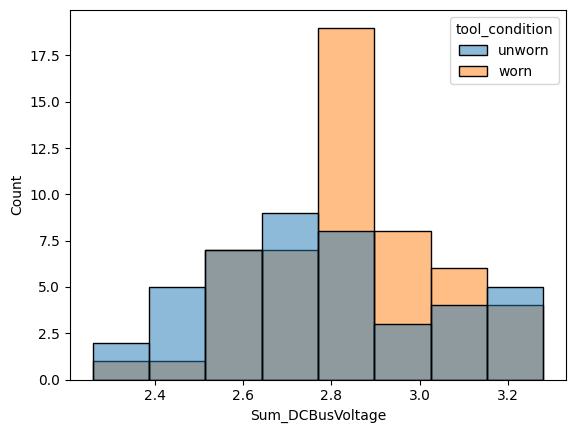

In [75]:
# focus on Sum_CurrentFeedback lower bound outliers
outliers = (cnc_df['Sum_DCBusVoltage']> 2.2)
print("Figure 26")
#visualise the outliers
sns.histplot(cnc_df.loc[outliers],x='Sum_DCBusVoltage',hue='tool_condition')

print(cnc_df['tool_condition'].loc[outliers].count())
print(cnc_df['tool_condition'].loc[outliers].value_counts())


In [76]:
# create 3D visual of the position of the spindle where the voltage is greater than 2.2
print("Figure 27")
print(cnc_df['Machining_Process'].loc[outliers].count())
print(cnc_df['Machining_Process'].loc[outliers].value_counts())


# filter data to show where the spindle is when sum_voltage is at 0
Sum_DCBusVoltage_df = cnc_df.loc[cnc_df['Sum_DCBusVoltage']>=2.2]

print(f"Total zero values - {Sum_DCBusVoltage_df['Sum_DCBusVoltage'].count()}")
print(f"Total zero values - {Sum_DCBusVoltage_df['Sum_DCBusVoltage'].median()}")

# show the location of the spindle
location_3d(Sum_DCBusVoltage_df)

Figure 27
96
Machining_Process
Layer 1 Up       34
Layer 2 Up       13
End              13
Layer 3 Up       10
Layer 1 Down      7
Repositioning     6
Layer 2 Down      5
Layer 3 Down      5
Prep              3
Name: count, dtype: int64
Total zero values - 96
Total zero values - 2.79815


In [77]:
# impute the outliers
handle_outlier('Sum_DCBusVoltage','upper')


X1_ActualPosition  X1_ActualVelocity  X1_ActualAcceleration  \
0                  198.0                0.0                    0.0   
1                  198.0              -10.8                 -350.0   
2                  196.0         -17.799999                  -6.25   
3                  194.0              -18.0                    0.0   
4                  193.0              -17.9             -18.799999   
...                  ...                ...                    ...   
25281              144.0               -2.3                  100.0   
25282              144.0              -2.47                   25.0   
25283              143.0               -2.2              81.199997   
25284              143.0              -2.05              68.699997   
25285              143.0              -2.15             -68.699997   

       Y1_ActualPosition  Y1_ActualVelocity  Y1_ActualAcceleration  \
0                  158.0             -0.025                  -6.25   
1                  158.0         -19.799999                 -750.0   
2                  154.0              -32.5                    0.0   
3                  151.0         -32.599998                  -62.5   
4                  148.0              -32.0                  138.0   
...                  ...                ...                    ...   
25281          73.699997               1.45                  -25.0   
25282          73.800003                1.7                  -12.5   
25283               74.0               1.77                  -12.5   
25284          74.199997               1.98                    0.0   
25285          74.400002               2.03                   12.5   

       Z1_ActualPosition  Z1_ActualVelocity  Z1_ActualAcceleration  \
0                  119.0                0.0                    0.0   
1                  119.0         -20.299999                 -712.0   
2                  115.0         -33.700001                   37.5   
3                  112.0         -33.700001                  -6.25   
4                  109.0         -33.599998              18.799999   
...                  ...                ...                    ...   
25281          28.700001                0.0                  -6.25   
25282          28.700001                0.0                  -6.25   
25283          28.700001                0.0                    0.0   
25284          28.700001             -0.025                  -6.25   
25285          28.700001                0.0                   6.25   

       S1_ActualPosition  ...  S1_LostVelocity  X1_LostAcceleration  \
0                 -361.0  ...           -0.001                  0.0   
1                 -361.0  ...              0.0                 -8.0   
2                 -361.0  ...              0.0             6.249905   
3                 -361.0  ...            0.001            -0.000095   
4                 -361.0  ...              0.0            18.800095   
...                  ...  ...              ...                  ...   
25281         -72.400002  ...              0.0           -99.023003   
25282         -67.099998  ...             -0.1               -23.92   
25283         -61.700001  ...              0.0           -80.029999   
25284         -56.400002  ...              0.1           -67.440002   
25285         -50.900002  ...              0.0            70.050003   

       Y1_LostAcceleration  Z1_LostAcceleration  S1_LostAcceleration  \
0                     6.25                  0.0               -0.001   
1                    103.0                 38.0                  0.0   
2                -0.000095           -37.500095                  0.0   
3                62.499905                 6.25                0.001   
4              -137.999908           -18.799999                  0.0   
...                    ...                  ...                  ...   
25281            26.620001                 6.25                  0.0   
25282                14.05                 6.25        

**Observation**

---



1. the axis distributions wihtin Output Current and Voltage were being impacted by the numbers centred on and around 0. This is because the machine's axis produces 0 output when the axis is not in use. Therefore, to rectify this, a new feature was created that captures the output of the entire machine, rather than focussing on individual axis, which has pushed the distribution away from the 0 value concentration.
2. The new features appeared to still contain outliers which were validated and rectified.

---

**Next Step**

---



EDA

# **5. EDA**

---



With this section of the project, it's aim is to answer the following research question -

How can we predict manufacturing equipment failure using data analysis and Machine Learning Models?

However, the question is highly open-ended giving no direction as there are multiple avenues to explore which could lead to falling into the rbbit hole trap. To provide clear direction and avoid this risk, the question will be broken down into manageable and purposeful chunks.

Therefore, the key questions that this section will explore are:
1. What are the impacts to the machine's output energy parameters when using a 'Worn' tool?
2. Does the tool's condition impact it's performance?


Before diving into EDA, the data must be split into training, validation and test.

Validation dataset will be used as part of the Machine Learning hyperparameter tuning to test it's impact on the model(s) when conducting Cross Validation (Lin, 2024)


## 5.1 Data Split - Train, Validation and Test.

In [78]:
# create training data which will be 60%
# train_df will be the DataFrame used in EDA phase.
train_df,  temp_df = train_test_split(cnc_df, test_size=0.4, random_state=42)

# create validation and test sets where the spilts are 20% validate and 20% test.
# temp_df is used because it contains the 40% of the data which is then split into 2
test_df, validate_df = train_test_split(temp_df, test_size=0.5, random_state=42)


# split out x and y but not for train as this will be done at the end of this section
# to prevent any duplication of work if any transformations of the features are required.

# validate set
X_validate = validate_df.loc[:, validate_df.columns != 'tool_condition']
y_validate = validate_df['tool_condition']

# Test set
X_test = test_df.loc[:, test_df.columns != 'tool_condition']
y_test = test_df['tool_condition']

In [79]:
# As hypothesis testing will be used within this section, a function will be created for ease of use
# Additionally, as there are distributions that are not normally distributed, boosttrapping method will be used
# as it creates a random mean sampling distribution which then follows a normal distribution due the underpinning laws of central
# limit theorem (Waples, 2024).

def hypothesis_test(sample_a,sample_b):

    #bootstrap sampling
    bootstrap_sample_a=[]
    bootstrap_sample_b=[]

    #create the mean sample
    for i in range(1000):
      #take random samples. size=len(sample_a) ensures we have the sample number of
      # samples taken as the sample size of sample_a
      sample_a_ = np.random.choice(sample_a, size=len(sample_a),replace=True)
      sample_b_ = np.random.choice(sample_b, size=len(sample_b),replace=True)
      bootstrap_sample_a.append(np.mean(sample_a_))
      bootstrap_sample_b.append(np.mean(sample_b_))

    #convert to np arrays
    bootstrap_sample_a = np.array(bootstrap_sample_a)
    bootstrap_sample_b = np.array(bootstrap_sample_b)

    # get sample sizes
    n1 = len(bootstrap_sample_a)
    n2 = len(bootstrap_sample_b)

    # get the standard deviations
    std1 = np.std(bootstrap_sample_a)
    std2 = np.std(bootstrap_sample_b)

    #calculate the z-scritical value and look up using cdf.
    denominator = np.sqrt((std1**2/n1) + (std2**2/n2))
    mean_diff = bootstrap_sample_a.mean()-bootstrap_sample_b.mean()
    z_critical = mean_diff/denominator
    p = 2 * (1 - abs(st.norm.cdf(z_critical)))

    if p < 0.05:
        output = print(f'Reject the Null hypothesis as p equals {p}')
    else:
        output = print(f'Unable to reject the Null Hypothesis as p equals {p}')
    return output


## 5.2 What are the impacts to the machine's output energy parameters when using a 'Worn' tool?

Within the outlier section, we had highlighted that there were anomalies in the Output Current and Voltage that may have been caused by the condition of the tool. Because of this, both these features will be explored more in depth along with DCBusVoltage and Output Power.

In [80]:
# Create a Dataframe that focuses on when the tool is on the product
# and visualise to confirm the position.
print('Figure 28')

# When z was between 27.5 and 29.7, it was cutting the product
prod_location_filter = (train_df['Z1_ActualPosition']>=27.5) & (train_df['Z1_ActualPosition']<=29.7)

power_df = train_df[['Sum_CurrentFeedback','Sum_Current','Sum_Voltage','Sum_DCBusVoltage','Sum_OutputPower','tool_condition']].loc[prod_location_filter]

location_3d(train_df.loc[prod_location_filter])

Figure 28


Figure 29


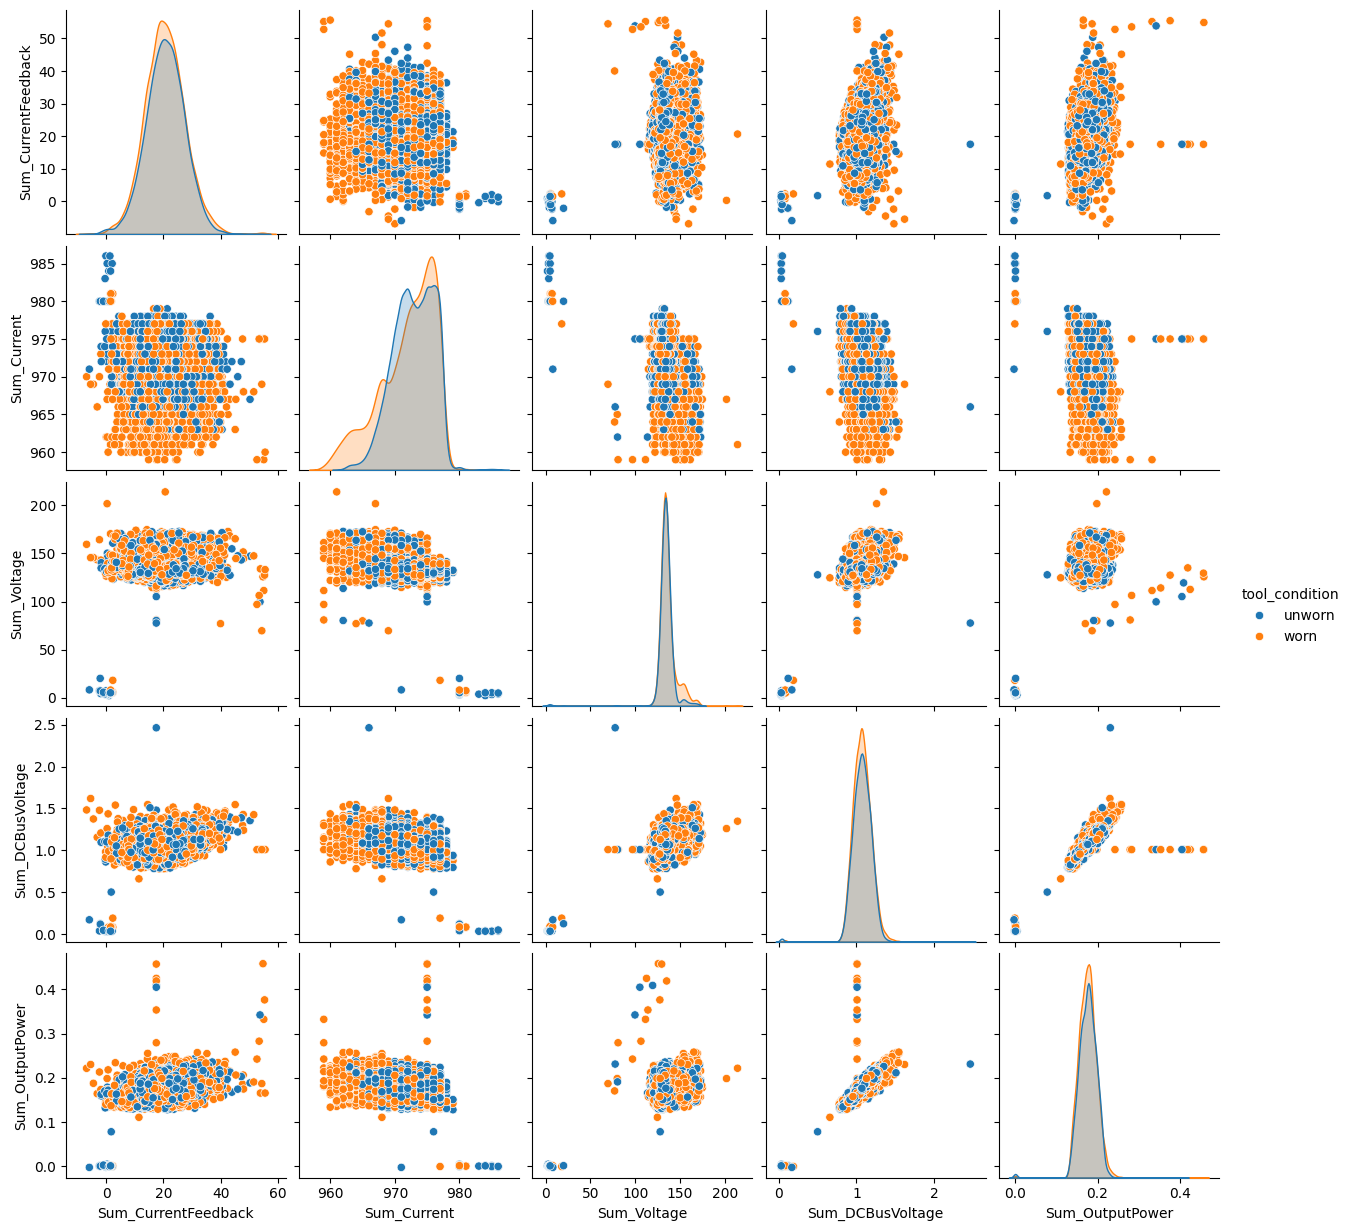

In [81]:
# create a pair plot for current feedback.
# using hue='tool_condition' allows the visualisation
# of the data points of the condition of the tool
# check the distribution of when the tool is on the product
print('Figure 29')

sns.pairplot(power_df, hue='tool_condition');



In [82]:
power_df.loc[power_df['tool_condition']=='worn'].describe()

Sum_CurrentFeedback  Sum_Current  Sum_Voltage  Sum_DCBusVoltage  \
count          5489.000000  5489.000000       5489.0       5489.000000   
mean             20.543319   971.857898   136.007069          1.070644   
std               7.042774     4.250003     10.12619          0.117780   
min              -6.869999   959.000000         4.92          0.078300   
25%              15.893001   969.000000   131.009995          0.992600   
50%              20.449000   973.000000   134.220001          1.066000   
75%              25.000000   975.000000   138.399994          1.144000   
max              55.580099   981.000000   214.100006          1.618000   

       Sum_OutputPower  
count      5489.000000  
mean          0.175849  
std           0.022975  
min          -0.000942  
25%           0.160761  
50%           0.175402  
75%           0.188843  
max           0.458301

In [83]:
power_df.loc[power_df['tool_condition']=='unworn'].describe()

Sum_CurrentFeedback  Sum_Current  Sum_Voltage  Sum_DCBusVoltage  \
count          4917.000000  4917.000000       4917.0       4917.000000   
mean             20.629607   972.832215   134.020933          1.067279   
std               6.697740     3.098025     10.49757          0.126233   
min              -5.907000   962.000000         2.13          0.029900   
25%              16.290000   971.000000   130.759995          0.992600   
50%              20.670001   973.000000   133.919998          1.069400   
75%              25.080000   975.000000   137.070007          1.146500   
max              53.800900   986.000000        173.0          2.462600   

       Sum_OutputPower  
count      4917.000000  
mean          0.175572  
std           0.022981  
min          -0.002948  
25%           0.161664  
50%           0.176349  
75%           0.190283  
max           0.409099

In [84]:
# The descriptive statistics above showed a slight difference in mean between output current of worn and unworn tool.
# Lets check if that difference is statistically significant.

# H0: The mean Sum_Current of an unworn tool = The mean Sum_Current of an worn tool
# H1: The mean Sum_Current of an unworn tool != The mean Sum_Current of an worn tool

Sum_Current_worn = train_df['Sum_Current'].loc[train_df['tool_condition']=='worn']
Sum_Current_unworn = train_df['Sum_Current'].loc[train_df['tool_condition']=='unworn']

hypothesis_test(Sum_Current_worn,Sum_Current_unworn)

Unable to reject the Null Hypothesis as p equals 2.0


Figure 30


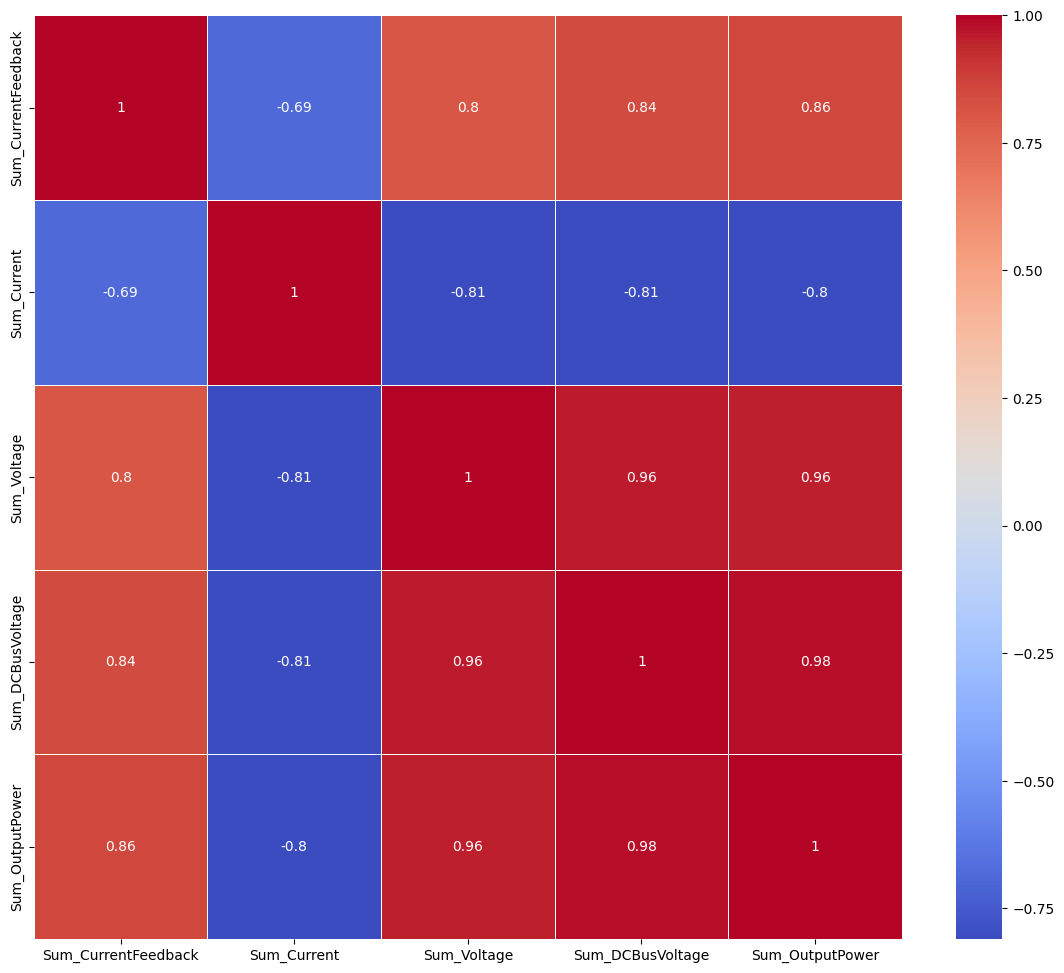

In [85]:
# check to the correlation between the features as Current, Volatge and Output Power
# will be related as to calculate Output Power, you multiply Voltage by Current (Rome, 2024).
print("Figure 30")
corr_df = train_df[['Sum_CurrentFeedback','Sum_Current','Sum_Voltage','Sum_DCBusVoltage','Sum_OutputPower']].corr()

plt.rcParams["figure.figsize"] = (14,12)
sns.heatmap(corr_df,annot=True,cmap="coolwarm",linewidths=0.5)
plt.show()

In [86]:
# get list of columns to compare
cols = ['Sum_CurrentFeedback','Sum_Voltage','Sum_DCBusVoltage','Sum_OutputPower']

#loop thorugh the list and conduct hypothesis test
for i in cols:
  # create new dfs and filter to column name
  worn = train_df[i].loc[train_df['tool_condition'] == 'worn']
  unworn = train_df[i].loc[train_df['tool_condition'] == 'unworn']
  #print the results
  print(f"H0: The mean {i} for worn tool = The mean {i} for unworn tool")
  print(f"H1: The mean {i} for worn tool != The mean {i} for unworn tool")
  print(" ")
  print(f"Test results for {i} :")
  hypothesis_test(worn,unworn)
  print("-----------------------------")

H0: The mean Sum_CurrentFeedback for worn tool = The mean Sum_CurrentFeedback for unworn tool
H1: The mean Sum_CurrentFeedback for worn tool != The mean Sum_CurrentFeedback for unworn tool
 
Test results for Sum_CurrentFeedback :
Reject the Null hypothesis as p equals 0.0
-----------------------------
H0: The mean Sum_Voltage for worn tool = The mean Sum_Voltage for unworn tool
H1: The mean Sum_Voltage for worn tool != The mean Sum_Voltage for unworn tool
 
Test results for Sum_Voltage :
Reject the Null hypothesis as p equals 0.0
-----------------------------
H0: The mean Sum_DCBusVoltage for worn tool = The mean Sum_DCBusVoltage for unworn tool
H1: The mean Sum_DCBusVoltage for worn tool != The mean Sum_DCBusVoltage for unworn tool
 
Test results for Sum_DCBusVoltage :
Reject the Null hypothesis as p equals 0.0
-----------------------------
H0: The mean Sum_OutputPower for worn tool = The mean Sum_OutputPower for unworn tool
H1: The mean Sum_OutputPower for worn tool != The mean Sum_O

In [87]:
# Review the statistics when the spindle was not on the product.
# This could prove that the actual positoning of the spindle is influenced
# by the tool condition.

# Create a Dataframe that focuses on when the tool is on the product
# and visualise to confirm the position.
print('Figure 31')

noprod_location_filter = (train_df['Z1_ActualPosition']>29.7)


location_3d(train_df.loc[noprod_location_filter])


Figure 31


In [88]:
#create new Dataframe to analyse
# test whether location of the spindle impacts the energy output.
output_columns = ['Sum_CurrentFeedback','Sum_Current','Sum_Voltage','Sum_DCBusVoltage','Sum_OutputPower']

nonprod_power_df = train_df[['Sum_CurrentFeedback','Sum_Current','Sum_Voltage','Sum_DCBusVoltage','Sum_OutputPower','tool_condition']].loc[noprod_location_filter]

# review the descriptive statistics and conduct hypothesis tests.
for i in output_columns:
  print("-----------------------------")
  print(f"H0: The mean {i} when the spindle is on product = The mean {i} when the spindle is away from product")
  print(f"H1: The mean {i} when the spindle is on product != The mean {i} when the spindle is away from product")
  print(" ")
  print(f"Test results for {i} :")
  hypothesis_test(power_df[i],nonprod_power_df[i])
  print("-----------------------------")

#print the descriptive statistics
print(" ")
print("Statistics on spindle away from the product:")
print(" ")
print(nonprod_power_df.describe())
print(" ")
print("Statistics on spindle on the product:")
print(power_df.describe())

-----------------------------
H0: The mean Sum_CurrentFeedback when the spindle is on product = The mean Sum_CurrentFeedback when the spindle is away from product
H1: The mean Sum_CurrentFeedback when the spindle is on product != The mean Sum_CurrentFeedback when the spindle is away from product
 
Test results for Sum_CurrentFeedback :
Reject the Null hypothesis as p equals 0.0
-----------------------------
-----------------------------
H0: The mean Sum_Current when the spindle is on product = The mean Sum_Current when the spindle is away from product
H1: The mean Sum_Current when the spindle is on product != The mean Sum_Current when the spindle is away from product
 
Test results for Sum_Current :
Unable to reject the Null Hypothesis as p equals 2.0
-----------------------------
-----------------------------
H0: The mean Sum_Voltage when the spindle is on product = The mean Sum_Voltage when the spindle is away from product
H1: The mean Sum_Voltage when the spindle is on product != Th

In [89]:
# The focus will be on testing whether the output is impacted by the condition when the spindle is
# away from the product
#filter new dataframes
worn_away_from_prod = nonprod_power_df.loc[nonprod_power_df['tool_condition']=='worn']
unworn_away_from_prod = nonprod_power_df.loc[nonprod_power_df['tool_condition']=='unworn']

#print the descriptive statistics

print(" ")
print("Statistics on spindle away from the product with worn tool:")
print(" ")
print(worn_away_from_prod.describe())
print(" ")
print("Statistics on spindle on the product with unworn tool:")
print(unworn_away_from_prod.describe())

 
Statistics on spindle away from the product with worn tool:
 
       Sum_CurrentFeedback  Sum_Current  Sum_Voltage  Sum_DCBusVoltage  \
count          2467.000000  2467.000000       2467.0      2.467000e+03   
mean              1.516584   982.146332      27.2212      2.111041e-01   
std               9.119476     6.330841    47.314465      3.565355e-01   
min             -30.691251   959.000000          0.0      8.330000e-19   
25%              -1.851000   980.000000         2.69      3.990000e-02   
50%              -0.486400   982.000000          4.4      6.960000e-02   
75%               1.218500   988.000000         9.25      9.065000e-02   
max              35.210399   991.000000        227.0      2.621300e+00   

       Sum_OutputPower  
count      2467.000000  
mean          0.026625  
std           0.062149  
min          -0.002958  
25%          -0.000002  
50%           0.000002  
75%           0.000045  
max           0.260974  
 
Statistics on spindle on the product with 

In [90]:
# test whether location of the spindle and the tool condition impacts the energy output.

# review the descriptive statistics and conduct hypothesis tests.
for i in output_columns:
  print("-----------------------------")
  print(f"H0: The mean {i} when the tool is unworn and away from the product = The mean {i} when the tool is worn and away from the product")
  print(f"H1: The mean {i} when the tool is unworn and away from the product != The mean {i} when the tool is worn and away from the product")
  print(" ")
  print(f"Test results for {i} :")
  hypothesis_test(worn_away_from_prod[i],unworn_away_from_prod[i])
  print(" ")
  print("-----------------------------")



-----------------------------
H0: The mean Sum_CurrentFeedback when the tool is unworn and away from the product = The mean Sum_CurrentFeedback when the tool is worn and away from the product
H1: The mean Sum_CurrentFeedback when the tool is unworn and away from the product != The mean Sum_CurrentFeedback when the tool is worn and away from the product
 
Test results for Sum_CurrentFeedback :
Reject the Null hypothesis as p equals 0.0
 
-----------------------------
-----------------------------
H0: The mean Sum_Current when the tool is unworn and away from the product = The mean Sum_Current when the tool is worn and away from the product
H1: The mean Sum_Current when the tool is unworn and away from the product != The mean Sum_Current when the tool is worn and away from the product
 
Test results for Sum_Current :
Unable to reject the Null Hypothesis as p equals 2.0
 
-----------------------------
-----------------------------
H0: The mean Sum_Voltage when the tool is unworn and away 

In [91]:
# review statistics on the tool on the spindle for each tool condition
worn_on_prod = power_df.loc[power_df['tool_condition']=='worn']
unworn_on_prod = power_df.loc[power_df['tool_condition']=='unworn']

print(" ")
print("Statistics on spindle when on the product with worn tool:")
print(" ")
print(worn_on_prod.describe())
print(" ")
print("Statistics on spindle when on the product with unworn tool:")
print(unworn_on_prod.describe())

 
Statistics on spindle when on the product with worn tool:
 
       Sum_CurrentFeedback  Sum_Current  Sum_Voltage  Sum_DCBusVoltage  \
count          5489.000000  5489.000000       5489.0       5489.000000   
mean             20.543319   971.857898   136.007069          1.070644   
std               7.042774     4.250003     10.12619          0.117780   
min              -6.869999   959.000000         4.92          0.078300   
25%              15.893001   969.000000   131.009995          0.992600   
50%              20.449000   973.000000   134.220001          1.066000   
75%              25.000000   975.000000   138.399994          1.144000   
max              55.580099   981.000000   214.100006          1.618000   

       Sum_OutputPower  
count      5489.000000  
mean          0.175849  
std           0.022975  
min          -0.000942  
25%           0.160761  
50%           0.175402  
75%           0.188843  
max           0.458301  
 
Statistics on spindle when on the product wi

In [92]:
# conduct hypothesis tests.
for i in output_columns:
  print("-----------------------------")
  print(f"H0: The mean {i} when the tool is unworn and on the product = The mean {i} when the tool is worn and on the product")
  print(f"H1: The mean {i} when the tool is unworn and on the product != The mean {i} when the tool is worn and on the product")
  print(" ")
  print(f"Test results for {i} :")
  hypothesis_test(worn_on_prod[i],unworn_on_prod[i])
  print(" ")
  print("-----------------------------")

-----------------------------
H0: The mean Sum_CurrentFeedback when the tool is unworn and on the product = The mean Sum_CurrentFeedback when the tool is worn and on the product
H1: The mean Sum_CurrentFeedback when the tool is unworn and on the product != The mean Sum_CurrentFeedback when the tool is worn and on the product
 
Test results for Sum_CurrentFeedback :
Unable to reject the Null Hypothesis as p equals 2.0
 
-----------------------------
-----------------------------
H0: The mean Sum_Current when the tool is unworn and on the product = The mean Sum_Current when the tool is worn and on the product
H1: The mean Sum_Current when the tool is unworn and on the product != The mean Sum_Current when the tool is worn and on the product
 
Test results for Sum_Current :
Unable to reject the Null Hypothesis as p equals 2.0
 
-----------------------------
-----------------------------
H0: The mean Sum_Voltage when the tool is unworn and on the product = The mean Sum_Voltage when the tool

In [93]:
# conduct one-way ANOVA test to see if the means of each group are different.
cols = ['Sum_CurrentFeedback','Sum_Current','Sum_Voltage','Sum_DCBusVoltage','Sum_OutputPower']
for i in cols:
  p_value = st.f_oneway(worn_on_prod[i],unworn_on_prod[i],worn_away_from_prod[i],unworn_away_from_prod[i])
  print("-------------------------")
  print(f"Results for {i}:")
  print(f"p value: {p_value[1]}")

-------------------------
Results for Sum_CurrentFeedback:
p value: 0.0
-------------------------
Results for Sum_Current:
p value: 0.0
-------------------------
Results for Sum_Voltage:
p value: 0.0
-------------------------
Results for Sum_DCBusVoltage:
p value: 0.0
-------------------------
Results for Sum_OutputPower:
p value: 0.0


**Observation**

---

1. Figure 29 shows that the machines energy output is impacted by the tool condition as it shows larger groups of data within the larger value outputs.
2. Conversely, the hypothesis test also supports this except for Sum_Current as the Null Hypthesis was unable to be rejected, suggesting there is no impact on the Sum_Current from the condition of the tool. Yet, it's descriptive statistics shows a lower mean value and a higher standard deviation for the 'worn' tool, suggesting the Sum_Current fluctuates more than the Sum_current of an unworn tool. This is logical as these 'spikes' maybe occurring when the worn tool is cutting the product as when a worn tool is doing so, it requires more force, which requires more electrical current to power that force (Jamshidi, et al., 2022).
4. There are signs are features that are correlated with each other which could lead to a multicollinearity problem, which means means the independent varibales influence on the dependent variable is distorted leading to innaccurate perforamnce measures (Datatab, 2024). However, this problem generally lies within regression models (Sundus, et al., 2022), and has been found to have very little impact of Classification models, in particular Logistic Regression (Lieberman & Morris, 2014). Therefore, the features will remain in the model when it comes to cross validation, but this doesn't mean that all will be included in the final model as features that add little value to the model will be removed.
5. From the analysis, it is also clear that the position of the tool impacts the energy output of the machine, which makes sense as it's output increases when the spindle is cutting the product from when it is just moving.
6. The tool condition also influences all the energy output features, except Sum_Current, when the spindle was away from the product. This was because the means of these features were seen, on average to increase and the difference showed to be statistically significant. This further supports that the spindle position will be a key feature to help predict whether the tool is worn or not and therefore be used in the model.
7. The ANOVA test confirms that when the position and condition of the tool influence the energy output of the machine when it testest these sub-samples.


However, having all the axis positions into the model could lead to overfitting due to a high number of input features. Therefore, a new feature must be created to reduce the probability of this occurring, while maintaining as much feature information as possible. To achieve this, Principle Component Analysis (PCA) will used to create a new single feature out of the X, Y, Z and spindle positions. To put simply, PCA will identify related positional features and capture the Principle Components that have the maximum variance, as this retains the most information about the features (Géron[e], 2023).

**Next step**


---

Create new positional feature using PCA.

Figure 32


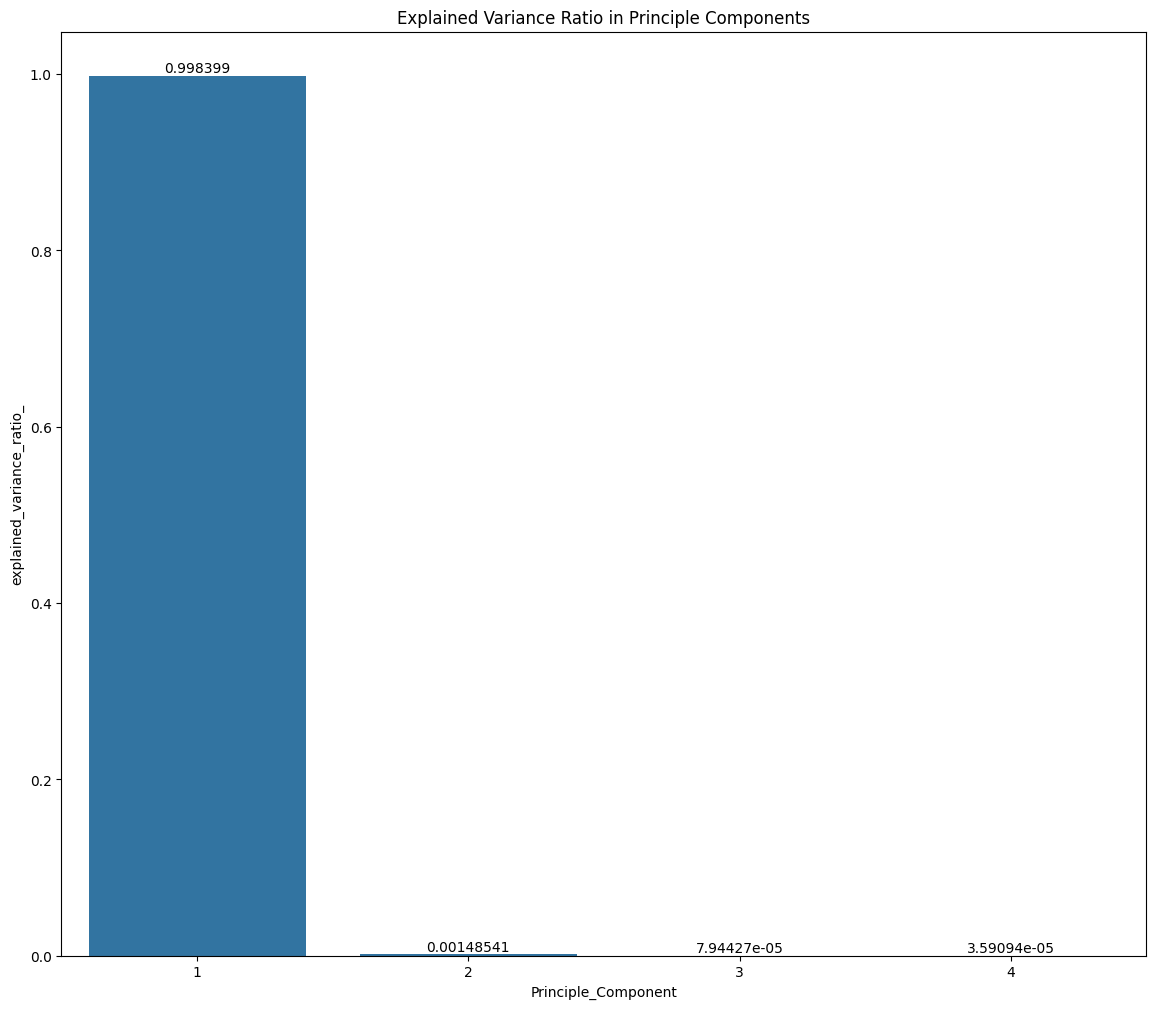

<Figure size 500x500 with 0 Axes>

In [94]:
# first set t0 4 (the number of features) to see how much variance each component explains the variance in the data.
print("Figure 32")
pca = PCA(n_components=4)

principle_component = pca.fit_transform(train_df[['X1_ActualPosition','Y1_ActualPosition','Z1_ActualPosition','S1_ActualPosition']])

# Create Dataframe
pca_df = pd.DataFrame()

# add data to Dataframe
pca_df['Principle_Component'] = range(1,5)
pca_df['explained_variance_ratio_'] = pca.explained_variance_ratio_

# The pca.explained_variance_ratio_ provides great information in which principle
# component provides the most variance (Géron[e], 2023).

pca_bar = sns.barplot(data = pca_df, x= 'Principle_Component', y='explained_variance_ratio_');

# add data labels
for container in pca_bar.containers:
  pca_bar.bar_label(container,label_type='edge');

plt.title("Explained Variance Ratio in Principle Components");
plt.figure(figsize=(5, 5));

In [95]:
# Based on the above results (Figure 32), the first principle component explains 99.8% of the variance while
# the rest are tiny in comparison which means they have little impact explaining the variance in the data.
# Therefore n_components will be set to 1 and added to the train_df

pca = PCA(n_components=1)

principle_component = pca.fit_transform(train_df[['X1_ActualPosition','Y1_ActualPosition','Z1_ActualPosition','S1_ActualPosition']])

train_df['Pos_PCA'] = principle_component

In [96]:
# apply the same conditions to other data splits using pca.transform() so that it transforms the data
# the same way as the training data

X_validate['Pos_PCA'] = pca.transform(X_validate[['X1_ActualPosition','Y1_ActualPosition','Z1_ActualPosition','S1_ActualPosition']])
X_test['Pos_PCA'] = pca.transform(X_test[['X1_ActualPosition','Y1_ActualPosition','Z1_ActualPosition','S1_ActualPosition']])



## 5.3 Does the tool's condition impact it's performance?

Figure 33


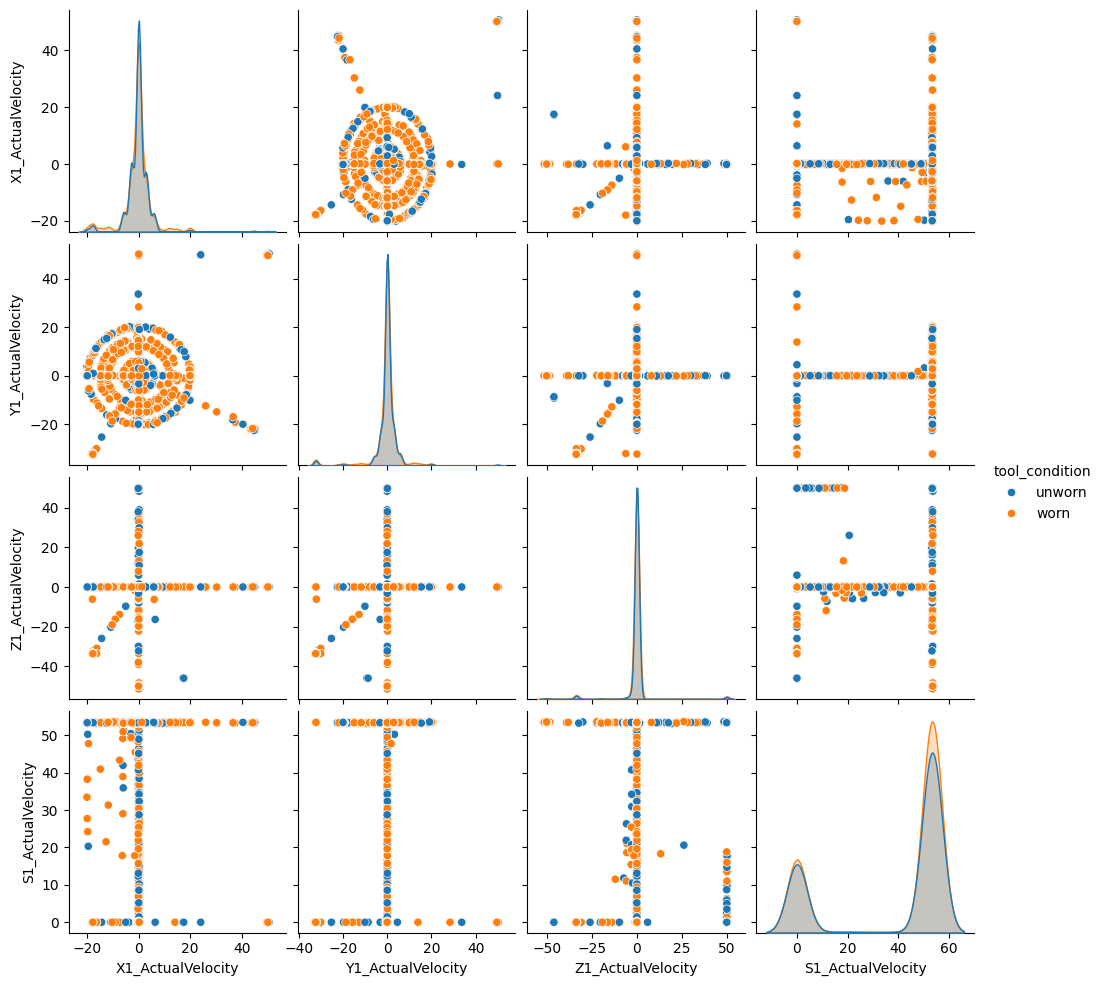

In [97]:
print('Figure 33')
velocity_df = train_df[['X1_ActualVelocity','Y1_ActualVelocity','Z1_ActualVelocity','S1_ActualVelocity','tool_condition']]
sns.pairplot(velocity_df, hue='tool_condition');

In [98]:
# compare summary statistics
print("Worn tool:")
print(velocity_df.loc[velocity_df['tool_condition']=='worn'].describe())
print("Unworn tool:")
print(velocity_df.loc[velocity_df['tool_condition']=='unworn'].describe())

Worn tool:
       X1_ActualVelocity  Y1_ActualVelocity  Z1_ActualVelocity  \
count             7956.0             7956.0             7956.0   
mean            -0.28522          -0.493361          -0.383688   
std             6.264908           6.408614           7.959865   
min           -20.299999         -32.799999              -51.5   
25%                -2.15             -0.075             -0.025   
50%                  0.0                0.0                0.0   
75%                 0.25                0.1                0.0   
max            50.299999          50.299999          50.400002   

       S1_ActualVelocity  
count             7956.0  
mean           39.404747  
std            23.238691  
min               -0.069  
25%               0.0035  
50%            53.299999  
75%            53.400002  
max            53.799999  
Unworn tool:
       X1_ActualVelocity  Y1_ActualVelocity  Z1_ActualVelocity  \
count             7215.0             7215.0             7215.0   
mean  

In [99]:
# review the descriptive statistics and conduct hypothesis tests.
worn = velocity_df.loc[velocity_df['tool_condition']=='worn']
unworn = velocity_df.loc[velocity_df['tool_condition']=='unworn']

for i in velocity_df.select_dtypes("float").columns:
  print(f"H0: The mean {i} of unworn tool = The mean {i} of worn tool")
  print(f"H1: The mean {i} of unworn tool!= The mean {i} of worn tool")
  print(" ")
  print(f"Test results for {i} :")
  hypothesis_test(unworn[i],worn[i])
  print(" ")

H0: The mean X1_ActualVelocity of unworn tool = The mean X1_ActualVelocity of worn tool
H1: The mean X1_ActualVelocity of unworn tool!= The mean X1_ActualVelocity of worn tool
 
Test results for X1_ActualVelocity :
Reject the Null hypothesis as p equals 0.0
 
H0: The mean Y1_ActualVelocity of unworn tool = The mean Y1_ActualVelocity of worn tool
H1: The mean Y1_ActualVelocity of unworn tool!= The mean Y1_ActualVelocity of worn tool
 
Test results for Y1_ActualVelocity :
Reject the Null hypothesis as p equals 0.0
 
H0: The mean Z1_ActualVelocity of unworn tool = The mean Z1_ActualVelocity of worn tool
H1: The mean Z1_ActualVelocity of unworn tool!= The mean Z1_ActualVelocity of worn tool
 
Test results for Z1_ActualVelocity :
Reject the Null hypothesis as p equals 0.0
 
H0: The mean S1_ActualVelocity of unworn tool = The mean S1_ActualVelocity of worn tool
H1: The mean S1_ActualVelocity of unworn tool!= The mean S1_ActualVelocity of worn tool
 
Test results for S1_ActualVelocity :
Unabl

In [100]:
# Lets now focus on when the tool is on the product and analyse what influence the
# tool condition has.
velocity_df = train_df[['X1_ActualVelocity','Y1_ActualVelocity','Z1_ActualVelocity','S1_ActualVelocity','tool_condition','Z1_ActualPosition']]
worn_prod_location_filter = (velocity_df['Z1_ActualPosition']>=27.5) & (velocity_df['Z1_ActualPosition']<=29.7)& (velocity_df['tool_condition']=='worn')
unworn_prod_location_filter = (velocity_df['Z1_ActualPosition']>=27.5) & (velocity_df['Z1_ActualPosition']<=29.7)& (velocity_df['tool_condition']=='unworn')

# compare summary statistics
print("Worn tool:")
print(velocity_df.loc[worn_prod_location_filter].describe())
print("Unworn tool:")
print(velocity_df.loc[unworn_prod_location_filter].describe())

Worn tool:
       X1_ActualVelocity  Y1_ActualVelocity  Z1_ActualVelocity  \
count             5489.0             5489.0             5489.0   
mean           -0.261843           0.137491           -0.01228   
std             5.777766           4.638996           0.731578   
min           -20.299999         -32.299999              -20.1   
25%                 -2.9               -0.7             -0.025   
50%                -0.05                0.0                0.0   
75%                  2.8               1.52                0.0   
max                 45.0               20.6               26.0   

       S1_ActualVelocity  Z1_ActualPosition  
count             5489.0             5489.0  
mean            53.24622          28.725525  
std             1.480567           0.813338  
min            17.799999          27.700001  
25%            53.299999          27.700001  
50%            53.299999          28.700001  
75%            53.400002          29.700001  
max            53.799999  

In [101]:
# conduct hypothesis tests.
cols = ['X1_ActualVelocity','Y1_ActualVelocity','Z1_ActualVelocity','S1_ActualVelocity']
for i in cols:
  print("-----------------------------")
  print(f"H0: The mean {i} when the tool is unworn and on the product = The mean {i} when the tool is worn and on the product")
  print(f"H1: The mean {i} when the tool is unworn and on the product != The mean {i} when the tool is worn and on the product")
  print(" ")
  print(f"Test results for {i} :")
  hypothesis_test(velocity_df[i].loc[unworn_prod_location_filter],velocity_df[i].loc[worn_prod_location_filter])
  print(" ")
  print("-----------------------------")

-----------------------------
H0: The mean X1_ActualVelocity when the tool is unworn and on the product = The mean X1_ActualVelocity when the tool is worn and on the product
H1: The mean X1_ActualVelocity when the tool is unworn and on the product != The mean X1_ActualVelocity when the tool is worn and on the product
 
Test results for X1_ActualVelocity :
Reject the Null hypothesis as p equals 0.0
 
-----------------------------
-----------------------------
H0: The mean Y1_ActualVelocity when the tool is unworn and on the product = The mean Y1_ActualVelocity when the tool is worn and on the product
H1: The mean Y1_ActualVelocity when the tool is unworn and on the product != The mean Y1_ActualVelocity when the tool is worn and on the product
 
Test results for Y1_ActualVelocity :
Reject the Null hypothesis as p equals 0.0
 
-----------------------------
-----------------------------
H0: The mean Z1_ActualVelocity when the tool is unworn and on the product = The mean Z1_ActualVelocity w

**Observation**

---

1. Figure 5.8 shows that X and Y  Actual Velocity are the only two features that are impacted by the condition of the tool due to the grouping of data in the more extreme areas.
2. The hypothesis test confirms that X, Y and Z are all influenced by the condition of the tool where these axis average values saw increases when the tool condition was worn.
3. The spindle did not show sufficient evidence that it is impacted by the tool's condition.
4. When the spindle was on the product, the hypothesis tests concluded that the condition impacts the axis Velocity in which saw their means decrease. This means that when the tool is cutting and is classed as 'worn' the performance is expected to decrease relative to that of an unworn tool. Furthermore, it provides further evidence of the position of the axis will have in the final model and it clearly influences the data.

**Next Step**

---


Complete the same analysis for Actual Acceleration.

Figure 33


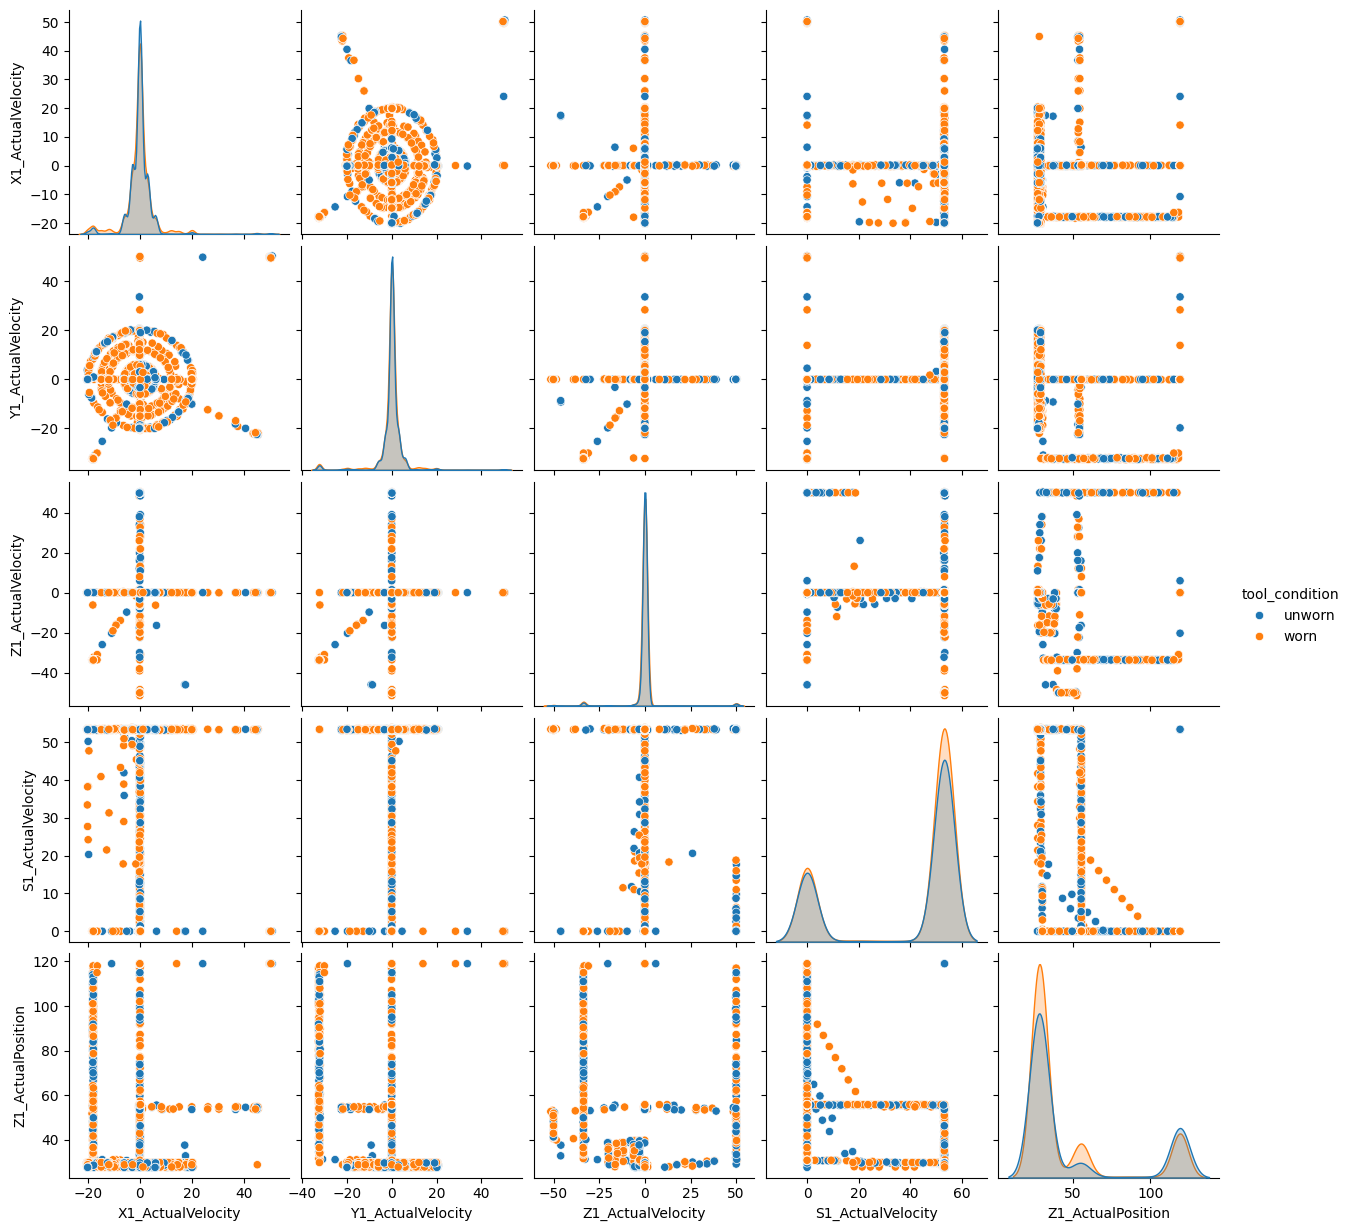

In [102]:
print('Figure 33')
Acceleration_df = train_df[['X1_ActualAcceleration','Y1_ActualAcceleration','Z1_ActualAcceleration','S1_ActualAcceleration','tool_condition']].loc[prod_location_filter]
sns.pairplot(velocity_df, hue='tool_condition');

In [103]:
# compare summary statistics
print("Worn tool:")
print(Acceleration_df.loc[Acceleration_df['tool_condition']=='worn'].describe())
print("Unworn tool:")
print(Acceleration_df.loc[Acceleration_df['tool_condition']=='unworn'].describe())

Worn tool:
       X1_ActualAcceleration  Y1_ActualAcceleration  Z1_ActualAcceleration  \
count                 5489.0                 5489.0                 5489.0   
mean                1.938932               3.437183               1.075615   
std               111.698273             112.455139              35.800293   
min                  -1210.0                -1260.0                 -388.0   
25%                    -37.5                  -25.0                  -6.25   
50%                      0.0                    0.0                    0.0   
75%                43.799999                   25.0                   6.25   
max                   1440.0                 1460.0                 1130.0   

       S1_ActualAcceleration  
count                 5489.0  
mean                0.324596  
std                37.858212  
min                   -137.0  
25%                    -26.1  
50%                   -0.687  
75%                28.799999  
max                    133.0  
Unworn 

In [104]:
# review the descriptive statistics and conduct hypothesis tests.
worn = Acceleration_df.loc[Acceleration_df['tool_condition']=='worn']
unworn = Acceleration_df.loc[Acceleration_df['tool_condition']=='unworn']

for i in Acceleration_df.select_dtypes("float").columns:
  print(f"H0: The mean {i} of a worn tool = The mean {i} of an unworn tool")
  print(f"H1: The mean {i} of a worn tool != The mean {i} of an unworn tool")
  print(" ")
  print(f"Test results for {i} :")
  hypothesis_test(worn[i],unworn[i])
  print(" ")

H0: The mean X1_ActualAcceleration of a worn tool = The mean X1_ActualAcceleration of an unworn tool
H1: The mean X1_ActualAcceleration of a worn tool != The mean X1_ActualAcceleration of an unworn tool
 
Test results for X1_ActualAcceleration :
Reject the Null hypothesis as p equals 0.0
 
H0: The mean Y1_ActualAcceleration of a worn tool = The mean Y1_ActualAcceleration of an unworn tool
H1: The mean Y1_ActualAcceleration of a worn tool != The mean Y1_ActualAcceleration of an unworn tool
 
Test results for Y1_ActualAcceleration :
Reject the Null hypothesis as p equals 0.0
 
H0: The mean Z1_ActualAcceleration of a worn tool = The mean Z1_ActualAcceleration of an unworn tool
H1: The mean Z1_ActualAcceleration of a worn tool != The mean Z1_ActualAcceleration of an unworn tool
 
Test results for Z1_ActualAcceleration :
Unable to reject the Null Hypothesis as p equals 1.8321540280438011
 
H0: The mean S1_ActualAcceleration of a worn tool = The mean S1_ActualAcceleration of an unworn tool
H

In [105]:
# Lets now focus on when the tool is on the product and analyse what influence the
# tool condition has.
acc_df = train_df[['X1_ActualAcceleration','Y1_ActualAcceleration','Z1_ActualAcceleration','S1_ActualAcceleration','tool_condition','Z1_ActualPosition']]
worn_prod_location_filter = (acc_df['Z1_ActualPosition']>=27.5) & (acc_df['Z1_ActualPosition']<=29.7) & (acc_df['tool_condition']=='worn')
unworn_prod_location_filter = (acc_df['Z1_ActualPosition']>=27.5) & (acc_df['Z1_ActualPosition']<=29.7)& (acc_df['tool_condition']=='unworn')

# compare summary statistics
print("Worn tool:")
print(acc_df.loc[worn_prod_location_filter].describe())
print("Unworn tool:")
print(acc_df.loc[unworn_prod_location_filter].describe())

Worn tool:
       X1_ActualAcceleration  Y1_ActualAcceleration  Z1_ActualAcceleration  \
count                 5489.0                 5489.0                 5489.0   
mean                1.938932               3.437183               1.075615   
std               111.698273             112.455139              35.800293   
min                  -1210.0                -1260.0                 -388.0   
25%                    -37.5                  -25.0                  -6.25   
50%                      0.0                    0.0                    0.0   
75%                43.799999                   25.0                   6.25   
max                   1440.0                 1460.0                 1130.0   

       S1_ActualAcceleration  Z1_ActualPosition  
count                 5489.0             5489.0  
mean                0.324596          28.725525  
std                37.858212           0.813338  
min                   -137.0          27.700001  
25%                    -26.1        

In [106]:
# conduct hypothesis tests.
cols = ['X1_ActualAcceleration','Y1_ActualAcceleration','Z1_ActualAcceleration','S1_ActualAcceleration']
for i in cols:
  print("-----------------------------")
  print(f"H0: The mean {i} when the tool is unworn and on the product = The mean {i} when the tool is worn and on the product")
  print(f"H1: The mean {i} when the tool is unworn and on the product != The mean {i} when the tool is worn and on the product")
  print(" ")
  print(f"Test results for {i} :")
  hypothesis_test(acc_df[i].loc[unworn_prod_location_filter],acc_df[i].loc[worn_prod_location_filter])
  print(" ")
  print("-----------------------------")

-----------------------------
H0: The mean X1_ActualAcceleration when the tool is unworn and on the product = The mean X1_ActualAcceleration when the tool is worn and on the product
H1: The mean X1_ActualAcceleration when the tool is unworn and on the product != The mean X1_ActualAcceleration when the tool is worn and on the product
 
Test results for X1_ActualAcceleration :
Unable to reject the Null Hypothesis as p equals 2.0
 
-----------------------------
-----------------------------
H0: The mean Y1_ActualAcceleration when the tool is unworn and on the product = The mean Y1_ActualAcceleration when the tool is worn and on the product
H1: The mean Y1_ActualAcceleration when the tool is unworn and on the product != The mean Y1_ActualAcceleration when the tool is worn and on the product
 
Test results for Y1_ActualAcceleration :
Unable to reject the Null Hypothesis as p equals 2.0
 
-----------------------------
-----------------------------
H0: The mean Z1_ActualAcceleration when the 

**Observation**

---

1. Figure 5.9 shows similar results as figure 33 in that X and Y appear impacted by the condition of the tool, which the hypothesis test results confirm this, suggesting good features to put into the model.
2. The spindle and z-axis did not show sufficient evidence that they were impacted by the tool's condition.
3. When filtered to the product, the only axis that appeared to be impacted was the spindle which saw it's mean acceleration almost half when the condition of the tool was worn.


**Next Step**

---


Analyse the Lost Acceloration and Velocity features.

## 5.4 Does the tool's condition impact the machine's difference between actual and command Acceloration and Velocity?

Figure 34
X1_LostAcceleration    0.0
Y1_LostAcceleration    0.0
Z1_LostAcceleration    0.0
S1_LostAcceleration    0.0
dtype: Float32
X1_LostVelocity    0.0
Y1_LostVelocity    0.0
Z1_LostVelocity    0.0
S1_LostVelocity    0.0
dtype: Float32


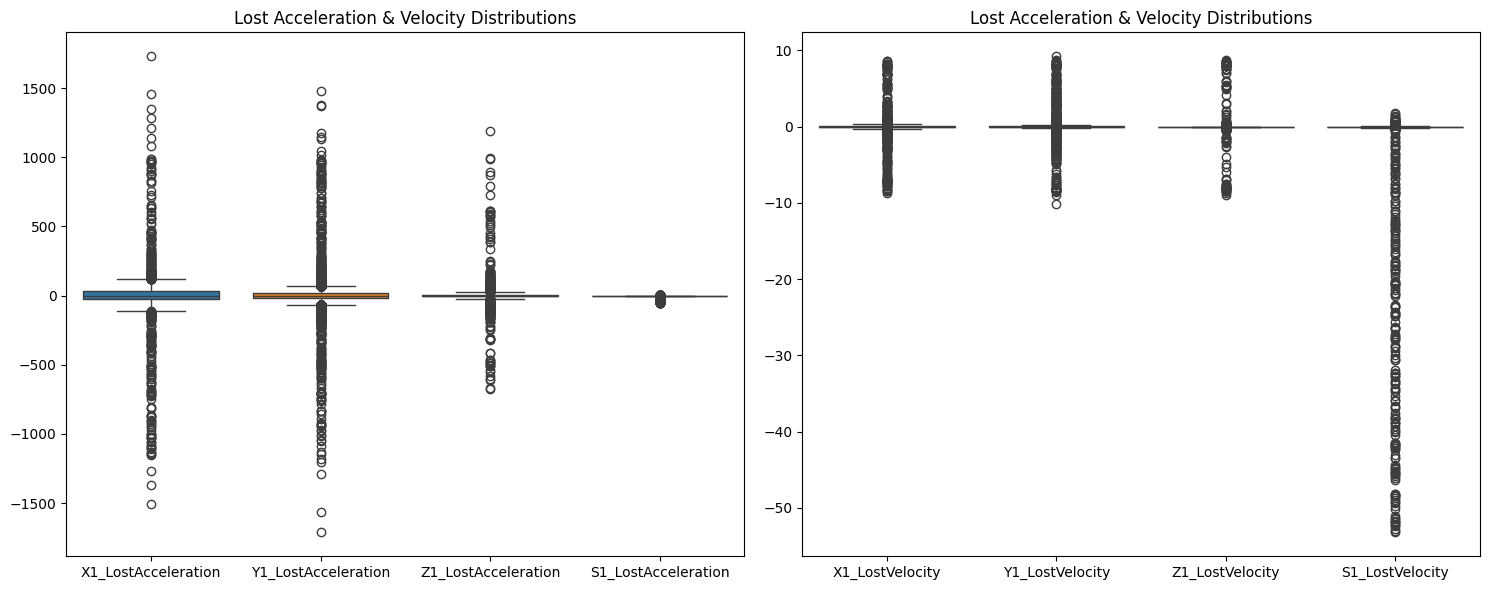

In [107]:
print('Figure 34')

#create new Dataframe to filterout the 'lost' columns
lostAcc_df = train_df[['X1_LostAcceleration',
                    'Y1_LostAcceleration',
                    'Z1_LostAcceleration',
                    'S1_LostAcceleration']]


lostVel_df = train_df[['X1_LostVelocity',
                    'Y1_LostVelocity',
                    'Z1_LostVelocity',
                    'S1_LostVelocity']]
#set the figure from matplotlib to enable the visuals to be shown side-by-side
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

# create boxplot
sns.boxplot(lostAcc_df,ax=ax1);
sns.boxplot(lostVel_df,ax=ax2);

#add title
ax1.set_title('Lost Acceleration & Velocity Distributions');
ax2.set_title('Lost Acceleration & Velocity Distributions');



#tidy up the charts
plt.tight_layout()

#print the median values
print(lostAcc_df.median())
print(lostVel_df.median())


In [108]:
# figure 34 suggests that the LostAcceleration columns are being skewed by
# zero values as each of the medians are set at 0. To get better value from this feature
# they will be turned into categorical columns where positive values = "Gained", Negative value = "Lost"
# and 0 values = "As Commanded"

# first create a custom function that will work the data
def create_categories(value):
  if value < 0: #if the command value is smaller than the actual value achieved, it produces a positive integer
    return "Gained"
  elif value > 0: #if the command value is greater than the actual value achieved, it produces a positive integer
    return "Lost"
  else:
    return "As Commanded"

# create a variable with the columns to loop through
Acceleration_cols = ['X1_LostAcceleration','Y1_LostAcceleration','Z1_LostAcceleration','S1_LostAcceleration']

# Use .apply() to apply the function to a given column in the dataset
for i in Acceleration_cols:
  col_name = i[:2] + '_Command_V_Actual_Acceleration'
  train_df[col_name] = train_df[i].apply(create_categories)



In [109]:
# do the same for Velocity columns

# create a variable with the columns to loop through
Velocity_cols = ['X1_LostVelocity','Y1_LostVelocity','Z1_LostVelocity','S1_LostVelocity']

# Use .apply() to apply the function to a given column in the dataset
for i in Velocity_cols:
  col_name = i[:2] + '_Command_V_Actual_Velocity'
  train_df[col_name] = train_df[i].apply(create_categories)

In [110]:
# create a function that can be re-used to output categorical data comparison
def bar_chart(x,y,z,s):
  #set the figure from matplotlib to enable the visuals to be shown side-by-side
  fig, ax1 = plt.subplots(2,2,figsize=(15,6))

  # add custom colours to clearly show the worn data as red
  # while using grey on unworn to emphasize the red.
  colors = {'worn':'red','unworn':'grey'}

  # create the bar graph variables, while using ax=ax[num,num] to place that bar chart is the subplot.
  # this means that ax[0,0] is the top left bar chart, ax[0.1] is the top right bar chart and so on.

  # get feature name to place into x= within graph
  for i in x.columns:
    # cut up the string values to get either Velocity or Acceloration
    Acc = i[len(i)-12:len(i)]
    vel = i[len(i)-8:len(i)]
    if Acc == 'Acceleration' or vel == 'Velocity':
      # create the x,y,z,s features to input into graphs
      x_feature = i
      y_feature = "Y"+i[1:]
      z_feature = "Z"+i[1:]
      s_feature = "S"+i[1:]

  # create the bar charts
  X1 = (sns.barplot(data=x,
                    x=x_feature,
                    y='count',
                    hue='tool_condition',
                    palette=colors,
                    errorbar=None,
                    ax=ax1[0,0]));

  Y1 = (sns.barplot(data=y,
                    x=y_feature,
                    y='count',
                    hue='tool_condition',
                    palette=colors,
                    errorbar=None,
                    ax=ax1[0,1]));

  Z1 = (sns.barplot(data=z,
                    x=z_feature,
                    y='count',
                    hue='tool_condition',
                    palette=colors,errorbar=None,
                    ax=ax1[1,0]));

  S1 = (sns.barplot(data=s,
                    x=s_feature,
                    y='count',
                    hue='tool_condition',
                    palette=colors,
                    errorbar=None,
                    ax=ax1[1,1]));

  #set the titles
  ax1[0,0].set_title("X1 Command Vs Actual");
  ax1[0,1].set_title("Y1 Command Vs Actual");
  ax1[1,0].set_title("Z1 Command Vs Actual");
  ax1[1,1].set_title("S1 Command Vs Actual");

  # add values into the charts
  bar_list = [X1,Y1,Z1,S1]

  # Loop thorugh all the bar charts then their containers to apply their respective data value
  # to the visual.
  for bar in bar_list:
    for container in bar.containers:
      bar.bar_label(container,label_type='center')

  # tidy up the chart layout
  plt.tight_layout()


Figure 35


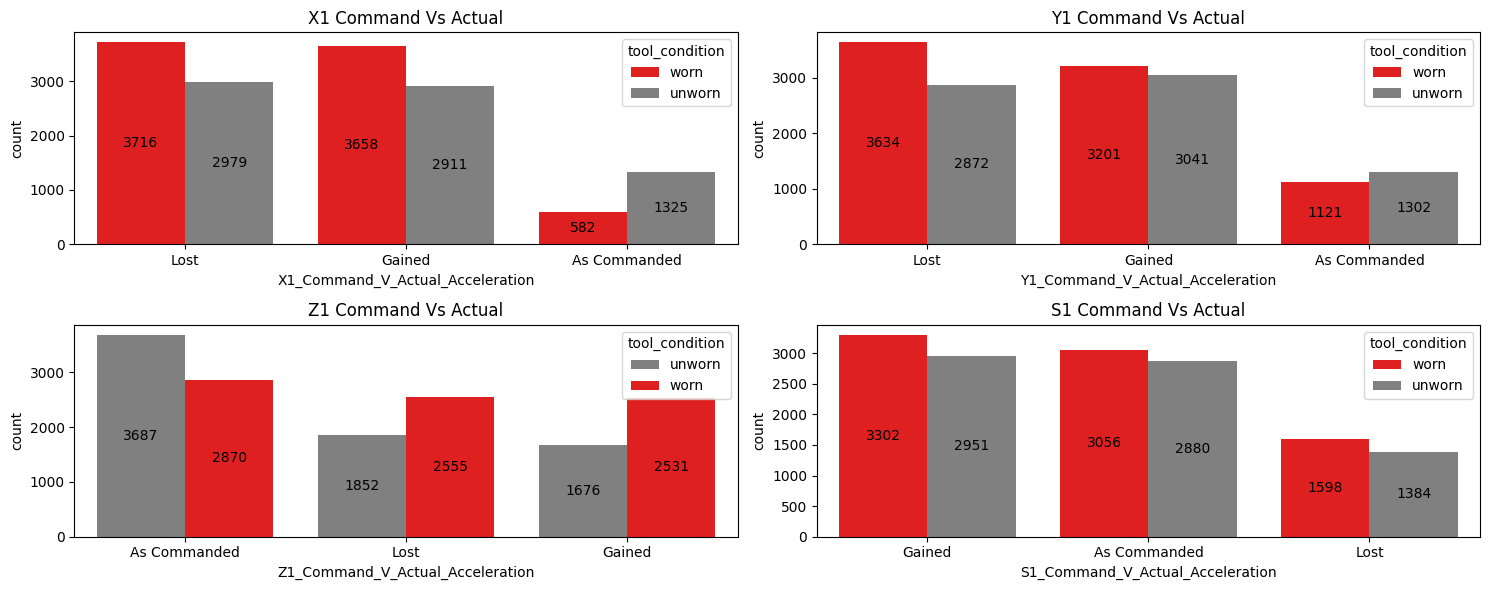

In [111]:
# create dataframes with their values counts to see the variation betweeb command and actual Acceleration
x_Acceleration = train_df[['X1_Command_V_Actual_Acceleration','tool_condition']].value_counts().reset_index()
y_Acceleration = train_df[['Y1_Command_V_Actual_Acceleration','tool_condition']].value_counts().reset_index()
z_Acceleration = train_df[['Z1_Command_V_Actual_Acceleration','tool_condition']].value_counts().reset_index()
s_Acceleration = train_df[['S1_Command_V_Actual_Acceleration','tool_condition']].value_counts().reset_index()

print("Figure 35")
# create visuals
bar_chart(x_Acceleration,y_Acceleration,z_Acceleration,s_Acceleration)

Figure 36


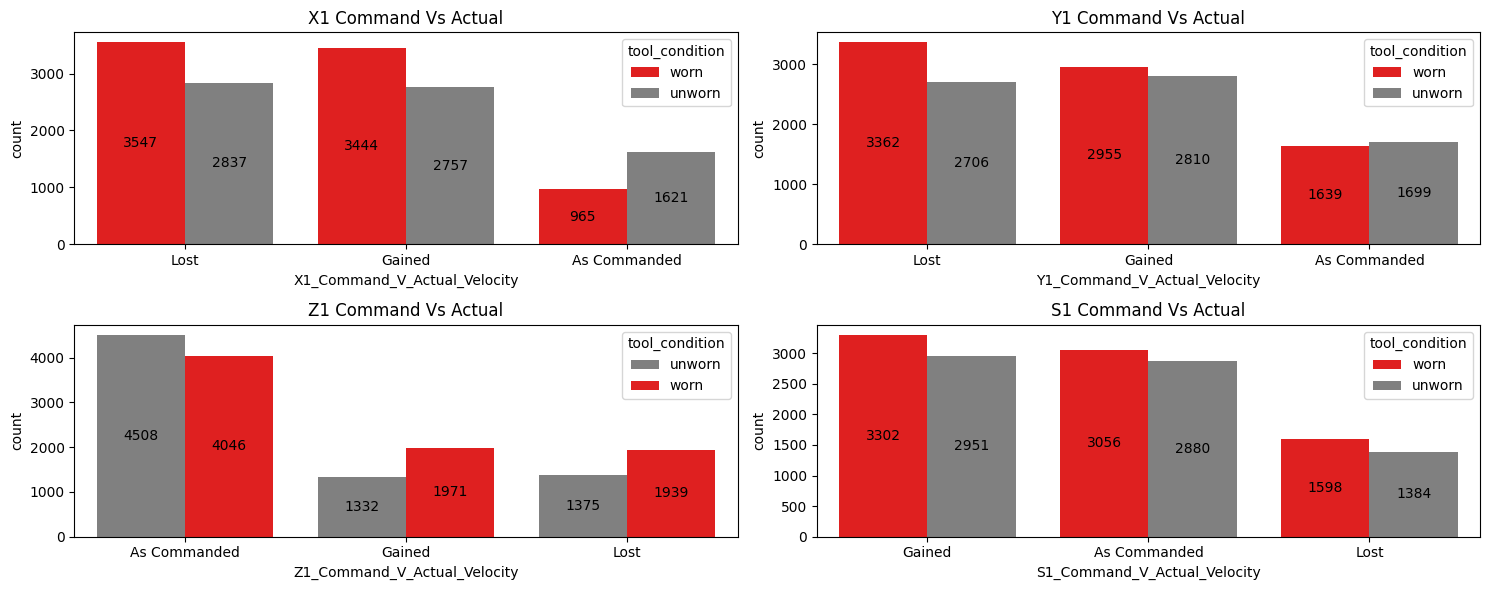

In [112]:
# create dataframes with their values counts to see the variation betweeb command and actual Acceleration
x_Velocity = train_df[['X1_Command_V_Actual_Velocity','tool_condition']].value_counts().reset_index()
y_Velocity = train_df[['Y1_Command_V_Actual_Velocity','tool_condition']].value_counts().reset_index()
z_Velocity = train_df[['Z1_Command_V_Actual_Velocity','tool_condition']].value_counts().reset_index()
s_Velocity = train_df[['S1_Command_V_Actual_Velocity','tool_condition']].value_counts().reset_index()

print("Figure 36")
# create the visuals
bar_chart(x_Velocity,y_Velocity,z_Velocity,s_Velocity)

**Observation**


---

1. Both X and Y axis for Acceloration and Velocity (Figure 35 & 36) display higher proportions of deviations from the command values when the tool was 'worn', suggesting that the condition of the tool does impact the performance of these two axis.
2. The results also suggest that when the tool is worn, both X and Y Axis actual output will deviate more from the commanded input from the Operator which will give good signals to the Machine Learning model to predict if the tool is worn or not.
3. Interestingly, the Z-axis displays little evidence that it is impacted by the condition of the tool. However, given that the Z-axis is the up and down movement of the CNC machine, the use of this axis is limited. Therefore, the results don't reflect the true impacts of tool condition as this axis is mostly idle within the dataset - refer to the Data Profiling section of this project to see the evdience of it being mostly idle in the dataset.
4. The spindle axis saw it's worn proportion a higher in all three categories, but, and very interestingly, saw 'Gained' as it's leader in the dataset for both Acceleration and Velocity. This suggests that the spindle's Velocity and Acceloration increase to a value greater than the inputted value when the tool is worn.

However, there are too many features to input into the model when the X, Y and S axis have been transformed using OneHotEncoder(). Therefore, all four axis will be combined into one and will be done for both Velocity and Acceleration.

In [113]:
# combine the axis lost outputs to create 2 distinct features.
# use sum() to sapture the total lost values as mean and medians will be influenced
# by the skewed values around 0.

train_df['Combined_LostAcceleration'] = train_df[['X1_LostAcceleration','Y1_LostAcceleration','Z1_LostAcceleration','S1_LostAcceleration']].sum(axis=1)
train_df['Combined_LostVelocity'] = train_df[['X1_LostVelocity','Y1_LostVelocity','Z1_LostVelocity','S1_LostVelocity']].sum(axis=1)

# do the same for other samples
X_test['Combined_LostAcceleration'] = X_test[['X1_LostAcceleration','Y1_LostAcceleration','Z1_LostAcceleration','S1_LostAcceleration']].sum(axis=1)
X_validate['Combined_LostAcceleration'] = X_validate[['X1_LostAcceleration','Y1_LostAcceleration','Z1_LostAcceleration','S1_LostAcceleration']].sum(axis=1)

X_test['Combined_LostVelocity'] = X_test[['X1_LostVelocity','Y1_LostVelocity','Z1_LostVelocity','S1_LostVelocity']].sum(axis=1)
X_validate['Combined_LostVelocity'] = X_validate[['X1_LostVelocity','Y1_LostVelocity','Z1_LostVelocity','S1_LostVelocity']].sum(axis=1)

In [114]:
# create the categories as done before
train_df['Combined_LostAcceleration'] = train_df['Combined_LostAcceleration'].apply(create_categories)
train_df['Combined_LostVelocity'] = train_df['Combined_LostVelocity'].apply(create_categories)

# do the same for other samples
X_test['Combined_LostAcceleration'] = X_test['Combined_LostAcceleration'].apply(create_categories)
X_validate['Combined_LostAcceleration'] = X_validate['Combined_LostAcceleration'].apply(create_categories)

X_test['Combined_LostVelocity'] = X_test['Combined_LostVelocity'].apply(create_categories)
X_validate['Combined_LostVelocity'] = X_validate['Combined_LostVelocity'].apply(create_categories)

In [115]:
# drop he previously made columns as they're now redundent.



train_df.drop(columns=['X1_Command_V_Actual_Velocity',
                        'Y1_Command_V_Actual_Velocity',
                        'Z1_Command_V_Actual_Velocity',
                        'S1_Command_V_Actual_Velocity',
                        'X1_Command_V_Actual_Acceleration',
                        'Y1_Command_V_Actual_Acceleration',
                        'Z1_Command_V_Actual_Acceleration',
                        'S1_Command_V_Actual_Acceleration',
                        'X1_LostVelocity',
                        'Y1_LostVelocity',
                        'Z1_LostVelocity',
                        'S1_LostVelocity',
                        'X1_LostAcceleration',
                        'Y1_LostAcceleration',
                        'Z1_LostAcceleration',
                        'S1_LostAcceleration'],
                inplace=True)

# Do the same for other DataFrames

#test set
X_test.drop(columns=['X1_LostVelocity',
                        'Y1_LostVelocity',
                        'Z1_LostVelocity',
                        'S1_LostVelocity',
                        'X1_LostAcceleration',
                        'Y1_LostAcceleration',
                        'Z1_LostAcceleration',
                        'S1_LostAcceleration'],
                inplace=True)

#validate set
X_validate.drop(columns=['X1_LostVelocity',
                        'Y1_LostVelocity',
                        'Z1_LostVelocity',
                        'S1_LostVelocity',
                        'X1_LostAcceleration',
                        'Y1_LostAcceleration',
                        'Z1_LostAcceleration',
                        'S1_LostAcceleration'],
                inplace=True)

## 5.5 Data Split - X_train from train_df.

In [116]:
# split out train_df into X_train and y_train
X_train = train_df.loc[:, train_df.columns != 'tool_condition']
y_train = train_df['tool_condition']

# drop the redundant columns as a new feature was created
X_validate.drop(columns=['X1_ActualPosition','Y1_ActualPosition','Z1_ActualPosition','S1_ActualPosition'], inplace=True)
X_test.drop(columns=['X1_ActualPosition','Y1_ActualPosition','Z1_ActualPosition','S1_ActualPosition'], inplace=True)
train_df.drop(columns=['X1_ActualPosition','Y1_ActualPosition','Z1_ActualPosition','S1_ActualPosition'], inplace=True)

## 5.6 EDA Conclusion

Within this section the following questions were explored:
1. What are the impacts to the machine's output energy parameters when using a 'Worn' tool?
2. Does the tool's condition impact it's performance?

Based on the analysis conducted, the machines performance and energy output displayed evidence that they were impacted by the condition of the tool, which suggests that these features provide good information for a Machine Learning model to use and make predictions.

Interestingly, an unexpected discovery was made in that the position of the spindle provided excellent information to help determine the impacts of the tool's condition, as when it was on situated on the product it showed stronger signs that the tool's condition was worn than when it was away from it.

Therefore, the original question "How can we predict manufacturing equipment tool wear using data analysis and Machine Learning Models?" can now be answered.

To predict manufacturing equipment tool wear, the concentration and analysis must be focussed on the machine's energy output, the machine's performance in terms of acceleration and velocity, and the postioning of the spindle as these features provide the ammunition for better understanding the impacts of a tool's condition, leading to a better performing Machine Learning model.



# **6. Model Preparation**

---

**Objectives:**
1. Transform the data to ensure it is ready to be inputted into the Machine Learning models

In [117]:
# to get the data ready for moedlling, the selected features that were identified to be influenced by tool conditon will be selected,
# while the remaining will be filtered out.

# the target variable will have it's own dataframe
# the below is a list of features that will be used in the model
# then the least contributing features will be removed later on in this project.

cols = ['Sum_Current',
        'Sum_Voltage',
        'Sum_OutputPower',
        'Pos_PCA',
        'Combined_LostAcceleration',
        'Combined_LostVelocity',
        'X1_ActualVelocity',
        'Y1_ActualVelocity',
        'Z1_ActualVelocity',
        'X1_ActualAcceleration',
        'Y1_ActualAcceleration']

# set the DataFrames to the selected columns
X_train = X_train[cols]
X_validate = X_validate[cols]
X_test = X_test[cols]

In [118]:
# transform the data ready for modelling, focussing on OneHotEncoder.
# This is used because of it's ability to convert string values into binary and will create
# seperate columns for each category. For example, the label will have 2 columns
# as there are two categories - worn and unworn. Within the worn column, the rows labelled 'worn'
# will be assigned a 1 and unworn a 0. The same is to be said about unworn column in that unworn rows will
# be labelled as 1 and worn as 0.

# assign each column their own OneHotEncoder as the categories get stored in this variable.
y_label_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
lost_vel_label_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
lost_acc_label_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')


# first do the features
vel_encoder = lost_vel_label_encoder.fit_transform(X_train['Combined_LostVelocity'].values.reshape(-1,1))
acc_encoder = lost_acc_label_encoder.fit_transform(X_train['Combined_LostAcceleration'].values.reshape(-1,1))

# transform the validate and test sets
X_validate_vel = lost_vel_label_encoder.transform(X_validate['Combined_LostVelocity'].values.reshape(-1,1))
X_validate_acc = lost_acc_label_encoder.fit_transform(X_validate['Combined_LostAcceleration'].values.reshape(-1,1))

X_test_vel = lost_vel_label_encoder.transform(X_test['Combined_LostVelocity'].values.reshape(-1,1))
X_test_acc = lost_acc_label_encoder.fit_transform(X_test['Combined_LostAcceleration'].values.reshape(-1,1))

#the encoders will create dataframes with a reset index, so these need to be preserved
original_index = X_train.index
X_validate_index = X_validate.index
X_test_index = X_test.index


#transofrm the labels
y_train = y_label_encoder.fit_transform(y_train.values.reshape(-1,1))

# Because the category information is stored, .transform() is used
# to transform the test and validate sets so that it transform the data in the same fashion
# as the train set.
y_test = y_label_encoder.transform(y_test.values.reshape(-1,1))
y_validate = y_label_encoder.transform(y_validate.values.reshape(-1,1))


In [119]:
#drop x0_unworn as this is not needed
y_train = y_train['x0_worn']
y_test = y_test['x0_worn']
y_validate = y_validate['x0_worn']

In [120]:
# drop the pre-encoded columns
X_train.drop(columns=['Combined_LostAcceleration','Combined_LostVelocity'], inplace=True)
X_validate.drop(columns=['Combined_LostAcceleration','Combined_LostVelocity'], inplace=True)
X_test.drop(columns=['Combined_LostAcceleration','Combined_LostVelocity'], inplace=True)

<ipython-input-120-c14c0645210a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-120-c14c0645210a>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [121]:
#reset the DataFrames Index to allow for joining the DataFrames back to original.
vel_encoder.index = original_index
acc_encoder.index = original_index
X_validate_vel.index = X_validate_index
X_validate_acc.index = X_validate_index
X_test_vel.index = X_test_index
X_test_acc.index = X_test_index

In [122]:
# Change names of the features
vel_encoder.rename(columns={'x0_Gained':'Gained_Velocity','x0_Lost':'Lost_Velocty'},inplace=True)
acc_encoder.rename(columns={'x0_Gained':'Gained_Acceleration','x0_Lost':'Lost_Acceleration'},inplace=True)
X_validate_vel.rename(columns={'x0_Gained':'Gained_Velocity','x0_Lost':'Lost_Velocty'},inplace=True)
X_validate_acc.rename(columns={'x0_Gained':'Gained_Acceleration','x0_Lost':'Lost_Acceleration'},inplace=True)
X_test_vel.rename(columns={'x0_Gained':'Gained_Velocity','x0_Lost':'Lost_Velocty'},inplace=True)
X_test_acc.rename(columns={'x0_Gained':'Gained_Acceleration','x0_Lost':'Lost_Acceleration'},inplace=True)

In [123]:

# join the features back to X_train
X_train = pd.concat([X_train,vel_encoder,acc_encoder],axis=1)
X_validate = pd.concat([X_validate,X_validate_vel,X_validate_acc],axis=1)
X_test = pd.concat([X_test,X_test_vel,X_test_acc],axis=1)

In [124]:
# Drop the x0_As Commanded as the other 2 columns will equal 0 when this is 1.
X_train.drop(columns='x0_As Commanded',inplace=True)
X_validate.drop(columns='x0_As Commanded',inplace=True)
X_test.drop(columns='x0_As Commanded',inplace=True)

In [125]:
# create a loop that will loop through the int/float values and apply
# QuantileTransformer() while storing the trasformed data in a dictionary
# QuantileTransformer is used due to the distributions of the highly skewed and
# uniformed datasets and it's ability to easily transforms these into normal distributions.

Sum_Current_t = QuantileTransformer(output_distribution='normal')
Sum_Voltage_t = QuantileTransformer(output_distribution='normal')
Sum_OutputPower_t = QuantileTransformer(output_distribution='normal')
Pos_PCA_t = QuantileTransformer(output_distribution='normal')
X1_ActualVelocity_t = QuantileTransformer(output_distribution='normal')
Y1_ActualVelocity_t = QuantileTransformer(output_distribution='normal')
Z1_ActualVelocity_t = QuantileTransformer(output_distribution='normal')
X1_ActualAcceleration_t = QuantileTransformer(output_distribution='normal')
Y1_ActualAcceleration_t = QuantileTransformer(output_distribution='normal')

transformers = {
    'Sum_Current': Sum_Current_t,
    'Sum_Voltage': Sum_Voltage_t,
    'Sum_OutputPower': Sum_OutputPower_t,
    'Pos_PCA': Pos_PCA_t,
    'X1_ActualVelocity': X1_ActualVelocity_t,
    'Y1_ActualVelocity': Y1_ActualVelocity_t,
    'Z1_ActualVelocity': Z1_ActualVelocity_t,
    'X1_ActualAcceleration': X1_ActualAcceleration_t,
    'Y1_ActualAcceleration': Y1_ActualAcceleration_t ,
}

#Apply the transformations
# col will be the variable that gets and stores the column name
# i is the transformer to apply to dataset
# Within the loop it will fit_transform the training data and then transform
# the validate and test data to the same scale as the training set.
for col, i in transformers.items():
  X_train[col] = i.fit_transform(X_train[col].values.reshape(-1,1))
  X_validate[col] = i.transform(X_validate[col].values.reshape(-1,1))
  X_test[col] = i.transform(X_test[col].values.reshape(-1,1))


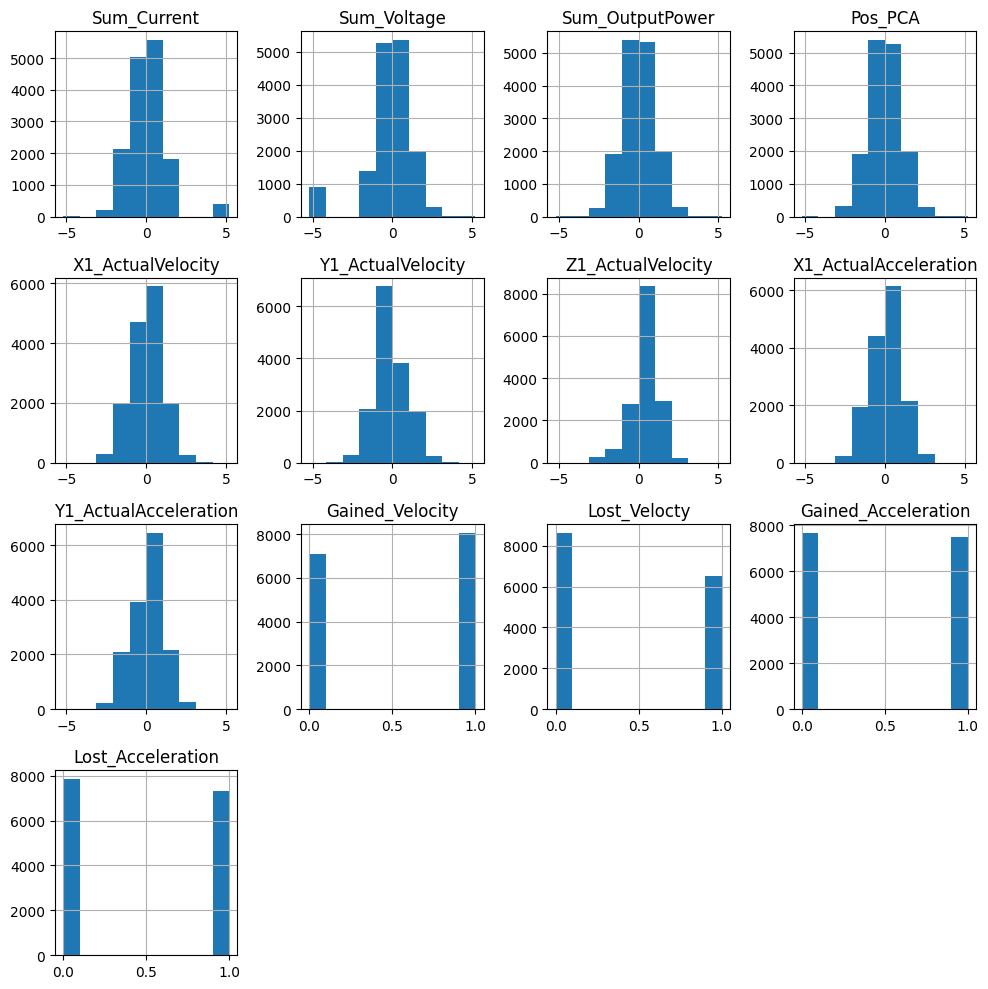

In [126]:
# prepare the features for modelling
X_train.hist(figsize=(10,10));

plt.tight_layout()

# **7. Modelling**

---



Objectives:
1. Compare 4 Classification models using Cross Validation
2. Select the top performing models, fine tune the parameters and compare again with Cross Validation. However, the Validation set will be introduced to the training set in this test.
3. select the best performing model based off the Cross Validation results
4. Using the test set, make predictions and evaluate the model.

##**7.1 Cross Validation and Model Selection**

---



Within the EDA phase of this project, it is clear that the dataset in this project has numerous complications which will cause simpler models, such a Logistic Regression, problems to correctly predict the tool conditions. Therefore, the following models will be tested:

1. **Support Vector Classification** - A popular classification model that aims at forming the most optimal decision boundary, known as hyperplane, which separates n-dimensional space into classess, making it easy to place a different point in the correct category (Bansal, Goyal & Choudhary, 2022). For example, in the X_train dataset there are 13 features and 1 target variable in the y_train. The model will form the most optimal decision boundary to separate these inputs into 2 classes which is the binary output of the target, then it uses this to make it's predictions. Therefore, his model has been chosen for this project because of it's ability to handle high-dimensional datasets (Bansal, Goyal & Choudhary, 2022).

2. **Hist Gradient Boosting Classifier (HGBC)** - This is an ensemble model which means that it uses the aggregation of multiple "weak learners" to output a better prediction (Géron[a], 2022). In the case of this model, each prediction is sequentially added while each one is trying to correct it's predecessor (Géron[b], 2022), making it often perform better than other 'single' models. Furthermore, HGBC is designed to optimally handle large datasets as it 'bins' the input features by changing them into integers (Géron[c], 2022). Because of this, this model is being considered for the final output model.  

3. **Random Forest Classifier** - Similar to HGBS in that this is another type of ensemble model that uses an ensemble of Decision Trees, but the difference is that these trees are trained by the bagging method - this is when the model takes random subsets of the data which can contain duplicates as it is taking the samples with replacement (Géron[d], 2022). The reason for choosing this model is due to to it's ability to predict with high accuracy on various types of datasets and is less likely to experience overfitting (IBM[b], 2024).

4. **Voting Classification Ensemble (contains Support Vector Classification, Hist Gradient Boosting Classifier and Random Forest Classifier)** - Voting Ensemble is a method used to group classification models together in which the prediction outcome is determined by voting by the models within the Voting Classifier (GeeksForGeeks, 2024). This means that for a classification problem, if the majority vote was 1, which for the CNC dataset is 'worn', the model's final output is 1. The reasoning for this choice is because if the performance of the first three models isn't at a desirable F1 score individually, combining them can create a better performing model.

Figure 37


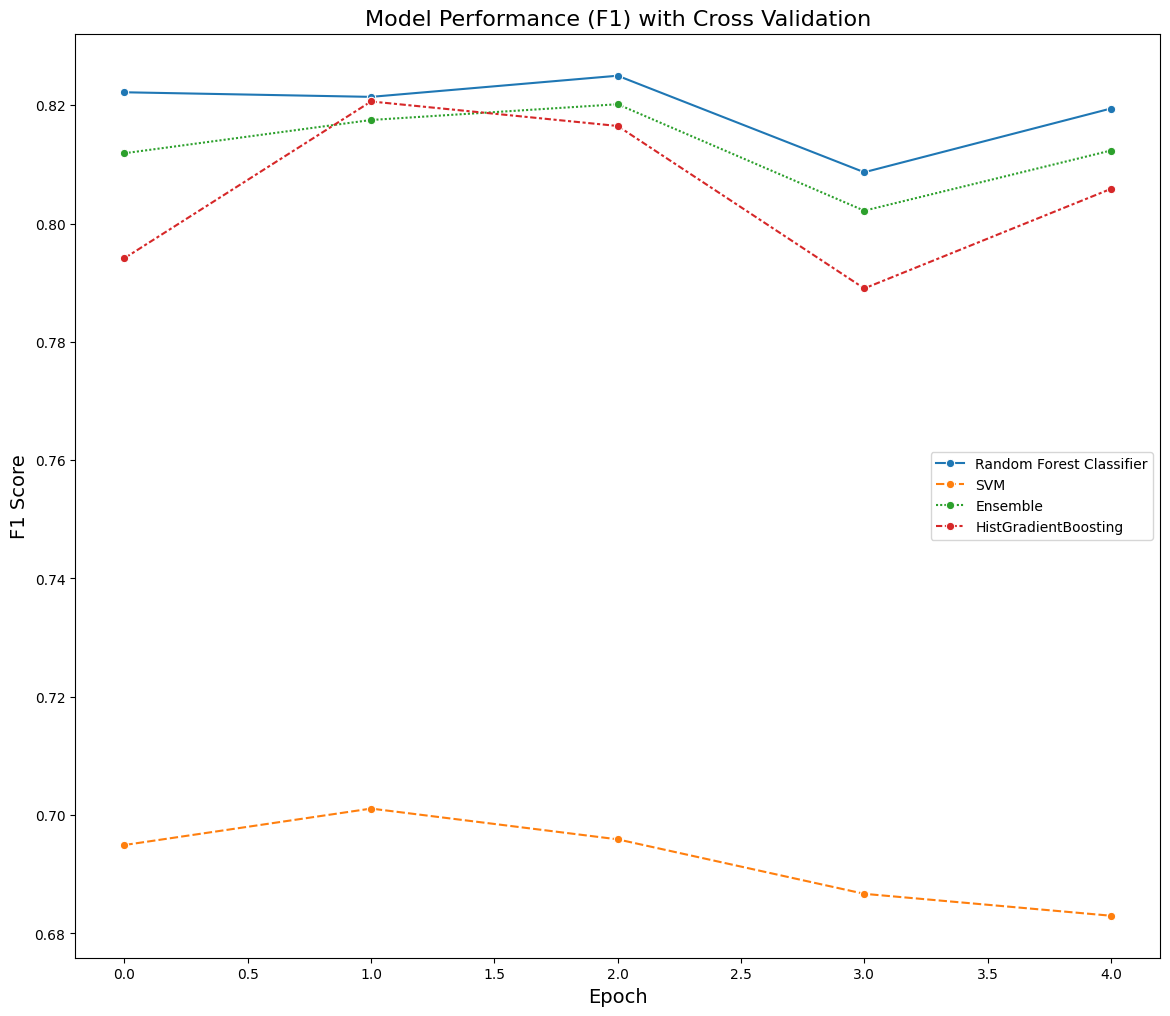

In [127]:
# cross validation - this is a test conducted on Machine Learning models to check if there are
# signs of overfitting (Scikit-Learn, 2024). The process involves splitting the training data into a select amount of subsets which the models
# will be trained and tested on. For example, if you set n_splits = 5 it means the data will be split in 5 subsets which 1 of them is the test set.
# The models are then fitted to each training set then tested on test set to get their scores. This is repeated 5 times, ensuring all subsets that
# were once training sets were are a test set once.
print("Figure 37")
# set up the models
clf_Hgbc = HistGradientBoostingClassifier(random_state=42)
clf_SVM = SVC(random_state=42,probability=True)
clf_rf = RandomForestClassifier(random_state=42)

#Place models into variable
grp_clf = [('Random Forest' , clf_rf), ('Support Vector Machine' , clf_SVM), ('Gradient Boosting' , clf_Hgbc)]

v_ensemble = VotingClassifier(grp_clf, voting='soft', weights=[2,1,1])


# create a dictionary of the models
models = {
        'Random Forest Classifier' : RandomForestClassifier(random_state=42),
        'SVM' : SVC(random_state=42,probability=True),
        'Ensemble' : v_ensemble,
        'HistGradientBoosting' : HistGradientBoostingClassifier(random_state=42)
        }

# set up the cross validation
kf = KFold(n_splits=5, shuffle = True, random_state=42)

# evaluate the models

# create blank dictionary to put the models and their performance
# f1 scores into to allow for visualising the results.
model_score={}


# loop through the models to conduct Cross Validation
for model_name, model in models.items():
   scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='f1')
   model_score[model_name] = scores


#Visualise the results
ax = sns.lineplot(pd.DataFrame(model_score),marker='o',linestyle="--");
plt.legend(loc="center right");
ax.set_title('Model Performance (F1) with Cross Validation', fontsize=16);
ax.set_xlabel('Epoch', fontsize=14);
ax.set_ylabel('F1 Score', fontsize=14);

Figure 38


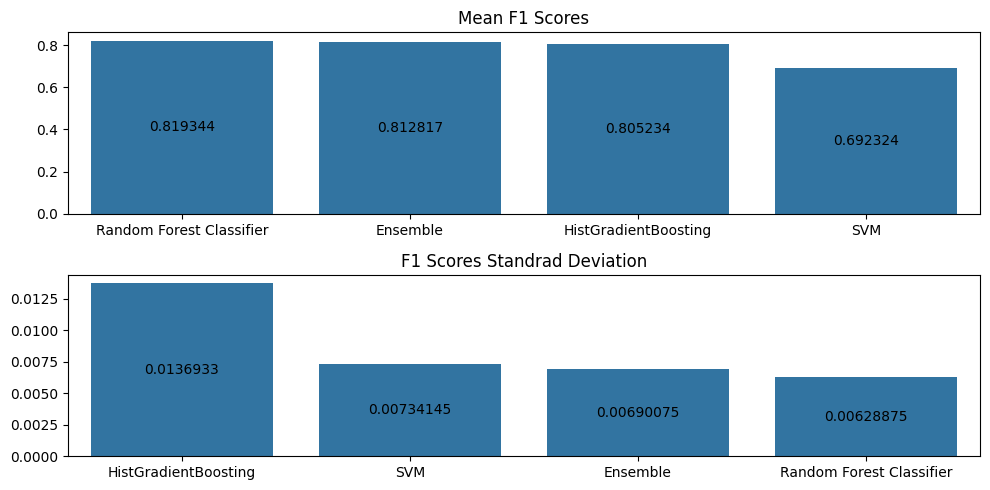

In [128]:
# Evaluate the Cross validation results by viualising the mean and standard deviation of the f1 scores

def cross_val_comparison(df):
  #create objects to allow visuals to be shown together in one output
  figure, (ax1,ax2) = plt.subplots(2,1,figsize=(10,5))

  #create bar chart variables
  bar1 = sns.barplot(df.mean().sort_values(ascending=False),ax=ax1)
  bar2 = sns.barplot(df.std().sort_values(ascending=False),ax=ax2)

  ax1.set_title("Mean F1 Scores")
  ax2.set_title("F1 Scores Standrad Deviation")

  bars = [bar1,bar2]

  # add data labels
  for bar in bars:
    for container in bar.containers:
      bar.bar_label(container,label_type='center')

  plt.tight_layout()

#show results
print("Figure 38")
Cross_Val_df = pd.DataFrame(model_score)
cross_val_comparison(Cross_Val_df)

**Observation**

---

1. The Cross validation F1 scores show that Random Forest Calssifier, Ensemble Model and Hist Gradient Boosting were the best performing models who's scores sat around the ~0.81 mark.
2. Suport Vector Classification performed the worse and therefore will not be considered for the final model of this project.
3. Interestingly, the Hist Gradient Boosting model did experience larger variability in it's F1 scores in comparison to the other two best performing models, suggesting that it it is less consistent with it's predictions than the other two. That being said, it's standard deviation is still a great score in that it proves the model is not experiencing overfitting as the graphs would display higher levels of F1 score variability.
4. Although the Voting Classifier did extremely well, it was very computationally heavy and therefore will not be chosen as the final model.
5. Random Forest Classifier appears to be the model that has performed very well in terms of it's F1 score and it's variability, as it is seen the have the lowest Standard Deviation and best average F1 score. This means that the model has done a great job in it's consistency in generalising the data when introduced to new data, suggesting it will perform similarly when introduced to the validation set (without any hyperparameter tuning).

**Next Steps**

---

The two best performing models will be fine-tuned.

## **7.2 Hyperparameter Tuning**

---



**Objectives:**
1. Fine tune the parameters of the selected best performing models to achieve a greater F1 score.

### 7.2.1 Random Forest Classifier

In [129]:
# Within this section, the focus will be on fine-tuning the Random Forest Classifier
# so that a better F1 score can be achieved.
# The parameters that will be focused on will be - max_depth, max_features, n_estimators

# max_depth - The number of splits that each Decision Tree is allowed to make (Ram, 2020).
# max_features - The number of columns that are shown to each decision tree (Ram, 2020), meaning each individual tree in the ensemble sees different
#                features when in training.
# n_estimators - This represents the number of decision trees in the Random Forest (Ram, 2020).



params = {
    'max_depth': list(range(10,80,20)),
    'max_features': list(np.arange(0.1,1,0.1)),
    'n_estimators' : list(range(50,250,50))
}

rf_random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                    params,
                                    cv=5,
                                    n_jobs=-1,
                                    scoring='f1',
                                    random_state=42)

#train the random_search model
rf_random_search.fit(X_train[:1000],y_train[:1000])# take a smaller sample as the whole training set will take a long time

#get the bets parameters and stor in a varibale to use in cross validation
rf_params = rf_random_search.best_params_

#show the best parameters
print(rf_params)

{'n_estimators': 150, 'max_features': 0.8, 'max_depth': 30}


### 7.2.2 Hist Gradient Boosting

In [130]:
# As this model is similar to Random Forest, it also uses the same parameter - max_depth.
# learning_rate is a hyperparameter that scales the contribution of each tree within the model (Géron[b], 2022). In other words, if the value is
# low, say 0.1 then each tree's contribution will will scaled down by 0.1.
# max_iter - This the number of iterations the model does in the 'boosting' process

HistGradBoost_params = {'learning_rate': list(np.arange(0.1,1,0.1)),
                        'max_iter':  list(range(50,350,50)),
                        'max_depth': list(range(10,105,10))}

HistGradBoost_random_search = RandomizedSearchCV(HistGradientBoostingClassifier(random_state=42),
                                    HistGradBoost_params,
                                    cv=5,
                                    n_jobs=-1,
                                    scoring='f1',
                                    random_state=42)

#train the random search model
HistGradBoost_random_search.fit(X_train[:1000],y_train[:1000])# take a smaller sample as the whole training set will take a long time

#get the bets parameters and stor in a varibale to use in cross validation
HistGradBoost_best_params = HistGradBoost_random_search.best_params_

#show the best parameters
print(HistGradBoost_best_params)

{'max_iter': 100, 'max_depth': 30, 'learning_rate': 0.2}


### 7.2.3 Cross Validation of Tuned Models

Figure 39


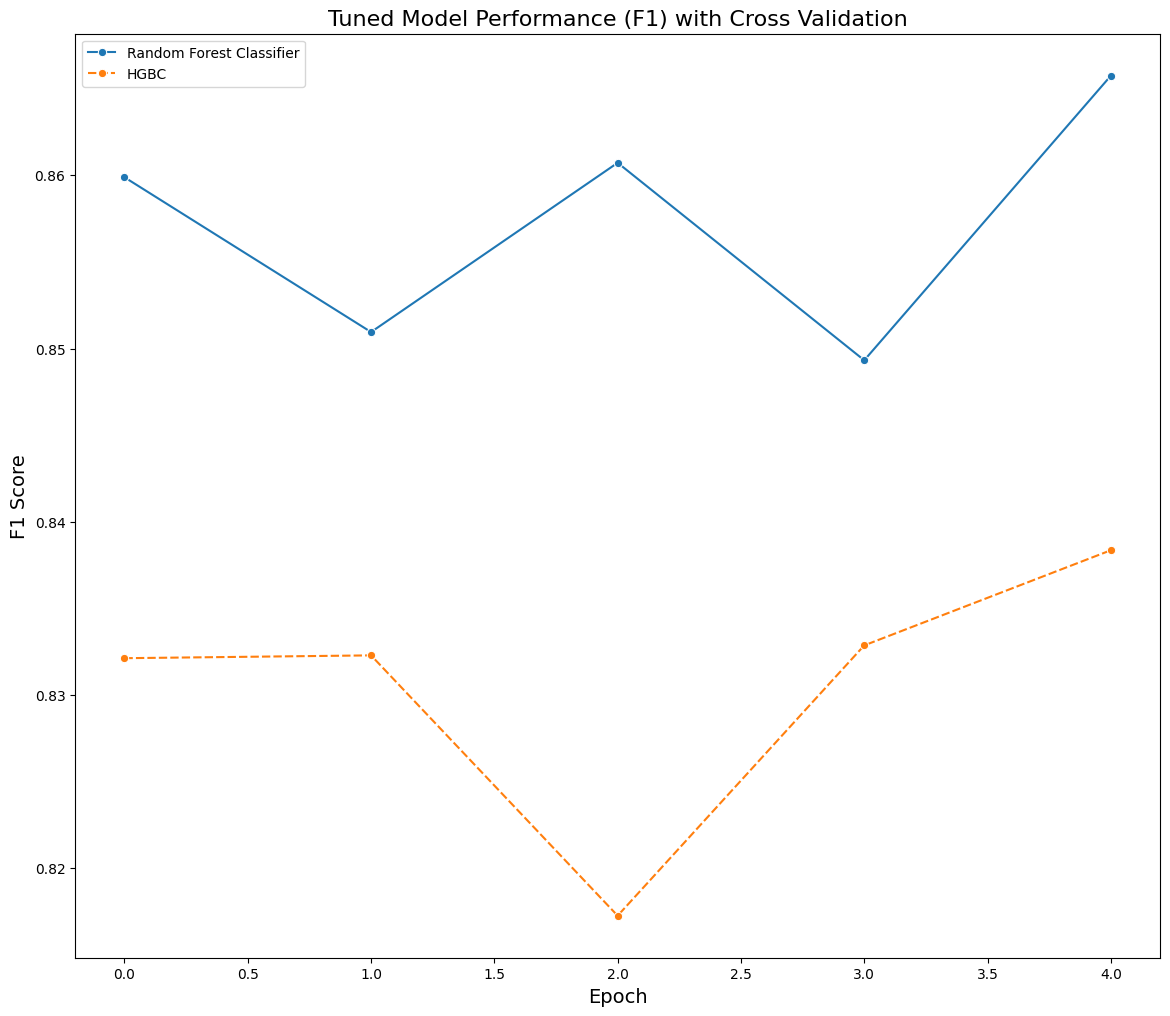

In [131]:
# cross validation the three selected models

# create a dictionary of the models that have updated hyperparameters
models = {
        'Random Forest Classifier' : RandomForestClassifier(random_state=42,
                                                            max_depth = 30,
                                                            n_estimators = 150,
                                                            max_features = 0.8),

        'HGBC' : HistGradientBoostingClassifier(random_state=42,
                                          max_iter=100,
                                          max_depth=30,
                                          learning_rate=0.2)
        }

#combine the validation and train sets to see the impact
# of the hyperparameter tuning has and how well the models
# handle new data
X_train = pd.concat([X_train,X_validate],axis=0)
y_train = pd.concat([y_train,y_validate],axis=0)

# set up the cross validation
kf = KFold(n_splits=5, shuffle = True, random_state=42)

# evaluate the models
model_score={}


# loop through the models to conduct Cross Validation
for model_name, model in models.items():
   scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='f1')
   model_score[model_name] = scores


#Visualise the results
print("Figure 39")
ax = sns.lineplot(pd.DataFrame(model_score),marker='o',linestyle="--");
plt.legend(loc="best");
ax.set_title('Tuned Model Performance (F1) with Cross Validation', fontsize=16);
ax.set_xlabel('Epoch', fontsize=14);
ax.set_ylabel('F1 Score', fontsize=14);

Figure 40


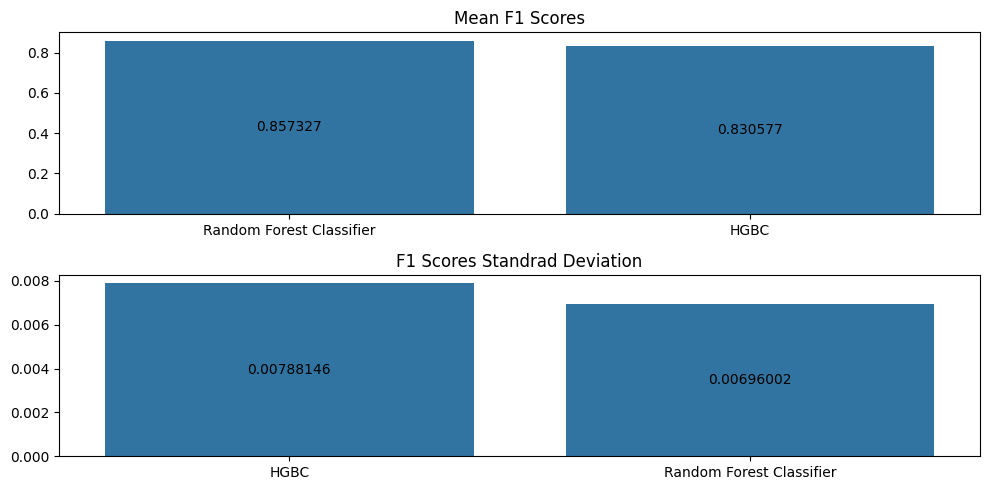

In [132]:
# Review the cross validation statistics
print("Figure 40")
Cross_Val_tuned_df = pd.DataFrame(model_score)
cross_val_comparison(Cross_Val_tuned_df)

**Observations**

---


1. After fine-tuning the models, there is a clear increase in their performances - Random Forest Classifier increased by ~0.05 and ~0.03 for Hist Gradient Boosting.
2. The Random Forest Classifier's variability in it's F1 score has decreased, but only by ~0.006, while Hist Gradient Boosting has seen quite a significant drop of ~ 0.05 suggesting the fine-tuning has done a great job in it's F1 score consistency in the Cross Validation test.
3. It is clear that the best suited model from this test is the Random Forest Classifier due to it overall improvement and it's superior performance in comparison to it's counterpart. Therefore, the final model slected for this project is the Random Forest Classifier.

**Next Steps**

1. Fit the training data to the Random Forest Classifier
2. Make prediction with the X_test set.
3. Analyse it's performance.


## **7.3 Model Prediction & Performance Review**

---



**Objectives:**
1. Fit the selected model to the training set.
2. Simplify the model by reducing the amount of input features.
3. Make predictions with the X_test with the final model.
4. Evaluate the results of the final model.

In [133]:
#train the final model
rf = RandomForestClassifier(random_state=42,
                            max_depth = 30,
                            n_estimators = 150,
                            max_features = 0.8)

rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, max_features=0.8, n_estimators=150,
                       random_state=42)

In [134]:
#create type list using the treee number
categorical_col = range(1,150)



#Create a dropdown to enable user to select a tree from the random forest
# to visualise how each tree differently models the dataset to
# enable it to perform so well.

dd = (widgets.Dropdown(
                options=categorical_col,
                value=categorical_col[0],
                description='Select a tree')

     );



# Create a function that modifies the chart based off the interact() function
def draw_chart(column):

    type_filter =  rf.estimators_[column]

    # create features variable
    features = X_train.columns

    # Visualize the decision tree using Matplotlib's plot_tree method
    plt.figure(figsize=(15, 12));

    plot_tree(type_filter,
              feature_names=features,
              class_names=["Class 0", "Class 1"],
              max_depth=3, # only show top 3 layers as the trees are large in size - depth of 30.
              fontsize=7, # for readibility
              precision=2, # rounding the numbers
              filled=True);

    plt.show();
    plt.tight_layout();



# interact function serves as data filter input into the above function
interact(draw_chart,column=dd);
print("Figure 41")

interactive(children=(Dropdown(description='Select a tree', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13…

Figure 41


<Figure size 1400x1200 with 0 Axes>

In [135]:
# to further measure the accuracy of the model,
# F1, Recall and precision will be used
# Precision - This is the number of True positives (correctly predicted worn tool) divided by the
#             number of true positives and false positives (K, 2021).
# Recall - This is the number of True positives (correctly predicted worn tool) divided by the
#          number of true positives and false negatives (K, 2021).

pred_results = rf.predict(X_test)

#get results
print(classification_report(pred_results,y_test))

              precision    recall  f1-score   support

         0.0       0.87      0.84      0.85      2445
         1.0       0.85      0.89      0.87      2612

    accuracy                           0.86      5057
   macro avg       0.86      0.86      0.86      5057
weighted avg       0.86      0.86      0.86      5057



Figure 42
Score obtained: 0.87


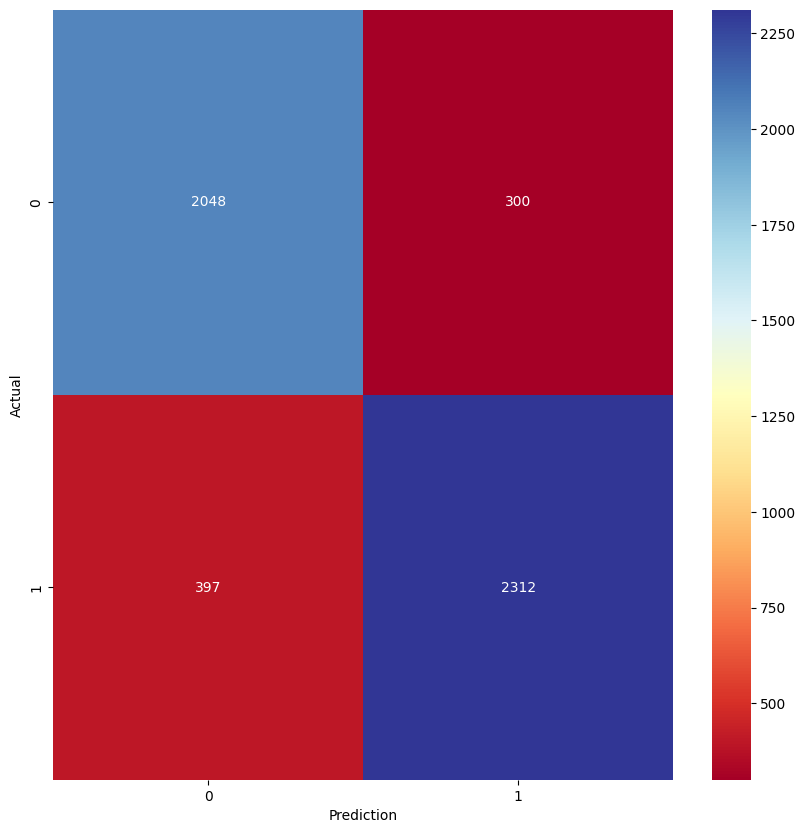

In [136]:
#create confusion matrix
dt_confusion = confusion_matrix(y_test,pred_results)

# get f1 score
f1 = round(f1_score(y_test, pred_results),2)
print("Figure 42")
print(f"Score obtained: {f1}")

#visualise the matrix
plt.figure(figsize=(10,10));
sns.heatmap(pd.DataFrame(dt_confusion),annot=True,fmt="d", cmap="RdYlBu");
plt.xlabel('Prediction');
plt.ylabel('Actual');

**Observation**

---


1. The model's F1 score performance increase slightly from it's Cross Validation results, suggesting the models performance is getting better when being introduced to new data.
2. The Confusion Matrix and the Classification Report shows that the model actually performed worse at predicting an unworn tool in comparison to worn tool. This is likely caused by the small imbalance in the dataset due to more experiments conducted using a worn tool.
3. The feature importances graph shows the key features that influence the model's prediction are the tool's position, Sum_Current and Sum_voltage. This result supports the argument made in the EDA phase of the project in that these features are influential in determining the condition of the tool.

However, there are quite a few features inputted into the model which could be impacting it's performance due to model complexity. Therefore, the features will be reviewed and new models tested with less features.

**Next Steps**

---

Assess the features within the baseline model and test whether removing certain features helps bolster performance.

### 7.3.1 Feature Selection

**Objectives:**
1. Select the features that add the most value to the model and remove those that do not.

In [147]:
#Visualise the feature impartances within the model
print("Figure 43")
# get features and their importances
importances = rf.feature_importances_
features = X_train.columns

# create Dataframe
importances_df = pd.DataFrame()

#input the data into Dataframe
importances_df['Features'] = features
importances_df['Importances'] = importances

# sort the dataframe
importances_df.sort_values(by='Importances',ascending=False,inplace=True)

# visualise the data
px.bar(importances_df,
       x= 'Features',
       y='Importances',
       title="Random Forest Feature Importances",
       text_auto='.2%')

Figure 43


In [138]:
# First remove the bottom 5 features as their value is significantly low.

# create two new training sets
X_train_8_features = X_train[['Pos_PCA',
                              'Sum_Current',
                              'Sum_Voltage',
                              'Sum_OutputPower',
                              'X1_ActualVelocity',
                              'Y1_ActualVelocity',
                              'X1_ActualAcceleration',
                              'Y1_ActualAcceleration']]
X_test_8_features = X_test[['Pos_PCA',
                              'Sum_Current',
                              'Sum_Voltage',
                              'Sum_OutputPower',
                              'X1_ActualVelocity',
                              'Y1_ActualVelocity',
                              'X1_ActualAcceleration',
                              'Y1_ActualAcceleration']]

X_train_7_features = X_train[['Pos_PCA',
                              'Sum_Current',
                              'Sum_Voltage',
                              'Sum_OutputPower',
                              'X1_ActualVelocity',
                              'Y1_ActualVelocity',
                              'X1_ActualAcceleration']]

X_test_7_features = X_test[['Pos_PCA',
                              'Sum_Current',
                              'Sum_Voltage',
                              'Sum_OutputPower',
                              'X1_ActualVelocity',
                              'Y1_ActualVelocity',
                              'X1_ActualAcceleration']]

# create models that represent the reduced features sizes

rf_8_features= RandomForestClassifier(random_state=42,
                                      max_depth = 30,
                                      n_estimators = 150,
                                      max_features = 0.8)

rf_7_features = RandomForestClassifier(random_state=42,
                                       max_depth = 30,
                                       n_estimators = 150,
                                       max_features = 0.8)



# train the new initialised models
rf_8_features.fit(X_train_8_features,y_train)


RandomForestClassifier(max_depth=30, max_features=0.8, n_estimators=150,
                       random_state=42)

In [139]:
# train the new initialised models
rf_7_features.fit(X_train_7_features,y_train)

RandomForestClassifier(max_depth=30, max_features=0.8, n_estimators=150,
                       random_state=42)

In [140]:
# make predictions
Eight_feature_results = rf_8_features.predict(X_test_8_features)
Seven_feature_results = rf_7_features.predict(X_test_7_features)

In [141]:
# print the results and compare models

# get f1 scores for each model and compare results
original_f1 = round(f1_score(y_test, pred_results),4)
eight_feature_f1 = round(f1_score(y_test, Eight_feature_results),4)
seven_feature_f1 = round(f1_score(y_test, Seven_feature_results),4)

# print the results
print(f"Score obtained for all features in the model: {original_f1}")
print(f"Score obtained for 8 features in the model: {eight_feature_f1}")
print(f"Score obtained for 7 features in the model: {seven_feature_f1}")

Score obtained for all features in the model: 0.869
Score obtained for 8 features in the model: 0.8741
Score obtained for 7 features in the model: 0.8722


In [142]:
#comnpare the classification reports of all and eight feature models
print("All Features:")
print(classification_report(pred_results,y_test))
print("Eight Features:")
print(classification_report(Eight_feature_results,y_test))

All Features:
              precision    recall  f1-score   support

         0.0       0.87      0.84      0.85      2445
         1.0       0.85      0.89      0.87      2612

    accuracy                           0.86      5057
   macro avg       0.86      0.86      0.86      5057
weighted avg       0.86      0.86      0.86      5057

Eight Features:
              precision    recall  f1-score   support

         0.0       0.87      0.84      0.86      2430
         1.0       0.86      0.89      0.87      2627

    accuracy                           0.87      5057
   macro avg       0.87      0.87      0.87      5057
weighted avg       0.87      0.87      0.87      5057



Figure 44


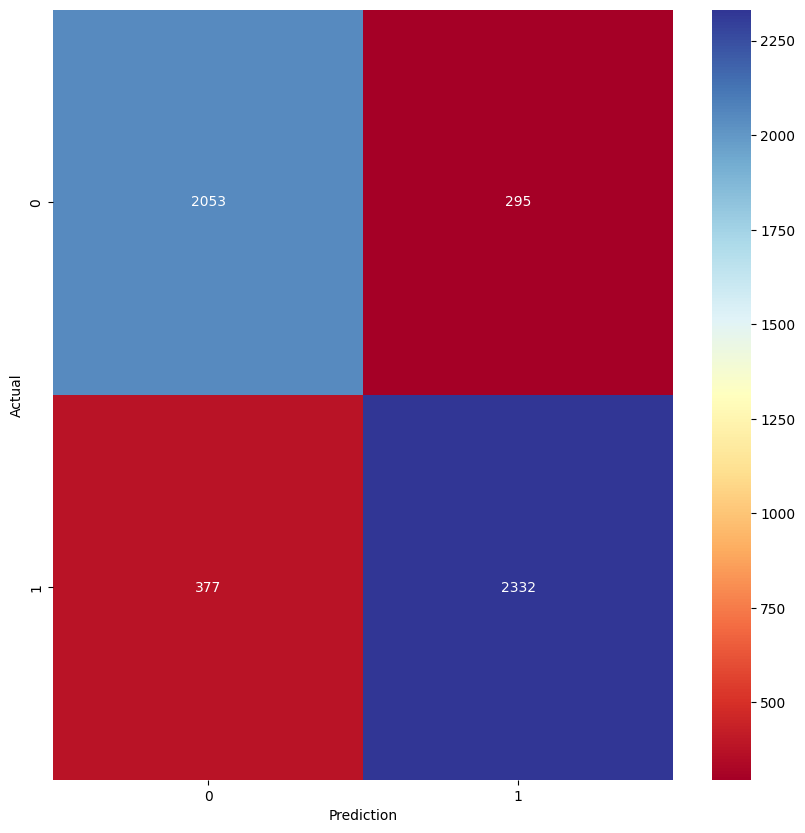

In [143]:
#create confusion matrix
eight_feature_confusion = confusion_matrix(y_test,Eight_feature_results)
print("Figure 44")
#visualise the matrix
plt.figure(figsize=(10,10));
sns.heatmap(pd.DataFrame(eight_feature_confusion),annot=True,fmt="d", cmap="RdYlBu");
plt.xlabel('Prediction');
plt.ylabel('Actual');

**Observation**

---

1. There is a minor improvement in the model's F1 performance when removing the bottom 4 value added features, which is a great result as it shows that these features add complexity impacting the models performance. In fact, it also showed better Recall and Precision than the baseline model, showing a slight improvement.
2. The confusion matrix shows a marginal immprovement as the model's true positive and true negative have increased by removing these features. This suggests that the addec complexity of these extra features was harming the performance of the model.
2. Once 5 features were removed, the model performed slightly better than the original model, but worse than the 8-feature version. Therefore, the bottom four features will remain removed from the final model.

**Next Steps**

Create a function that allows the user to make a prediction with new data.

### **7.3.2 The Final Model**

In [235]:
def tool_change_recomendation(new_data):

  # Define the features to input into the model
  columns= list(X_train_8_features.columns)

  # create new Dataframe that will be used to input into the trained model
  new_data_df = pd.DataFrame([new_data],columns=columns)

  #transform the data the same way as the other datasets.
  transformers = {
    'Pos_PCA': Pos_PCA_t,
    'Sum_Current': Sum_Current_t,
    'Sum_Voltage': Sum_Voltage_t,
    'Sum_OutputPower': Sum_OutputPower_t,
    'X1_ActualVelocity': X1_ActualVelocity_t,
    'Y1_ActualVelocity': Y1_ActualVelocity_t,
    'X1_ActualAcceleration': X1_ActualAcceleration_t,
    'Y1_ActualAcceleration': Y1_ActualAcceleration_t ,
    }

  # loop through the items and transformers and apply same transformation that
  # was applied to X_train
  for col, i in transformers.items():
    new_data_df[col] = i.transform(new_data_df[col].values.reshape(-1,1))

  #make a prediction
  prediction = rf_8_features.predict(new_data_df)
  prediction_proba = rf_8_features.predict_proba(new_data_df)[:,1]

  # return the prediction.
  if prediction == 1:
    prediction = f"The tool is worn and requires changing. Probability of being worn {round(prediction_proba[0]*100,2)}%"
  else:
    prediction = f"The tool is safe to use and does not require changing. Probability of not being worn {round(prediction_proba[0]*100,2)}%"

  return prediction

In [296]:
# use the descriptive statistics as a reference for prediction
train_df[['Sum_Current',
          'Sum_Voltage',
          'Sum_OutputPower',
          'Pos_PCA',
          'X1_ActualVelocity',
          'Y1_ActualVelocity',
          'X1_ActualAcceleration',
          'Y1_ActualAcceleration']].describe()

Sum_Current  Sum_Voltage  Sum_OutputPower       Pos_PCA  \
count  15171.000000      15171.0     15171.000000  1.517100e+04   
mean     975.569639   100.435018         0.128221  2.062265e-14   
std        6.793154    57.893819         0.080110  1.214996e+03   
min      959.000000          0.0        -0.002958 -2.037675e+03   
25%      971.000000       10.585         0.000299 -1.048275e+03   
50%      975.000000   131.320007         0.165353 -5.706226e+00   
75%      979.000000   135.839996         0.183718  9.848195e+02   
max      991.000000        227.0         0.458301  2.262346e+03   

       X1_ActualVelocity  Y1_ActualVelocity  X1_ActualAcceleration  \
count            15171.0            15171.0                15171.0   
mean           -0.249815          -0.392723               0.172715   
std             5.703456           5.988125              94.634293   
min           -20.299999         -32.799999                -1210.0   
25%                -1.92             -0.075             -31.299999   
50%                  0.0                0.0                    0.0   
75%                0.225                0.1              31.299999   
max            50.700001          50.400002                 1440.0   

       Y1_ActualAcceleration  
count                15171.0  
mean                1.200906  
std                87.083771  
min                  -1260.0  
25%               -18.799999  
50%                      0.0  
75%                18.799999  
max                   1460.0

In [193]:
# identify when the spindle in on the product by filtering the
# data to this location and transform the data the same way as before using pca.tranform()

# filter the data to product
prod_locate = (cnc_df['Z1_ActualPosition']>=27.5) & (cnc_df['Z1_ActualPosition']<=29.7)
prod_df = cnc_df[['X1_ActualPosition','Y1_ActualPosition','Z1_ActualPosition','S1_ActualPosition']].loc[prod_locate]

# create a blank datafram
on_df = pd.DataFrame()

#transform the data.
data = pca.transform(prod_df)

# drop into the empty dataframe
on_df['Pos_PCA'] = data.flatten()

In [195]:
# identify when the spindle is away from the product by filtering the
# data to this location and transform the data the same way as before using pca.tranform()

# filter the data to product
prod_locate = (cnc_df['Z1_ActualPosition']>29.7)
prod_df = cnc_df[['X1_ActualPosition','Y1_ActualPosition','Z1_ActualPosition','S1_ActualPosition']].loc[prod_locate]

# create a blank datafram
away_df = pd.DataFrame()

#transform the data.
away_data = pca.transform(prod_df)

# drop into the empty dataframe
away_df['Pos_PCA'] = away_data.flatten()

In [199]:
# get the range to set the position of spindle using .describe()
print("On the product")
print(on_df['Pos_PCA'].describe())
print("-------------------------")
print("-------------------------")
print("Away form product")
print(away_df['Pos_PCA'].describe())

On the product
count    17364.000000
mean       111.577962
std       1220.502288
min      -2037.674626
25%       -937.680372
50%        118.258059
75%       1152.279442
max       2262.343722
Name: Pos_PCA, dtype: float64
-------------------------
-------------------------
Away form product
count    7922.000000
mean     -254.620823
std      1156.492627
min     -2037.595040
25%     -1048.275486
50%      -320.642758
75%       478.021437
max      2262.345589
Name: Pos_PCA, dtype: float64


In [299]:
# set the data so that the energy output is high, the x-axis velocity and acceleration is low, while
# y-axis is inactive. These parameters will show the tool is worn.
# The EDA phase showed that when the spindle was worn and was on the product, the energy output was higher
# and the performance of the spindle decreased.
data = [2261, 999, 250.0,  0.47, 15, 0, 8, 0]

tool_change_recomendation(data)

'The tool is worn and requires changing. Probability of being worn 66.67%'

In [305]:
# set the parameters where energy has decreased, difference performance but the position is the same.
data = [2261, 950, 40.0,  0.38, 17.5, 0, 31, 0]

tool_change_recomendation(data)

'The tool is safe to use and does not require changing. Probability of not being worn 48.0%'

In [326]:
# Keep all parameters the same but change the position
data = [1000, 950, 40.0,  0.38, 17.5, 0, 31, 0]

tool_change_recomendation(data)

'The tool is safe to use and does not require changing. Probability of not being worn 50.0%'

#  **8. Conclusion**

---
Through Hyperparameter Tuning and reducing the features, the final model created has reached a good standard (F1 score of 0.87 - See Figure 44 for further analysis), which could be put into production.

What was interesting to see was that the position of the tool had the most influence on the model's output, showing that our analysis within the EDA section was accurate. Furthermore, for the non-technical user, this information provides great value as that individual will be informed to take the data from the machine when it is on the product. This is because the EDA showed that the performance and energy of the machine were influenced by this feature and its tool condition.

The limitation of this model is that it has been trained on a material that is not used within Liniar, or any other business for that matter. This means that there is a risk that the model will not perform well under the conditions for when the CNC machine is cutting a type of metal, as it has not been trained on this information.

That being said, the signals from cutting metal given from each feature would be more extreme than the wax material. This is because metal is a harder material than wax, meaning that when the tool is worn its acceleration, velocity would drop significantly more while energy levels would increase. Therefore, the trained model should, in theory, be able to use the new data to predict the condition of the tool using what it has already trained on as the patterns should be identical.



# **9. References**

---


Abdelaoui, F. Z. E., Jabri, A. & Barkany, A. E. (2023) 'Optimization techniques for energy efficiency in machining processes—a review'. The International Journal of Advanced Manufacturing Technology, Volume 125, p. 2967–3001.

Bansal, M., Goyal, A. & Choudhary, A. (2022) 'A comparative analysis of K-Nearest Neighbor, Genetic, Support Vector Machine, Decision Tree, and Long Short Term Memory algorithms in machine learning.' Decision Analytics Journal, Volume 03, pp. 1-21.

Datatab (2024) Multicollinearity. [Online]
Available at: https://datatab.net/tutorial/multicollinearity
[Accessed 22 12 2024].

Emmanuel, T. et al., (2021) 'A survey on missing data in machine learning.' Journal of Big Data, Volume 140, pp. 1-37.

GeeksForGeeks (2024) 'Voting in Machine Learning.' [Online]
Available at: https://www.geeksforgeeks.org/voting-in-machine-learning/
[Accessed 26 12 2024].

Géron[a], A. (2023) 'Chapter 7 Ensemble Learning and Random Forests.' In: N. Butterfield, ed. Hands-On Machine Learning with Scikit-Lean, Keras, & TensorFlow. Sebastopol: O'Reilly, p. 211.

Géron[b], A. (2023) 'Gradient Boosting.' In: N. Butterfiel, ed. Hands-On Machine Learning with Scikit-Lean, Keras, & TensorFlow. Sebastopol: O'Reilly, pp. 226-230.

Géron[c], A. (2023) 'Histogram-Based Gradient Boosting.' In: N. Butterfield, ed. Hands-On Machine Learning with Scikit-Lean, Keras, & TensorFlow. Sebastopol: O'Reilly, pp. 230-231.

Géron[d], A. (2023) 'Random Forests.' In: N. Butterfield, ed. Hands-On Machine Learning with Scikit-Learn, Keras, & TensorFlow. Sebastopol: O'Reilly, pp. 220-222.

Géron[e], A. (2023) 'PCA.' In: N. Butterfield, ed. Hands-On Machine Learning With Scikit-Learn, Keras & TensorFlow. Sebastopol: O'Reilly, pp. 243-254.

Géron, A. (2023) 'Overfitting the Training Data.' In: Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow. Sebastopol: O'Reiler Media Inc, pp. 30-31.

Gugten, R. v. d. (2019) 'Advanced Pandas: Optimize speed and memory.' [Online]
Available at: https://medium.com/bigdatarepublic/advanced-pandas-optimize-speed-and-memory-a654b53be6c2
[Accessed 21 12 2024].

IBM[a], (2024) 'What is overfitting?.' [Online]
Available at: https://www.ibm.com/topics/overfitting
[Accessed 12 12 2024].

IBM[b], (2024) 'What is random forest?.' [Online]
Available at: https://www.ibm.com/think/topics/random-forest
[Accessed 26 12 2024].

Jamshidi, M., Chatelain, J.-F., Rimpault, X. & Balazinski, M. (2022) 'Tool Condition Monitoring Using Machine Tool Spindle Electric Current and Multiscale Analysis while Milling Steel Alloy.' Journal of Manufacturing and Materials Processing, 06(05), pp. 1-12.

Kaggle, (2017) 'CNC Mill Tool Wear.' [Online]
Available at: https://www.kaggle.com/datasets/shasun/tool-wear-detection-in-cnc-mill
[Accessed 06 12 2024].

K, J. (2021) The F1 score. [Online]
Available at: https://towardsdatascience.com/the-f1-score-bec2bbc38aa6
[Accessed 27 12 2024].
Kumar, A., 2019. Importing Datasets in Google Colab. [Online]
Available at: https://medium.com/@hanSolow/importing-datasets-in-google-colab-c816fc654f97
[Accessed 21 12 2024].

Kumar, P., Bhatnagar, R., Gaur, K. & Bhatnagar, A. (2023) 'Classification of Imbalanced Data:Review of Methods and Applications.' Jaipur, IOP Conf. Series: Materials Science and Engineering.

Lieberman, M. G. & Morris, J. D. (2014) 'The Precise Effect of Multicollinearity on Classification Prediction.' Multiple Linear Regression Viewpoints, 40(01), pp. 5-10.

Lin, K. Y. (2024) 'Lessons From My ML Journey: Data Splitting and Data Leakage.' [Online]
Available at: https://towardsdatascience.com/two-rookie-mistakes-i-made-in-machine-learning-improper-data-splitting-and-data-leakage-3e33a99560ea
[Accessed 27 12 2024].

Ram, S. (2020) 'Mastering Random Forests: A comprehensive guide.' [Online]
Available at: https://towardsdatascience.com/mastering-random-forests-a-comprehensive-guide-51307c129cb1#:~:text=n_estimators%3A%20The%20number%20of%20decision,3%2C%205%2C%20or%207.
[Accessed 26 12 2024].

Rasheed, K. et al. (2022) 'Explainable, trustworthy, and ethical machine learning for healthcare: A review.' Computers in Biology and Medicine, Volume 149, pp. 1-23.

Rome, P. (2024) 'Volts, Currents, and the Basic Concepts of Electricity.' [Online]
Available at: https://dewesoft.com/blog/volts-and-currents-explained
[Accessed 22 12 2024].

Satheesh, V. (2020) 'Hyper Parameter Tuning (GridSearchCV Vs RandomizedSearchCV).' [Online]
Available at: https://medium.com/analytics-vidhya/hyper-parameter-tuning-gridsearchcv-vs-randomizedsearchcv-499862e3ca5
[Accessed 26 12 2024].

Scikit-Learn. (2024) '3.1. Cross-validation: evaluating estimator performance.' [Online]
Available at: https://scikit-learn.org/stable/modules/cross_validation.html
[Accessed 26 12 2024].

Soori, M. & Arezoo, B. (2022) 'Cutting tool wear prediction in machining operations, a review.' Journal of New Technology and Materials (JNTM) , 12(02), pp. 15-26.

Sundus, K. I., Hammo, B. H., Al-Zoubi, M. B. & Al-Omari, A. (2022) 'Solving the multicollinearity problem to improve the stability of machine learning algorithms applied to a fully annotated breast cancer dataset.' Informatics in Medicine Unlocked, Volume 33, pp. 1-18.

Univeristy, G. (2024) 'What is CNC Machining in Manufacturing?.' [Online]
Available at: https://www.goodwin.edu/enews/what-is-cnc/
[Accessed 07 12 2024].

Waples, J. (2024) 'What is Bootstrapping in Statistics? A Deep Dive.' [Online]
Available at: https://www.datacamp.com/tutorial/bootstrapping
[Accessed 27 12 2024].

Zhang, X., Chen, G., Zhang, L. & Hu, Y. (2023) 'Modeling of CNC machine tools’ spatial geometric error based on two-dimensional angle error.' SN Applied Sciences, 05(20), pp. 1-10.

